In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


### **LOAD DATASET :**

In [12]:
df = pd.read_csv('statalytical_showdown.csv')
df.sample(5,random_state=0) # Instead of head, using sample for random 5 images (better than head)

Administrative  Administrative_Duration  Informational  \
12245               0                 0.000000              0   
9704               16               180.666667              1   
9177                9               186.673077              0   
8848                0                 0.000000              0   
2768                0                 0.000000              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
12245                    0.00              74              3109.404167   
9704                   649.25             113              8041.588870   
9177                     0.00              73              1606.308250   
8848                     0.00               2                 0.000000   
2768                     0.00               1                 0.000000   

       BounceRates  ExitRates  PageValues  SpecialDay Month OperatingSystems  \
12245     0.009459   0.042859         0.0         0.0   Nov            macOS   
9704      0.007937   0.026808         0.0         0.0   Dec            macOS   
9177      0.010295   0.019109         0.0         0.0   Nov            Linux   
8848      0.200000   0.200000         0.0         0.0   Nov            Linux   
2768      0.200000   0.200000         0.0         1.0   May          Android   

       Browser     Region             TrafficType        VisitorType  Weekend  \
12245  Firefox      Delhi  Organic Search Traffic  Returning_Visitor    False   
9704     Brave  Ahmedabad          Direct Traffic  Returning_Visitor    False   
9177   Firefox      Surat  Organic Search Traffic  Returning_Visitor     True   
8848   Firefox    Chennai       Community Traffic  Returning_Visitor    False   
2768    Chrome     Mumbai     Paid Search Traffic  Returning_Visitor     True   

       Revenue  
12245    False  
9704     False  
9177     False  
8848     False  
2768     False

---

## **EXAMINING THE DATA**

### **(01) DATAFRAME INFORMATION :**

In [16]:
#1. DataFrame Information : 
df.info()

# Fact 01 : Not a large dataset, 12330 observations and 12 features.
# Fact 02 : There are no missing values in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

### **(02) MATHEMATICAL INTERPRETATION OF DATA :**

In [15]:
#2. Mathematical Interpretation of Data :

# Central Tendency of Data : Mean, Median, Mode ---
# Dispersion : Range, Variance, Standard Deviation ---

df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  
count  12330.000000  12330.000000  12330.000000  12330.000000  
mean       0.022191      0.043073      5.889258      0.061427  
std        0.048488      0.048597     18.568437      0.198917  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.014286      0.000000      0.000000  
50%        0.003112      0.025156      0.000000      0.000000  
75%        0.016813      0.050000      0.000000      0.000000  
max        0.200000      0.200000    361.763742      1.000000

### **(03) DUPLICATE DATAPOINTS OR VALUES :**

In [ ]:
#3. Duplicate Datapoints or Values :
duplicated_data = df.duplicated().sum()
print("Duplicated Data inside my Dataset : ",duplicated_data)

new_dataset = df.drop_duplicates(keep='first')
print("New Dataset without Duplicates : ",new_dataset.shape)

# Now, the data is without any missing values and without any duplicates.

Duplicated Data inside my Dataset :  125
New Dataset without Duplicates :  (12205, 18)


### **(04) DATA CORRELATION WITH COLUMNS :**

In [ ]:
#4. Data Correlation :

numerical_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration','ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'] # These are only numerical features.

correlation_matrix = df[numerical_features].corr()
print("Correlation Matrix : \n",correlation_matrix)

# Positive values indicate a positive correlation between the variables
# Negative values indicate a negative correlation between the variables

Correlation Matrix : 
                          Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601583   
Administrative_Duration        0.601583                 1.000000   
Informational                  0.376850                 0.302710   
Informational_Duration         0.255848                 0.238031   
ProductRelated                 0.431119                 0.289087   
ProductRelated_Duration        0.373939                 0.355422   
BounceRates                   -0.223563                -0.144170   
ExitRates                     -0.316483                -0.205798   
PageValues                     0.098990                 0.067608   
SpecialDay                    -0.094778                -0.073304   

                         Informational  Informational_Duration  \
Administrative                0.376850                0.255848   
Administrative_Duration       0.302710                0.238031   
Informational                 

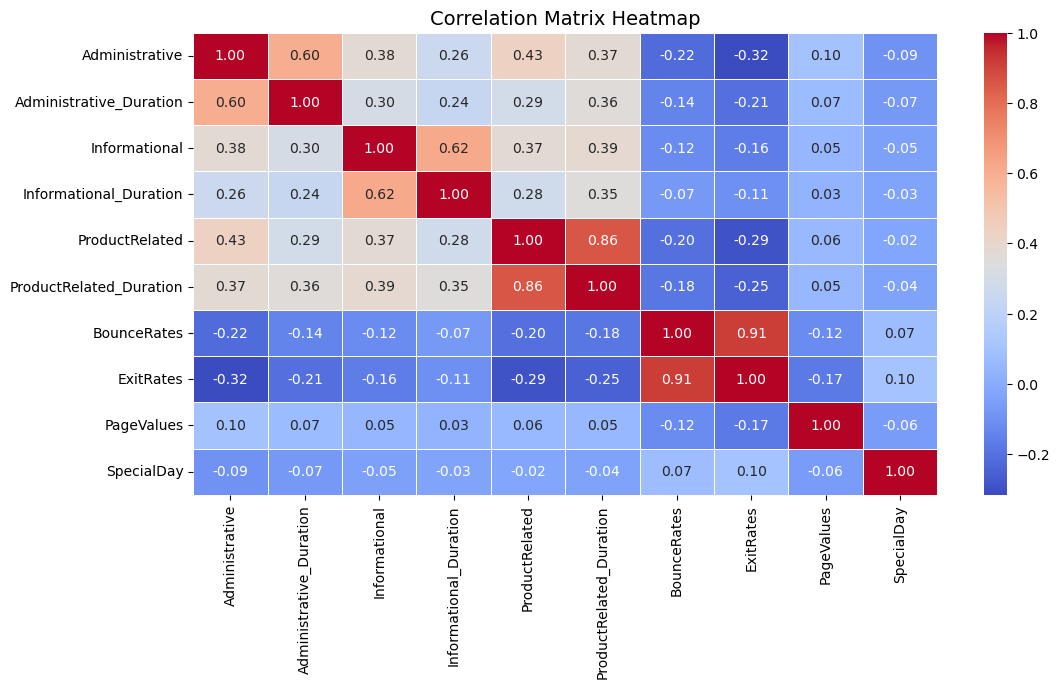

In [29]:
import seaborn as sns
# Plot Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Matrix Heatmap", fontsize=14)
plt.show()

e:\Anaconda\envs\Danger02-ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\envs\Danger02-ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\envs\Danger02-ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\envs\Danger02-ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

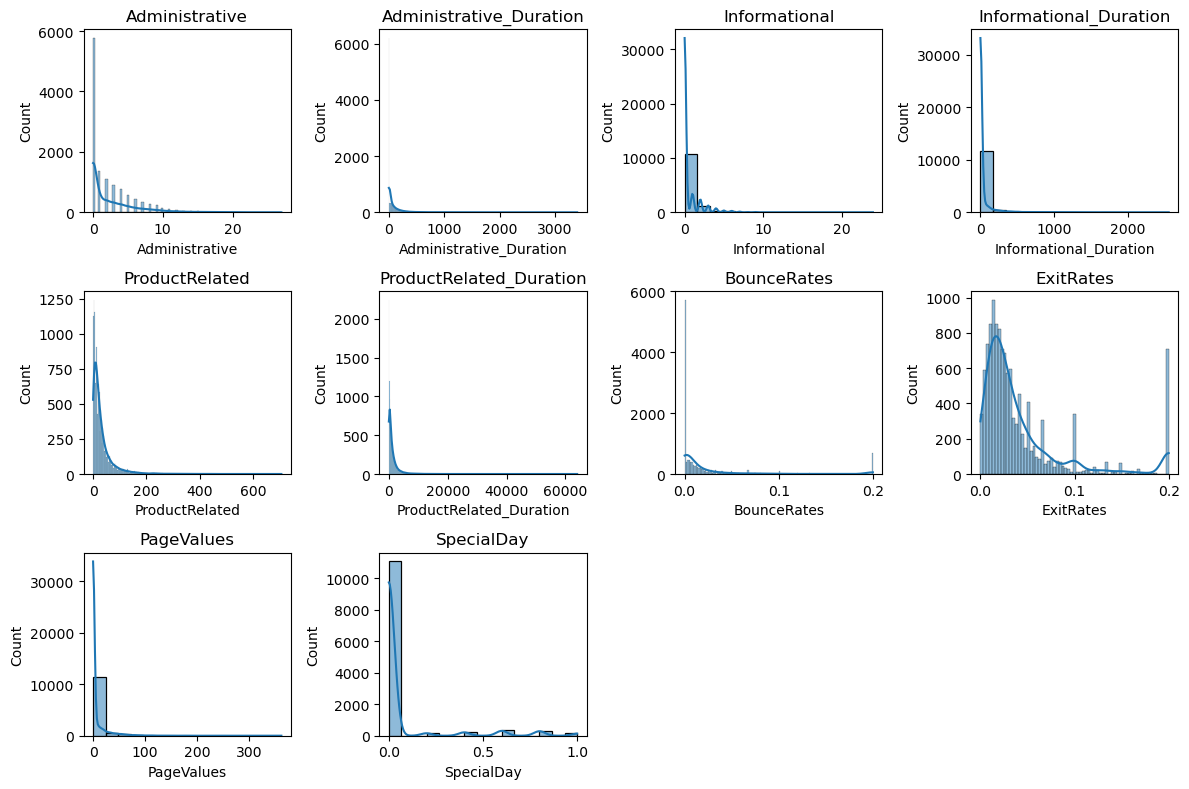

In [26]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

e:\Anaconda\envs\Danger02-ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\envs\Danger02-ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\envs\Danger02-ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\Anaconda\envs\Danger02-ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

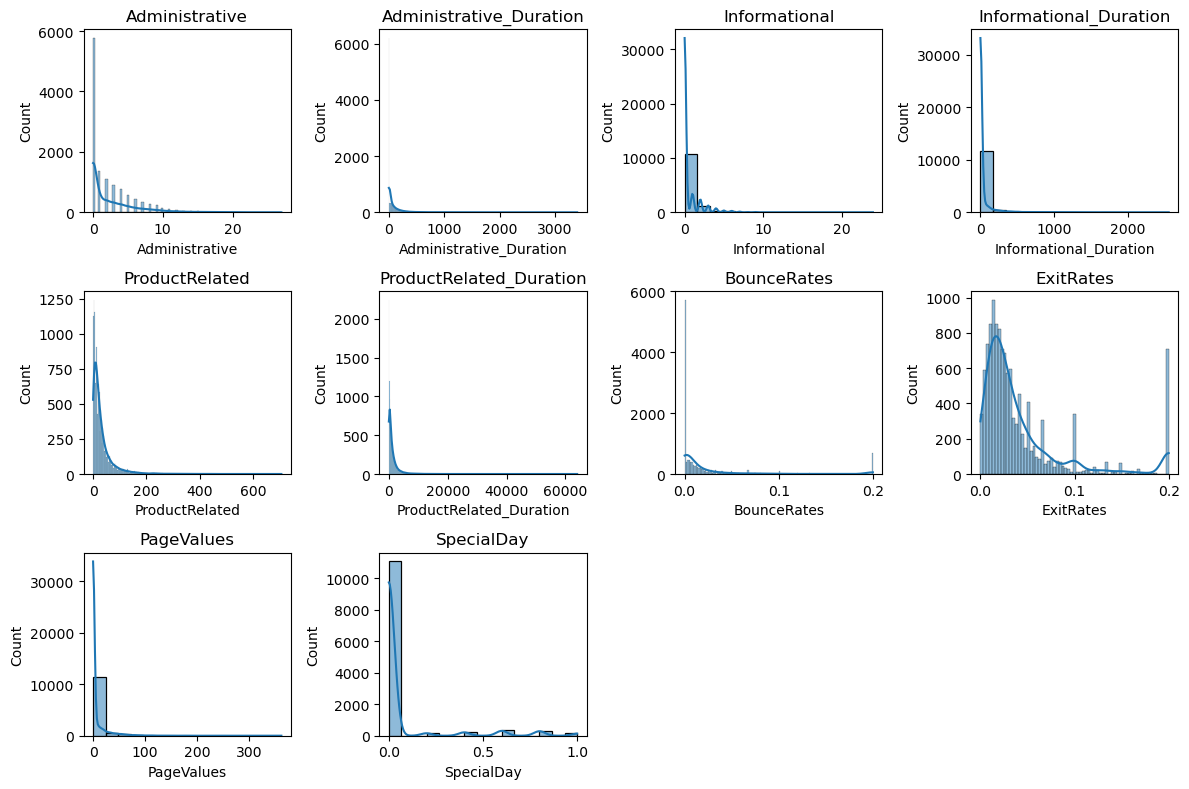

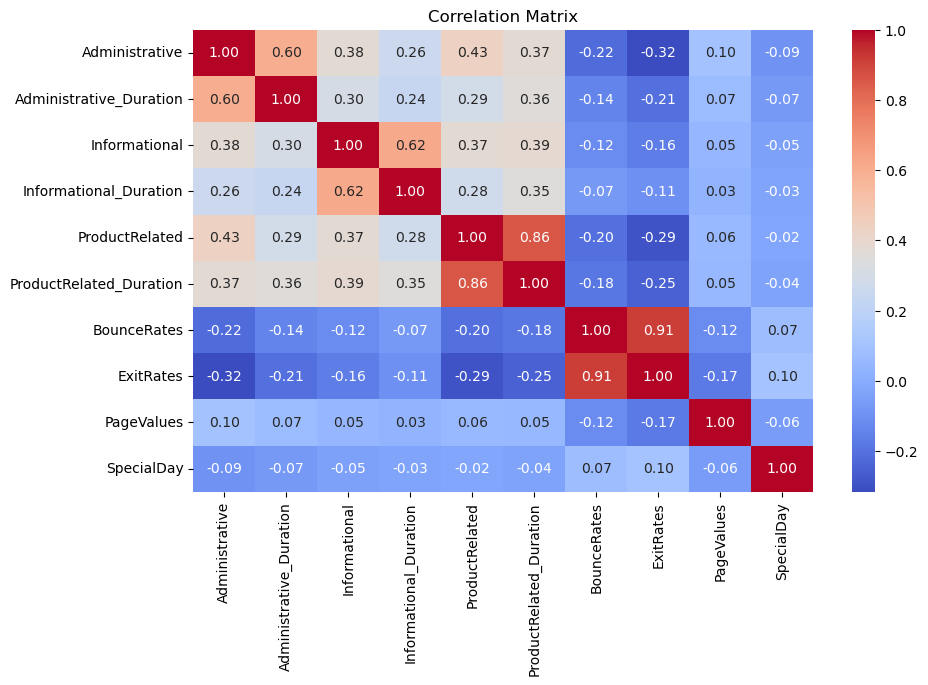

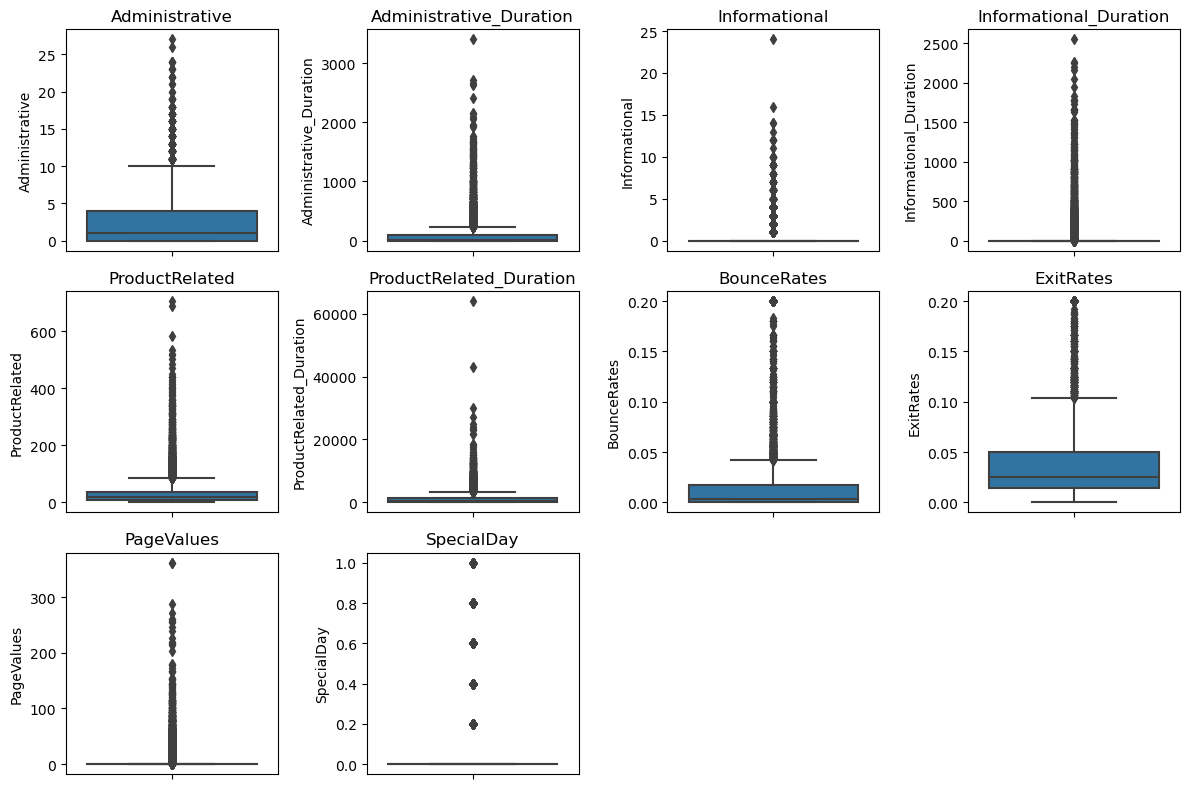

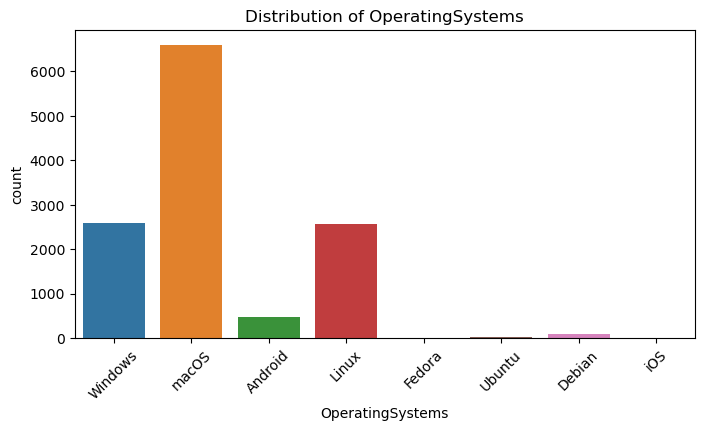

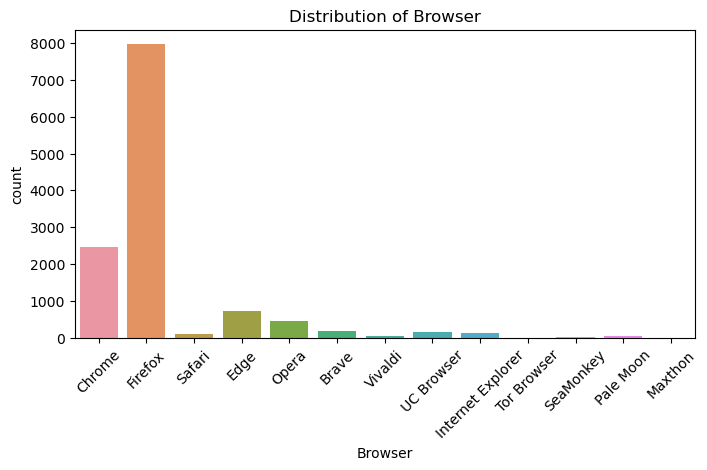

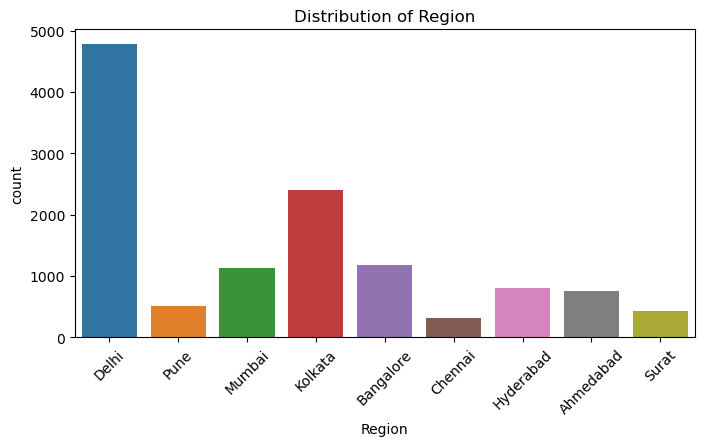

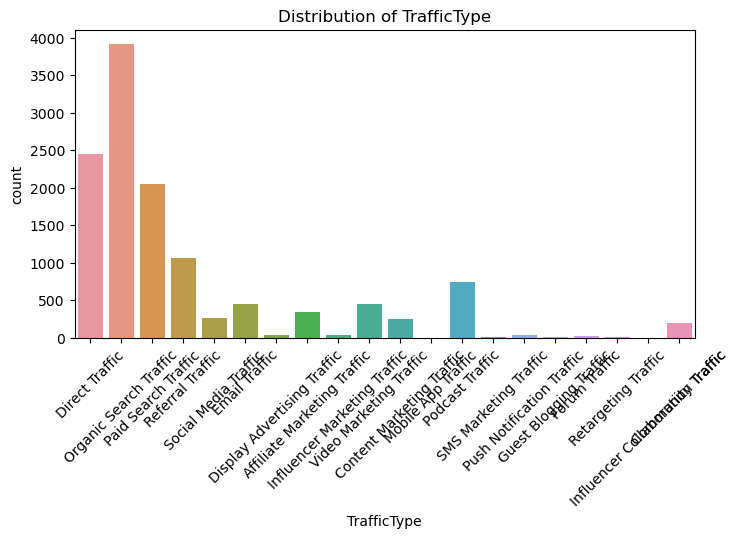

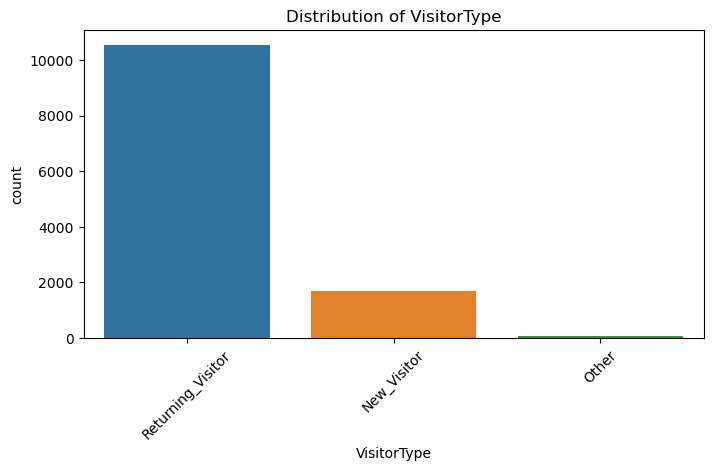

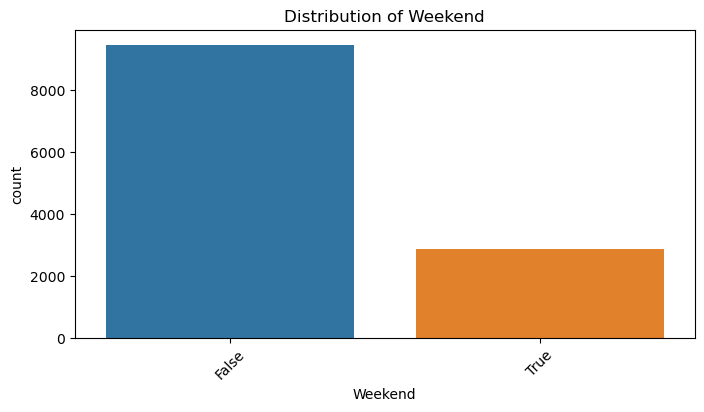

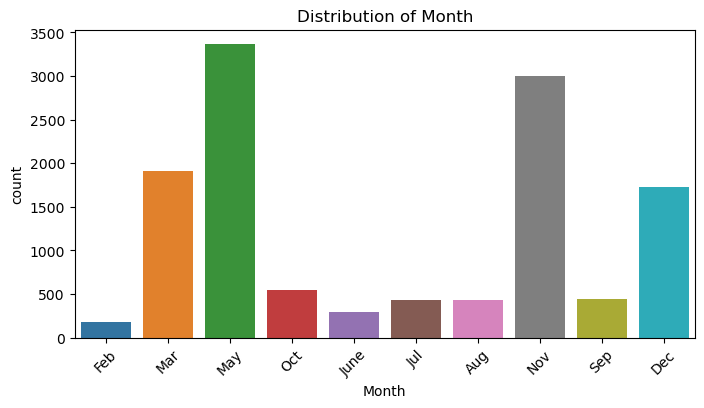

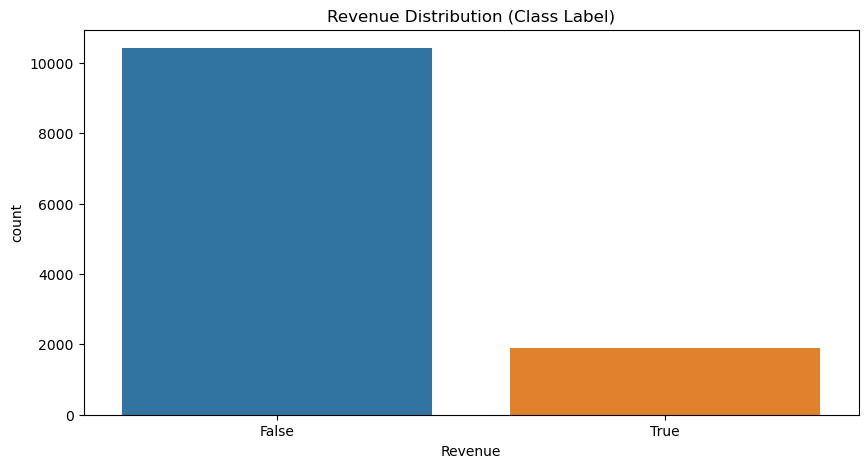

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Outlier Detection using Boxplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Checking impact on Revenue
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Revenue'])
plt.title("Revenue Distribution (Class Label)")
plt.show()

# Save cleaned dataset
df.to_csv('cleaned_statalytical_showdown.csv', index=False)

### **(05) CATEGORICAL DATA ANALAYSIS :**

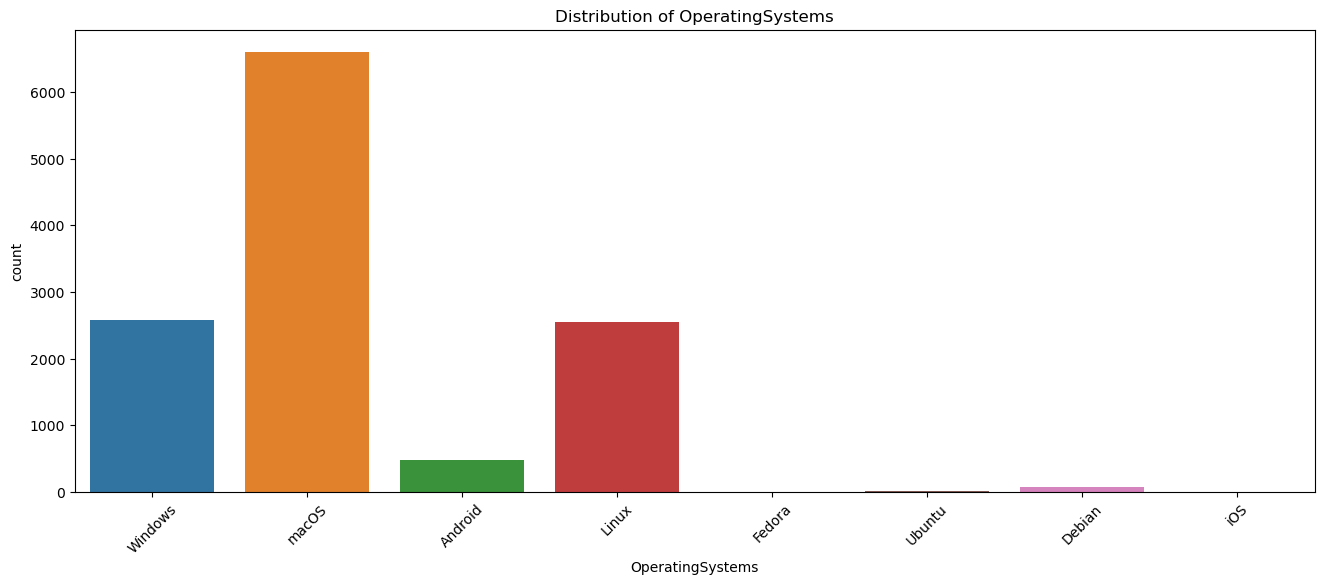

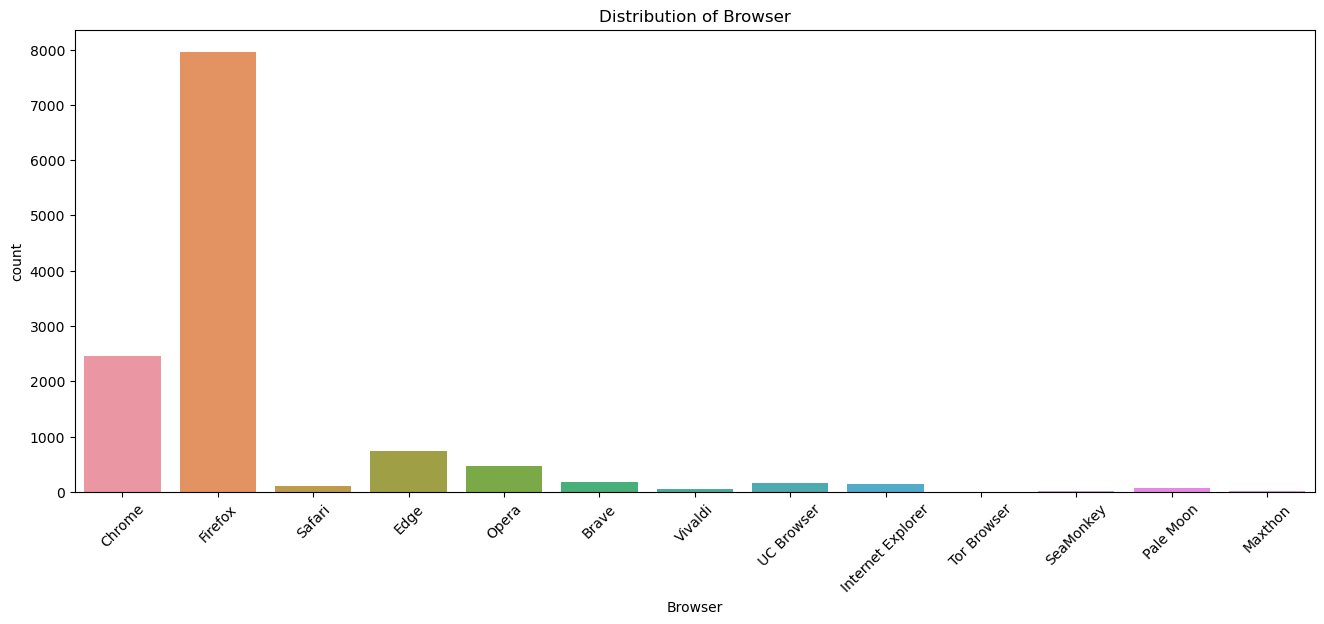

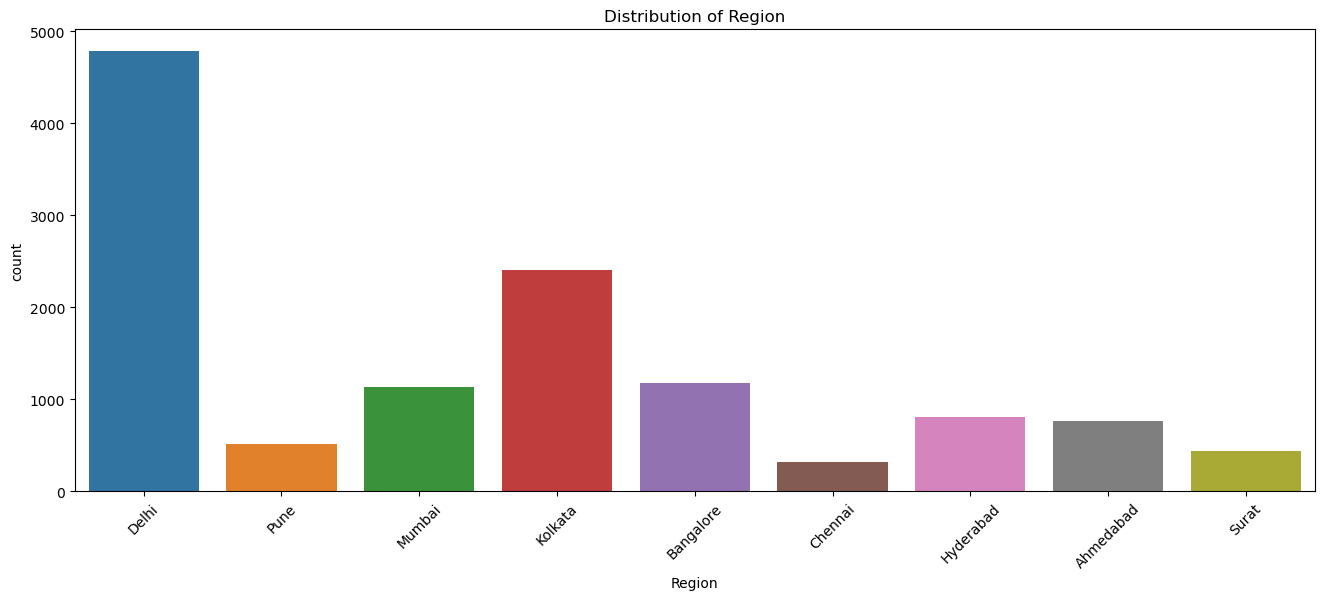

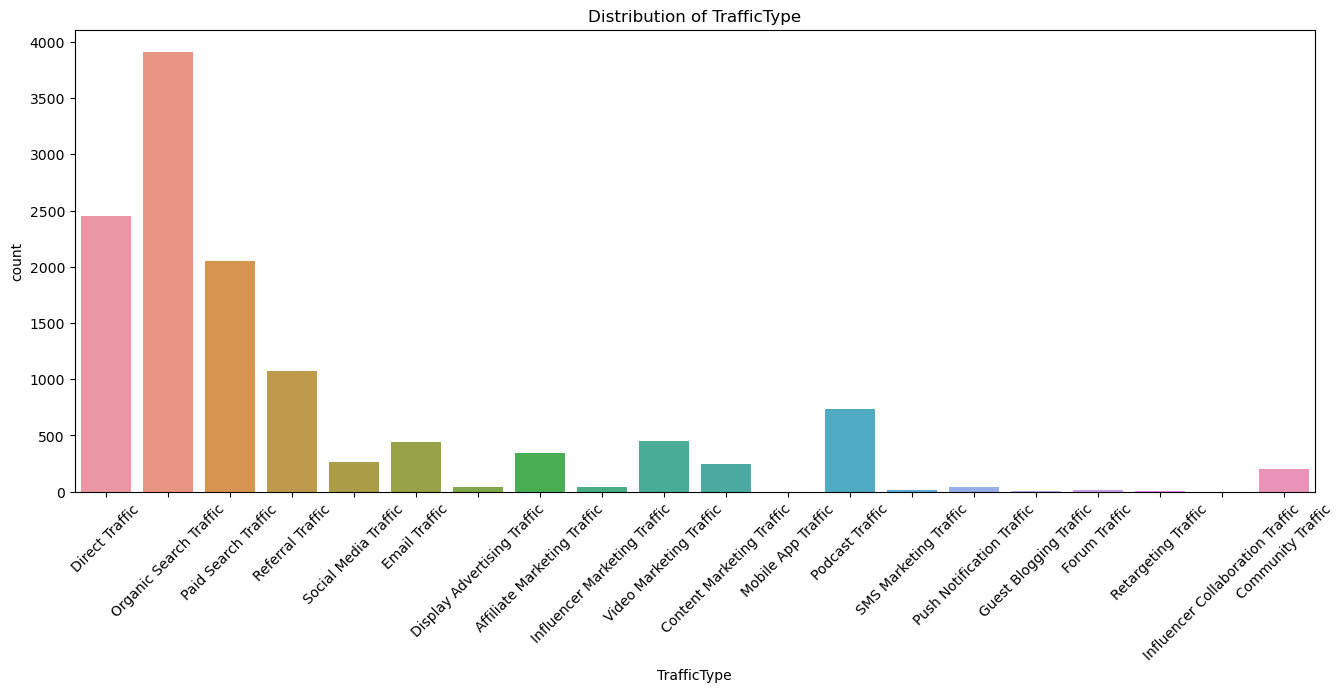

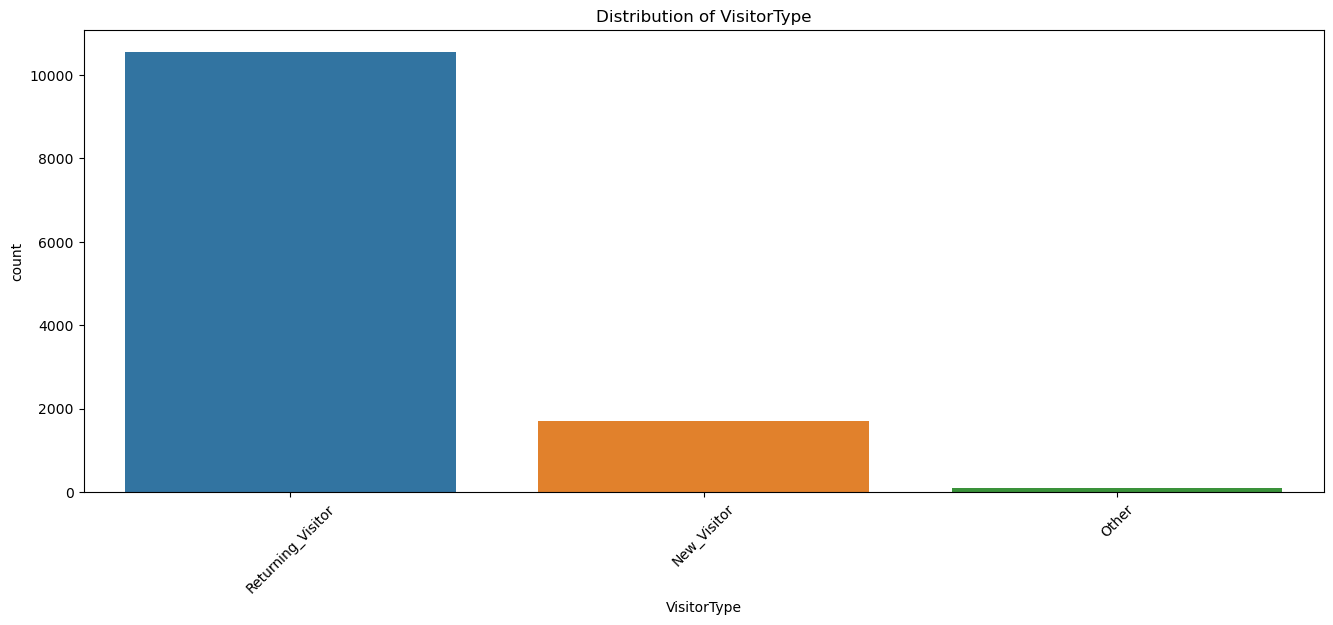

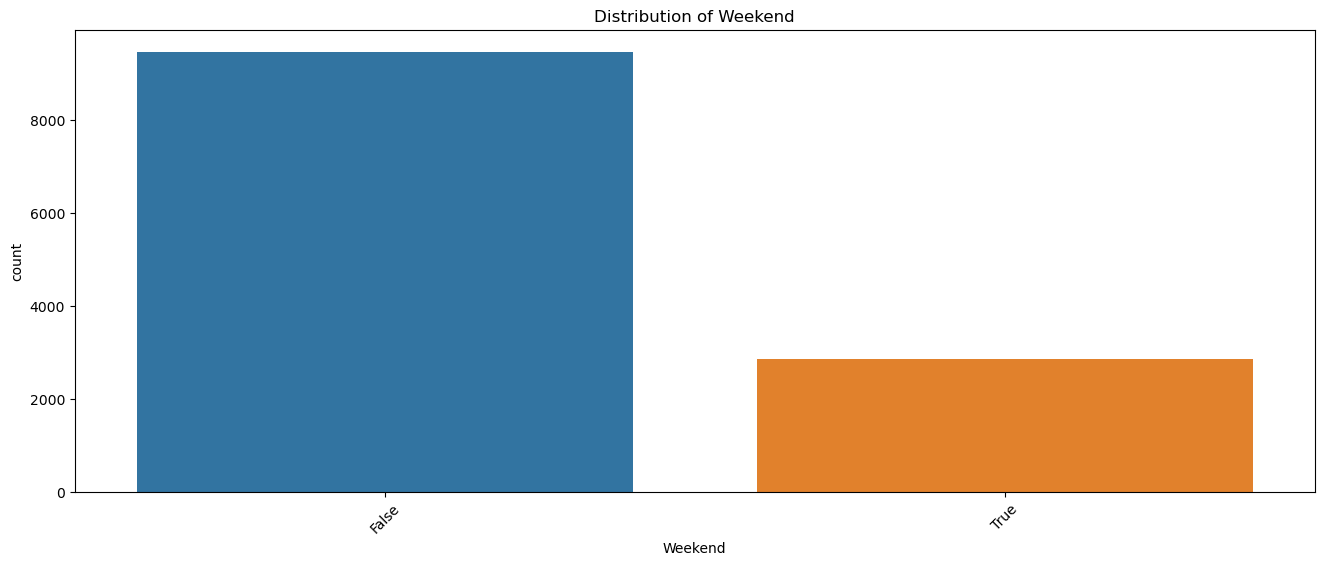

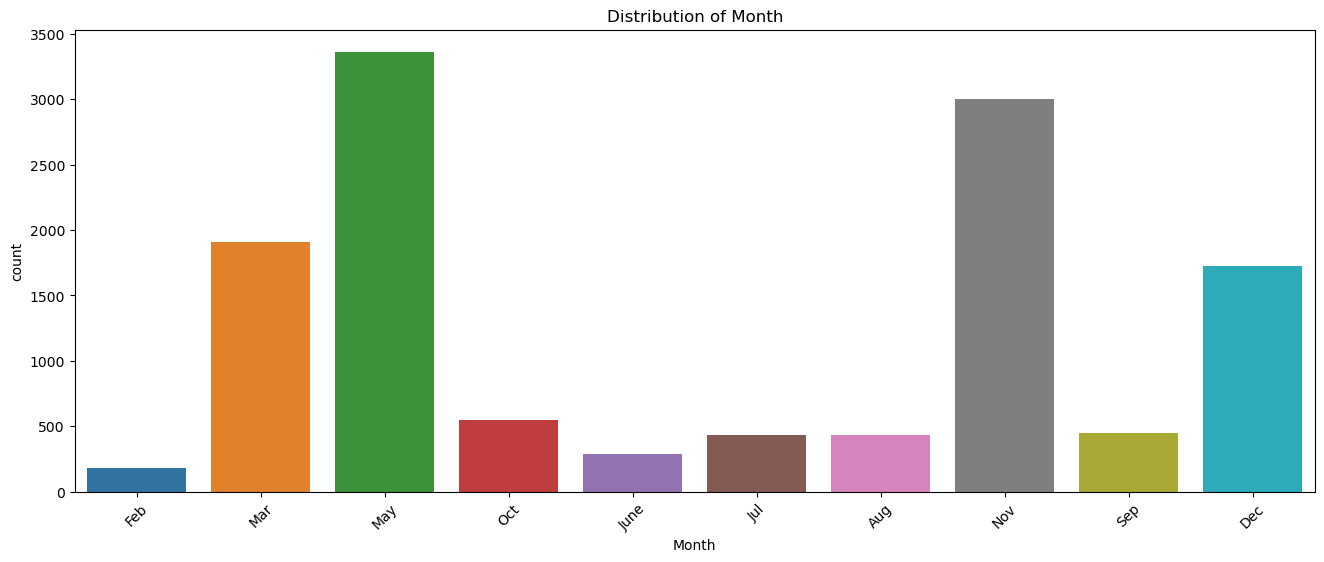

In [ ]:
#5. Categorial Data Analysis :

categorical_features = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Month']
for col in categorical_features:
    plt.figure(figsize=(16,6))
    sns.countplot(x=df[col])
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.show()

# Fact 01 : Operating Sytem --> From Graph, macOS is the most popular operating system, followed by Windows.
# Fact 02 : Browser --> From Graph, Firefox is the most popular browser, followed by Chrome.
# Fact 03 : Region --> From Graph, Asia is the most popular region, followed by Europe.

### **(06) BIVARIATE ANALYSIS :**

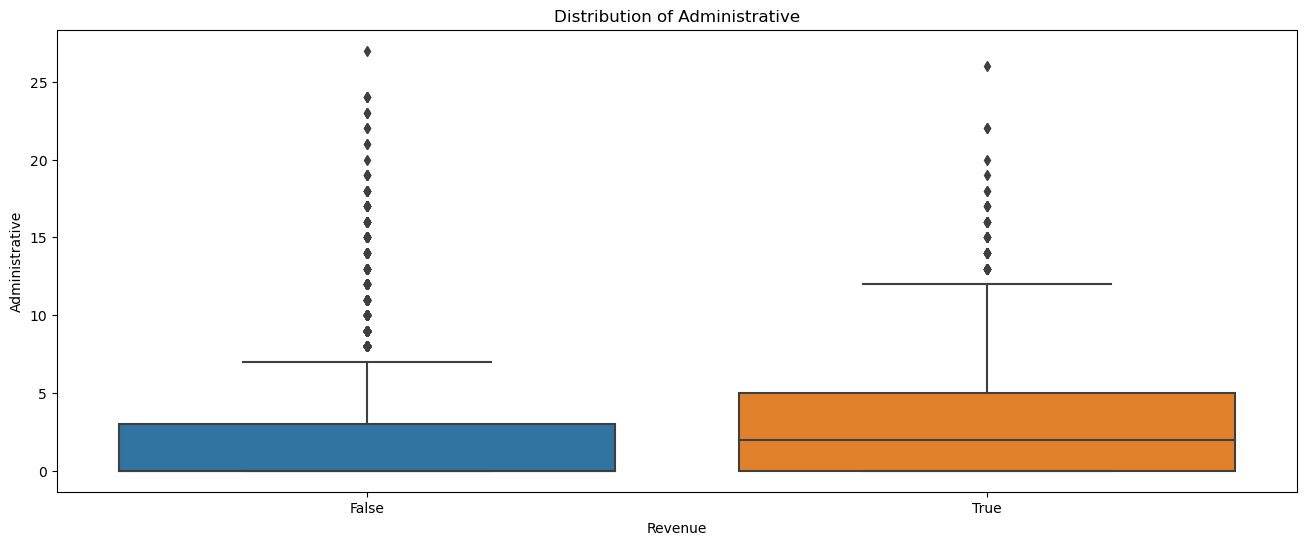

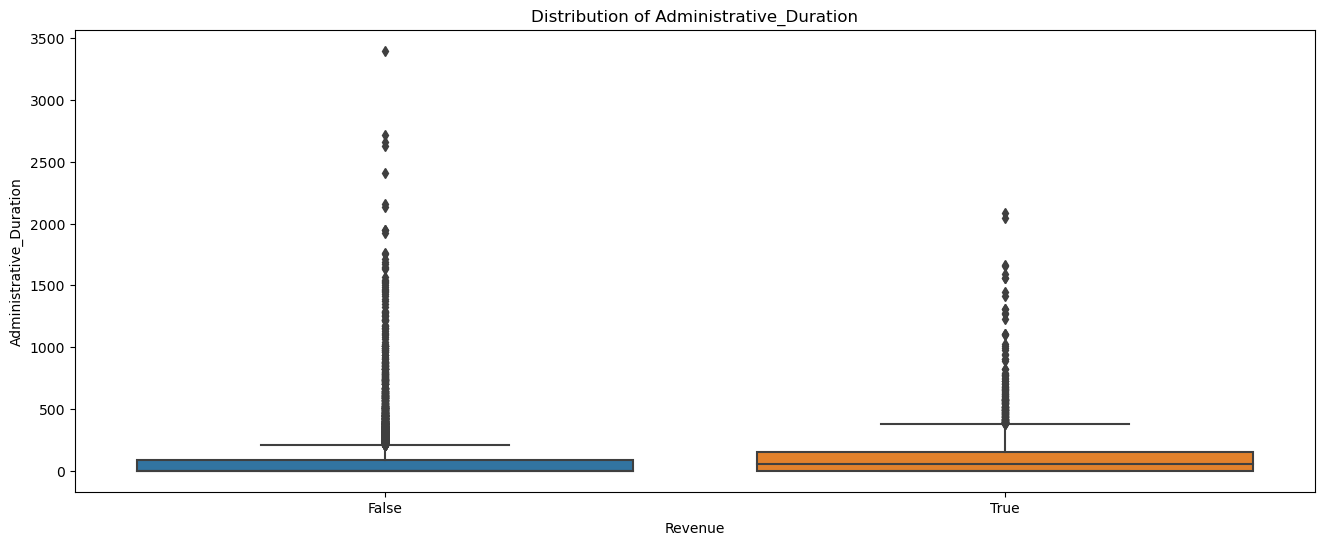

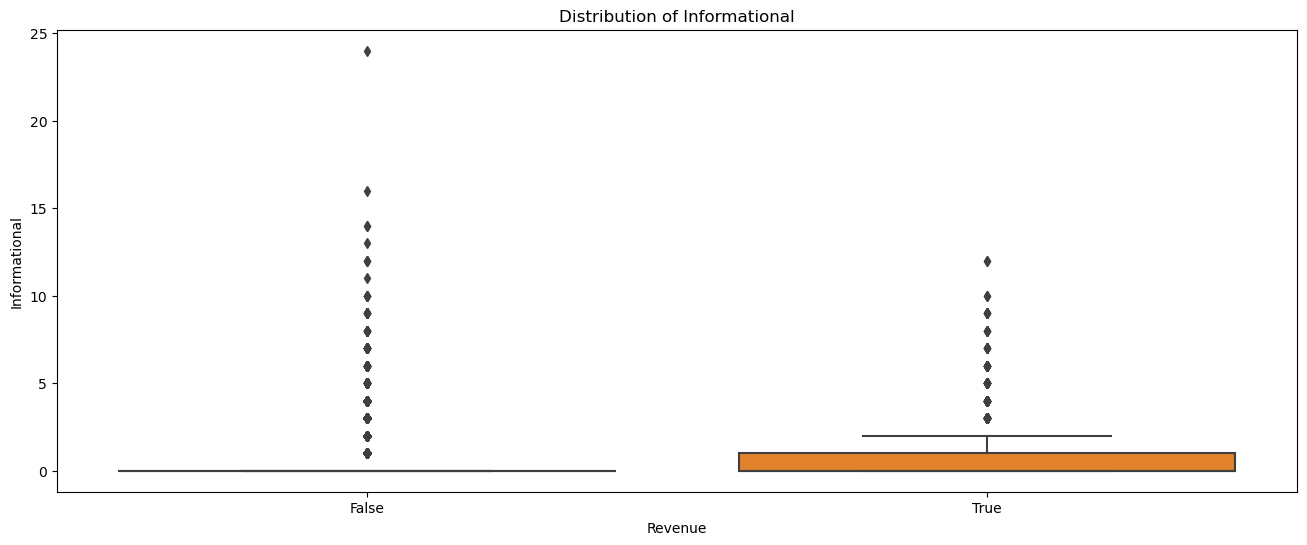

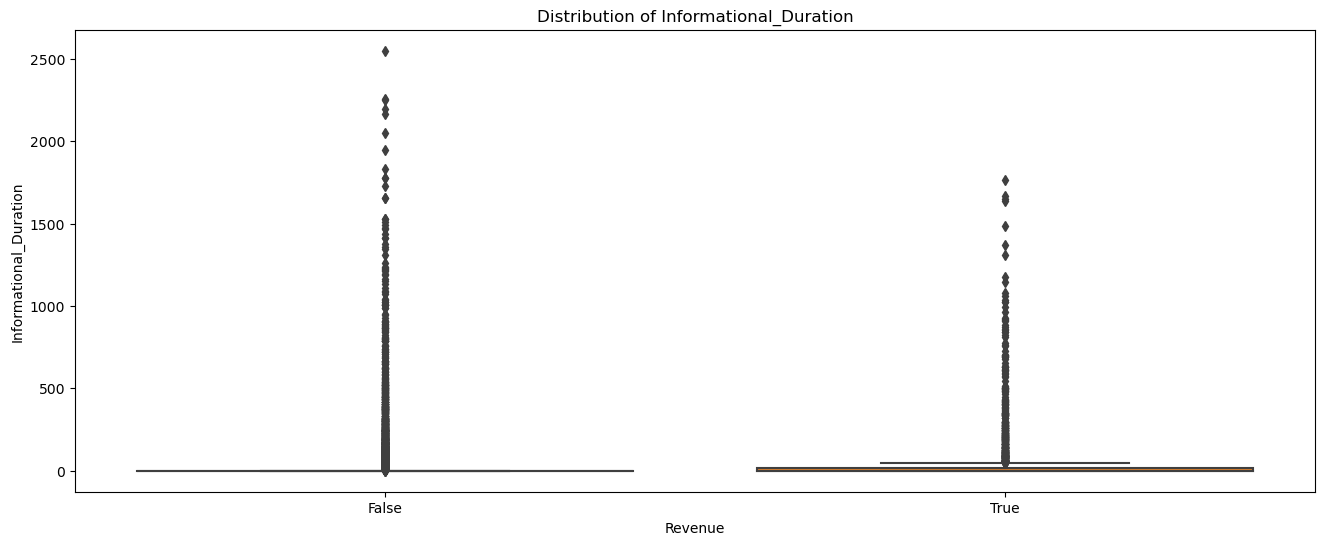

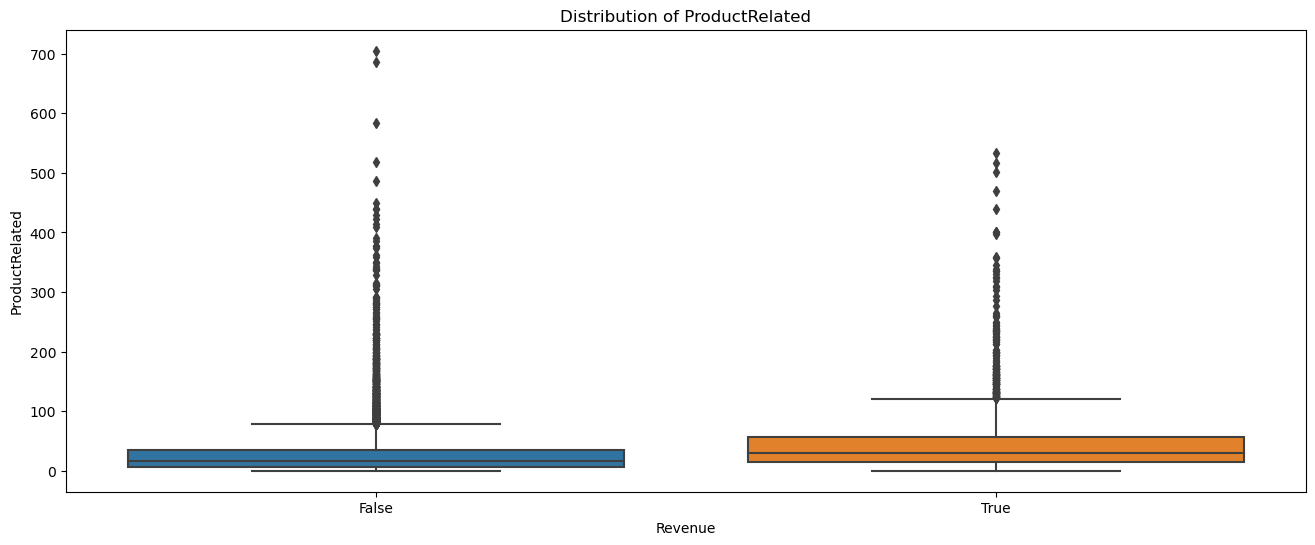

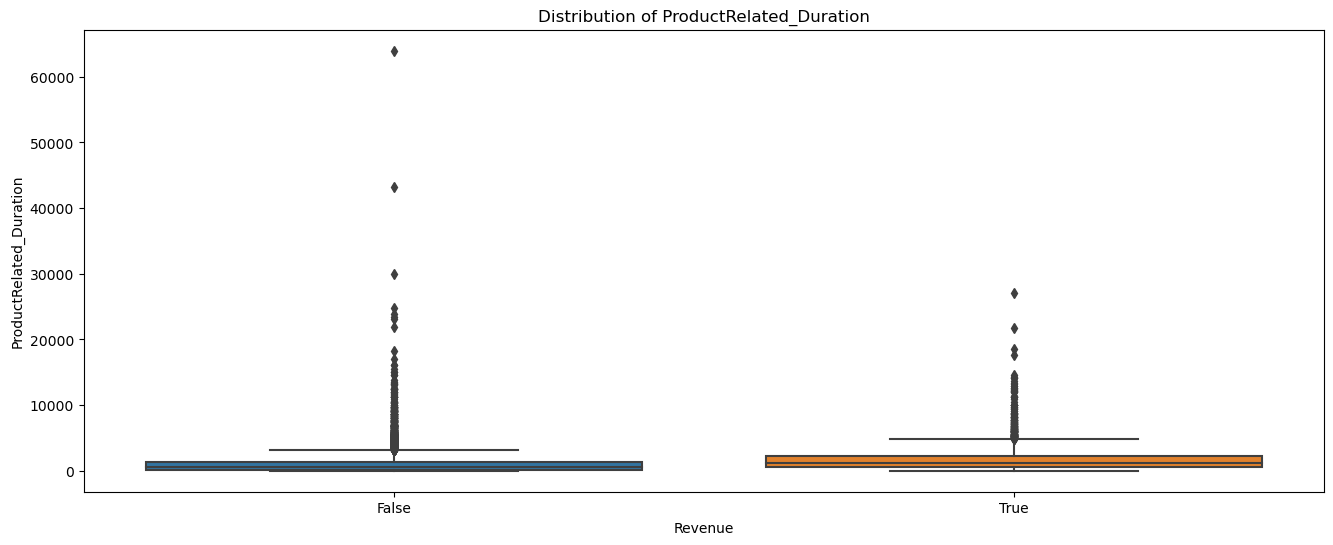

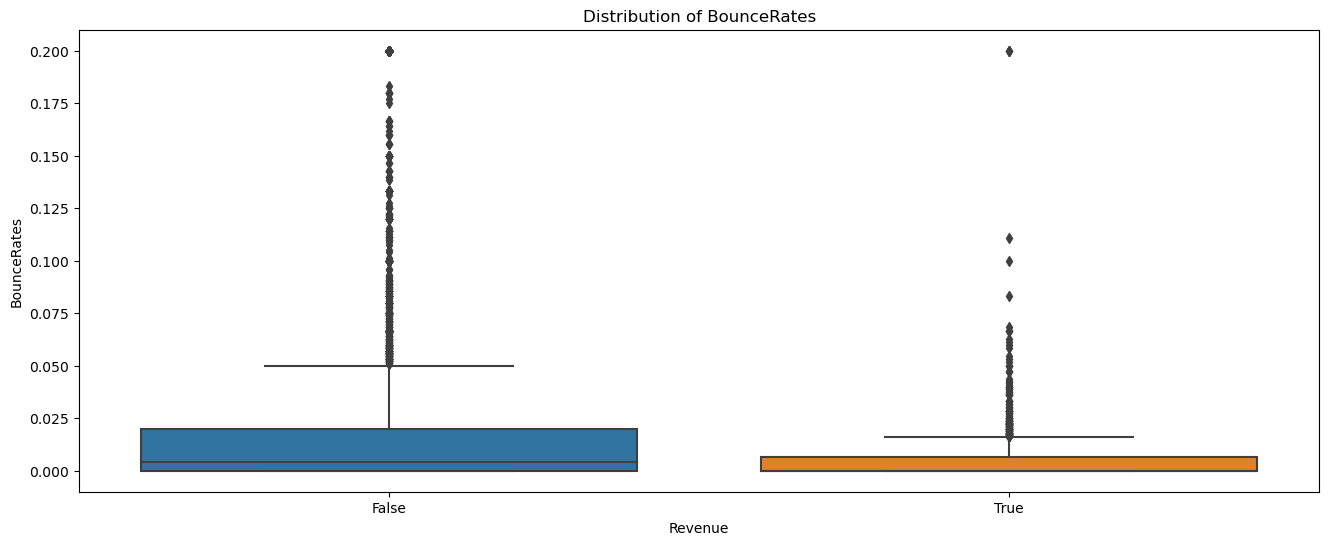

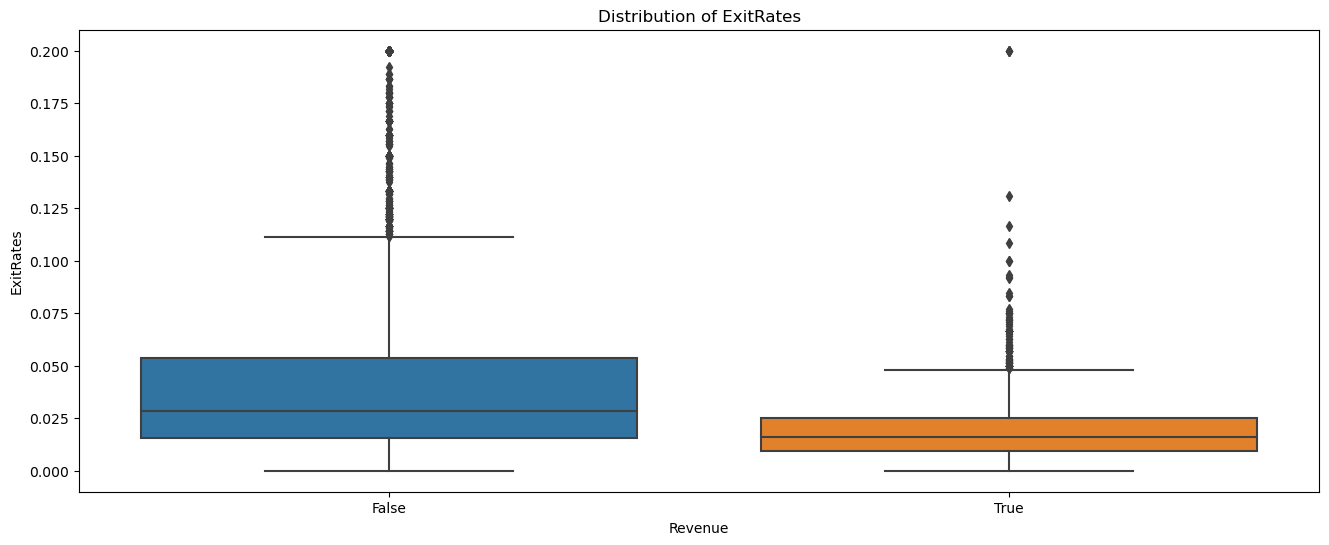

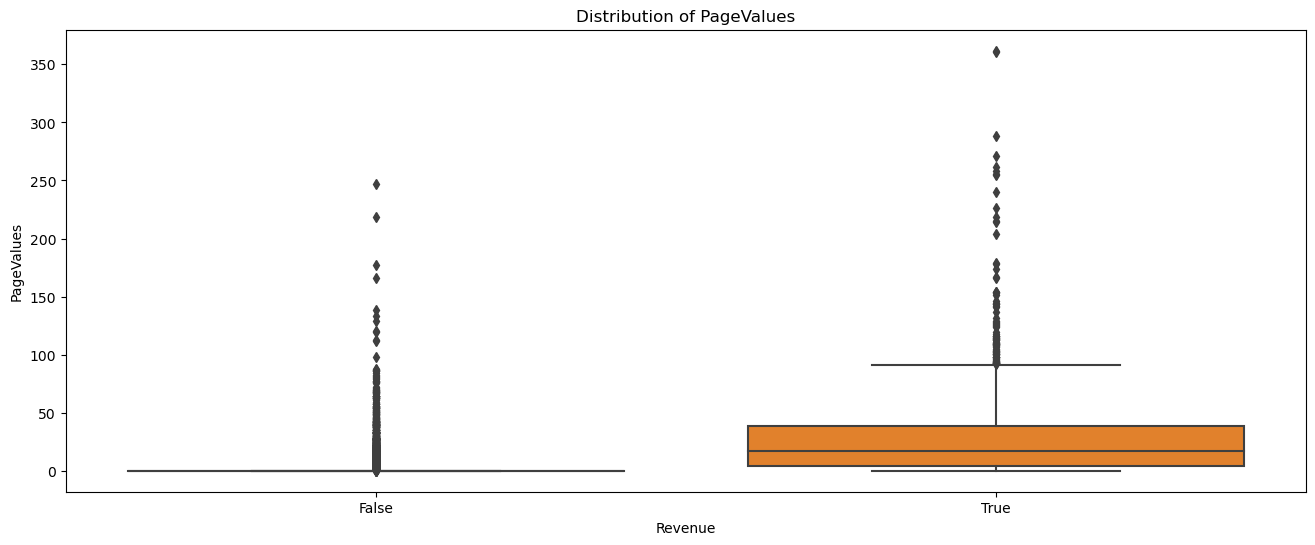

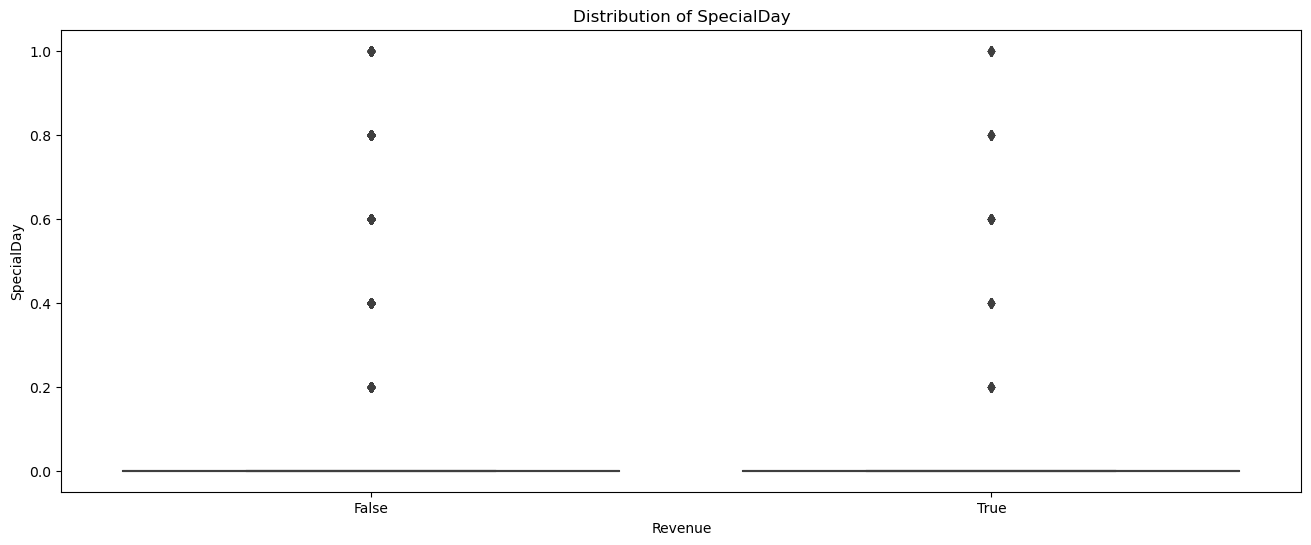

In [ ]:
#6. Bivariate Analysis :

for col in numerical_features:
    plt.figure(figsize=(16,6))
    sns.boxplot(x=df['Revenue'], y=df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

# Fact 01 : Revenue is not affected by Administrative, Informational, ProductRelated, BounceRates, ExitRates, PageValues.
# Fact 02 : Revenue is affected by SpecialDay, Month, OperatingSystems, Browser, Region, TrafficType, VisitorType, Weekend.    

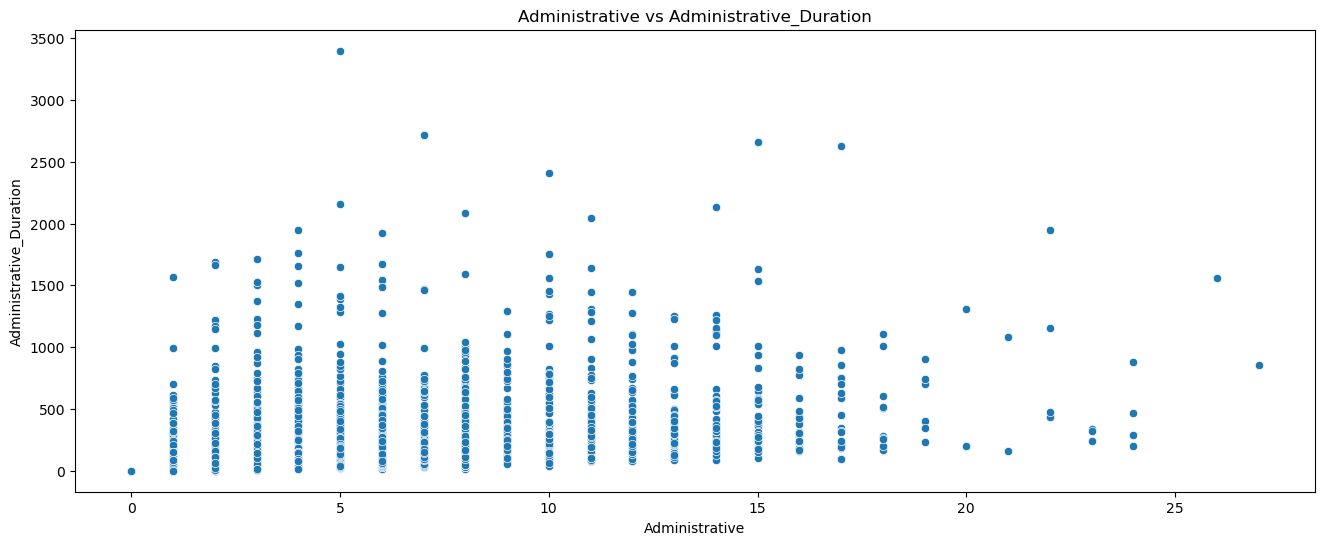

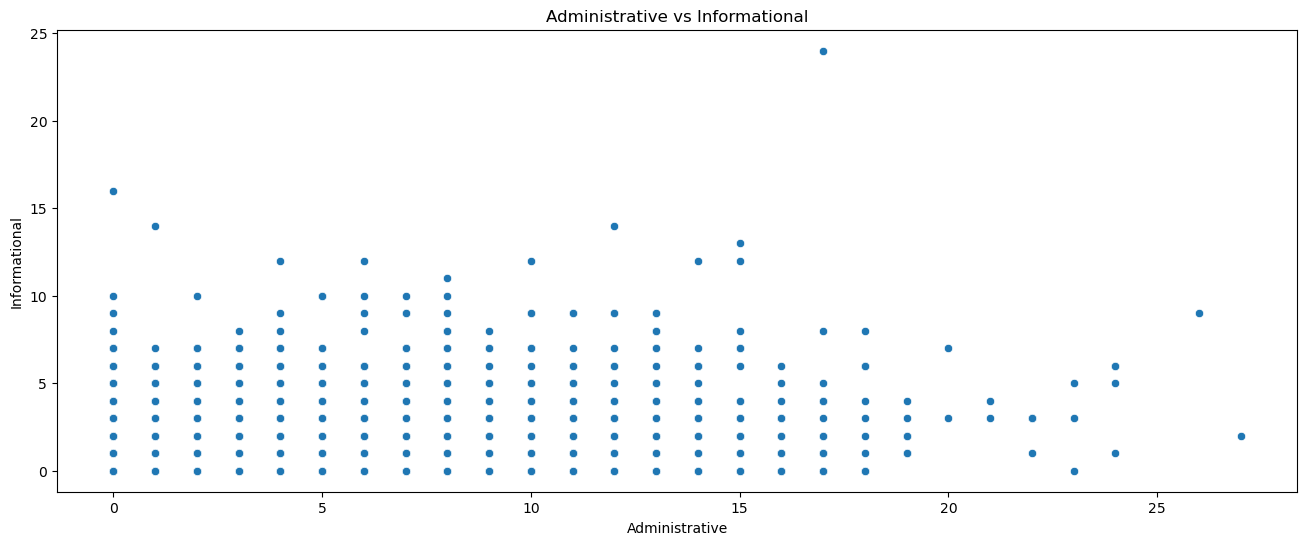

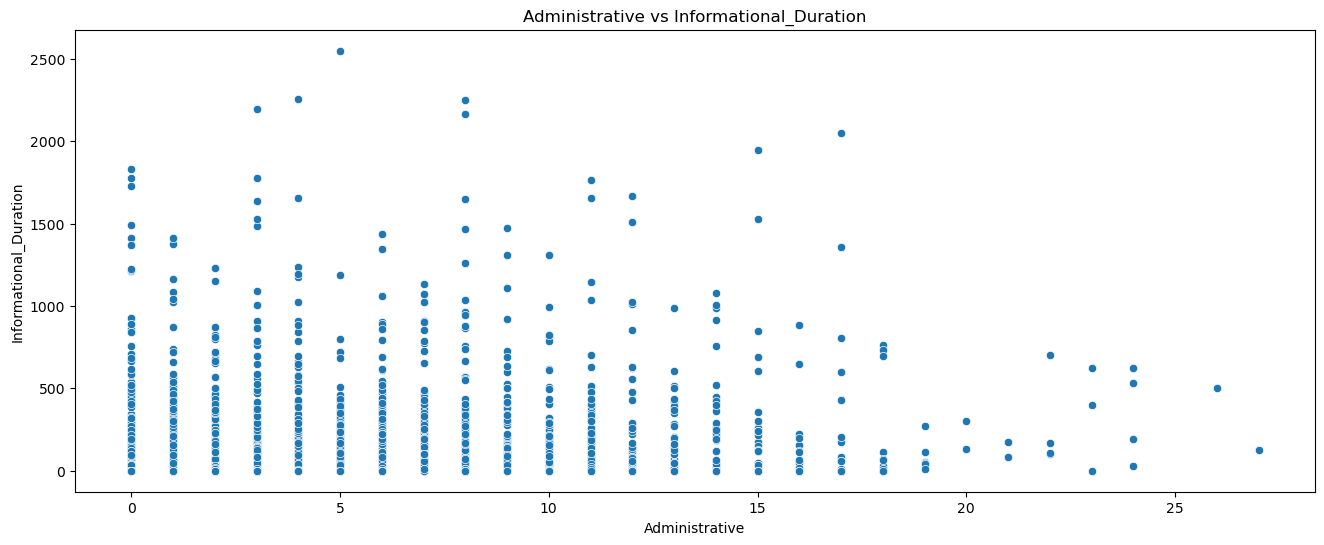

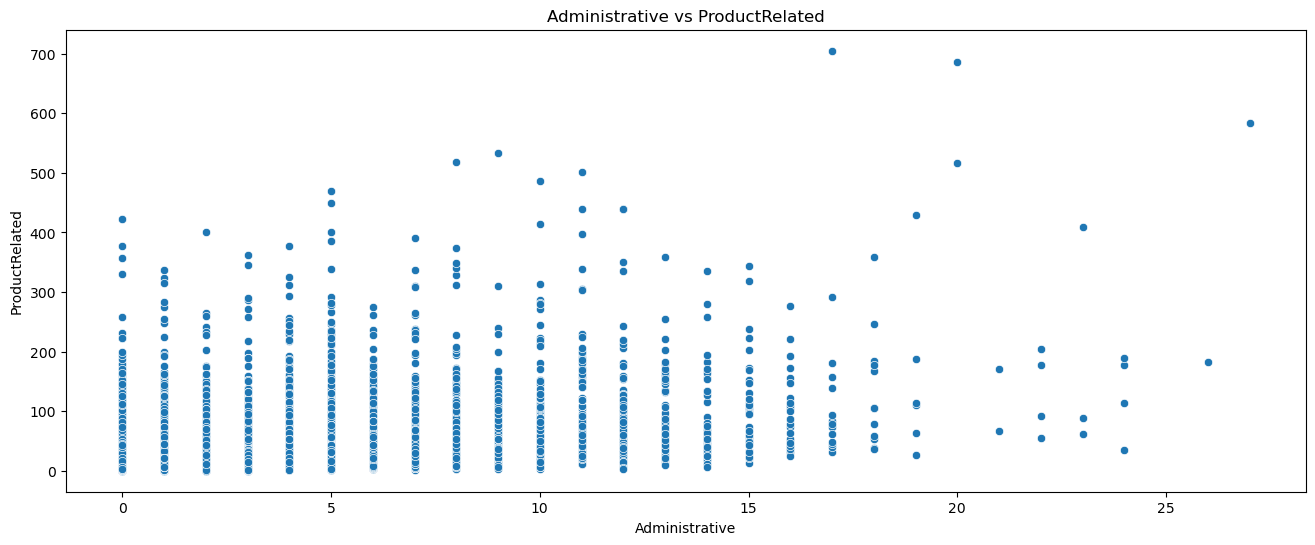

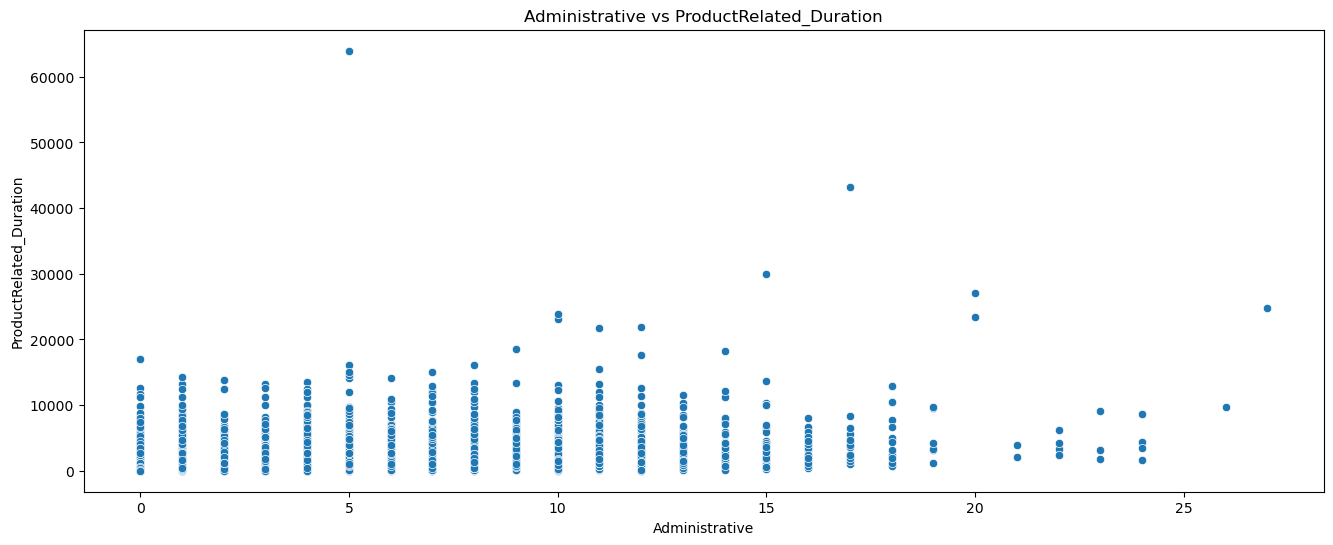

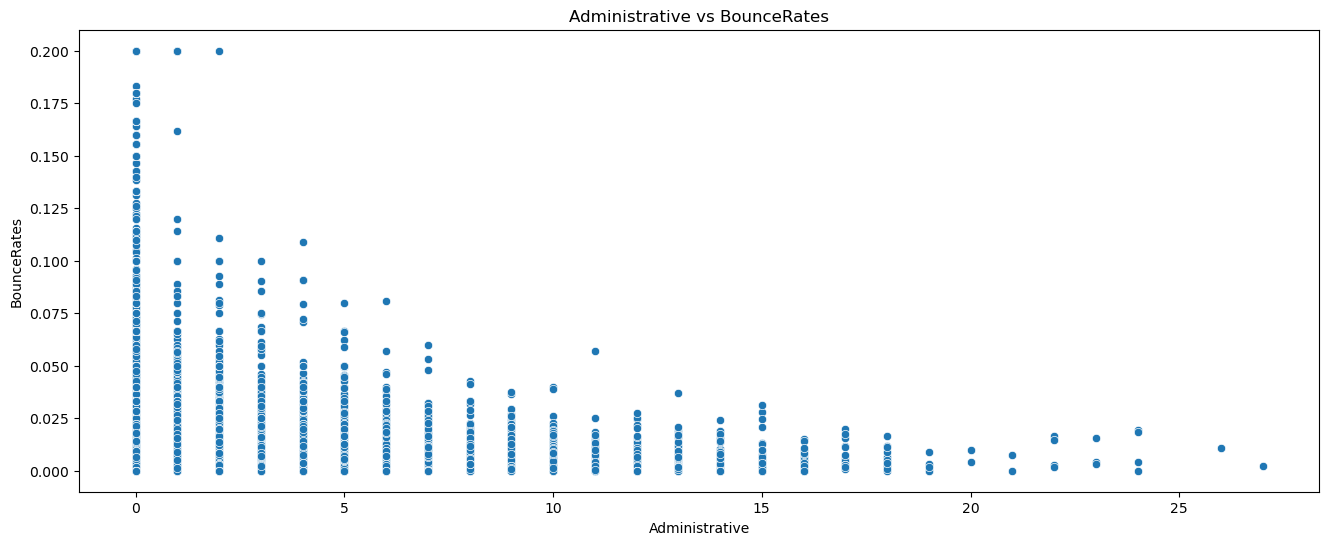

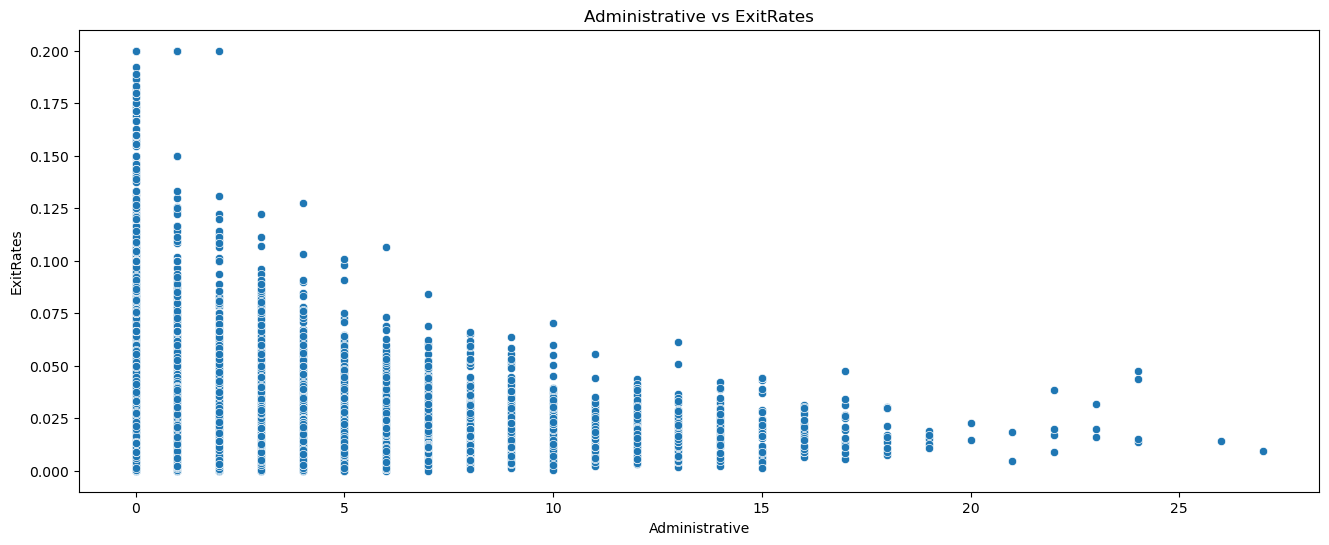

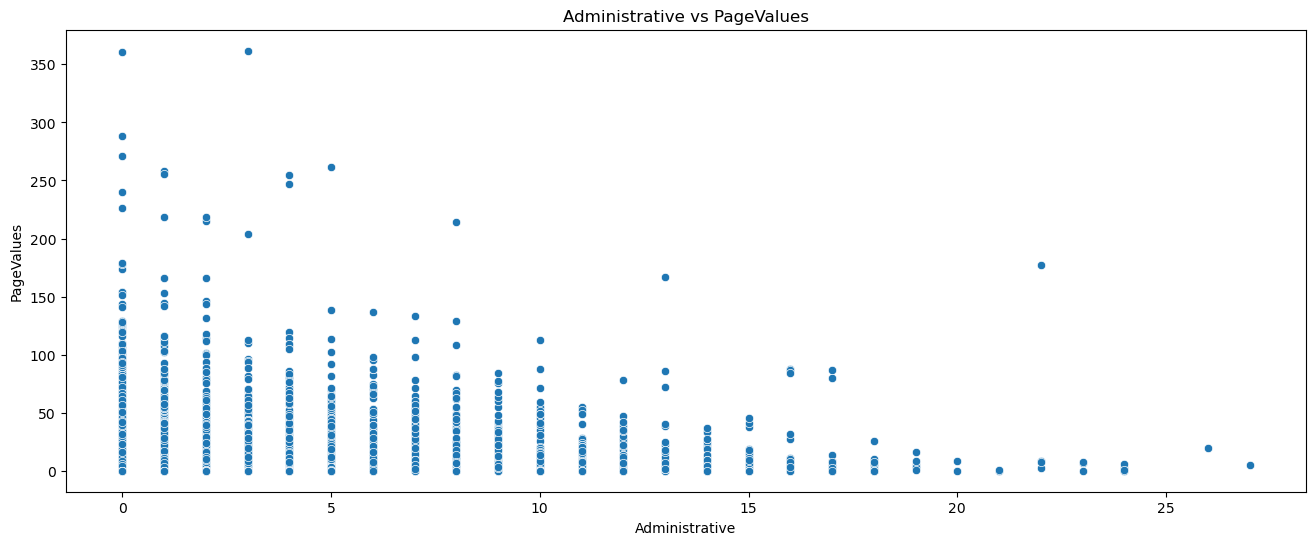

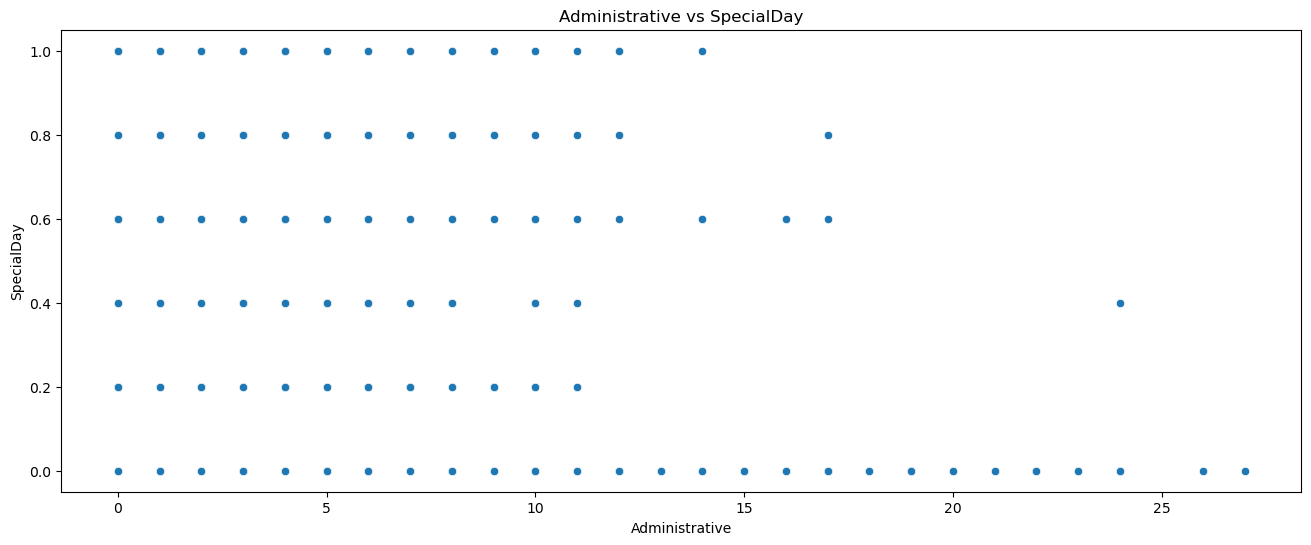

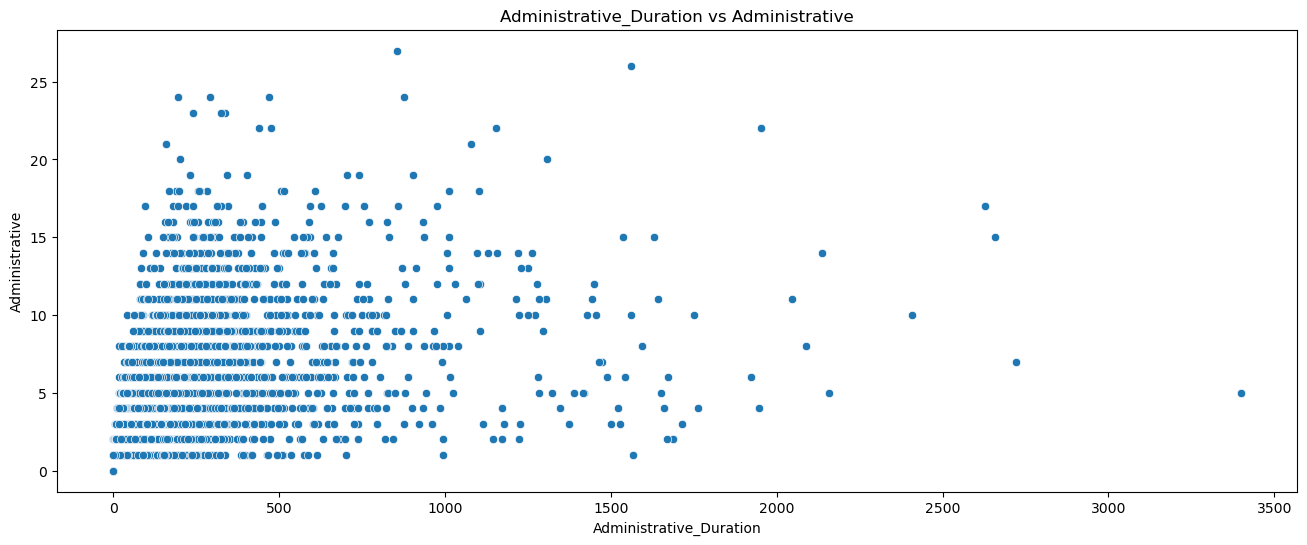

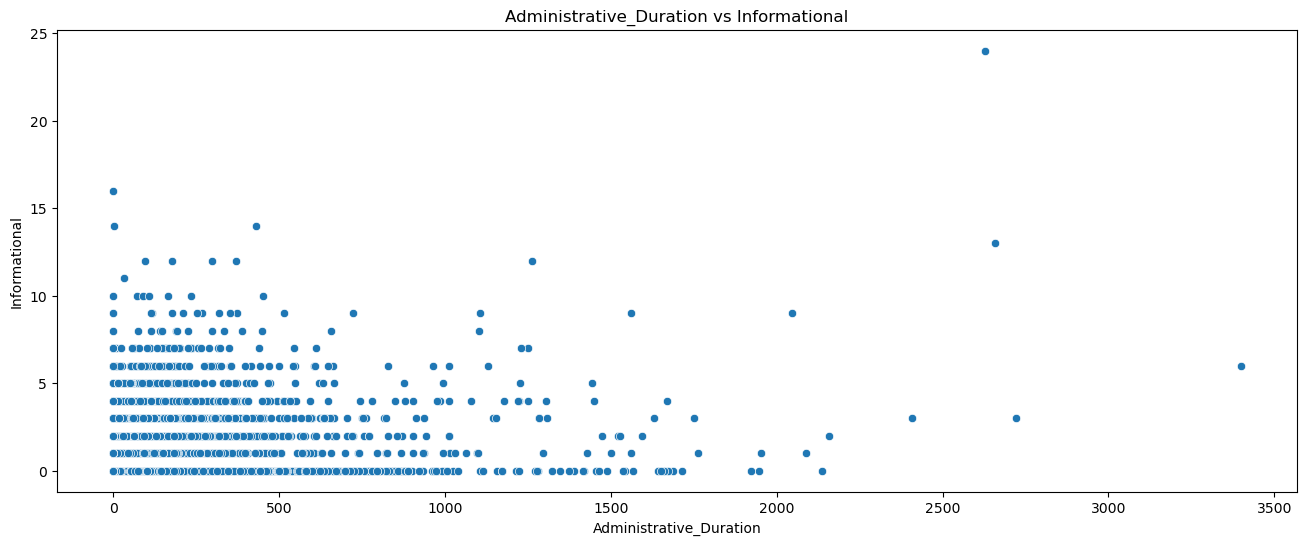

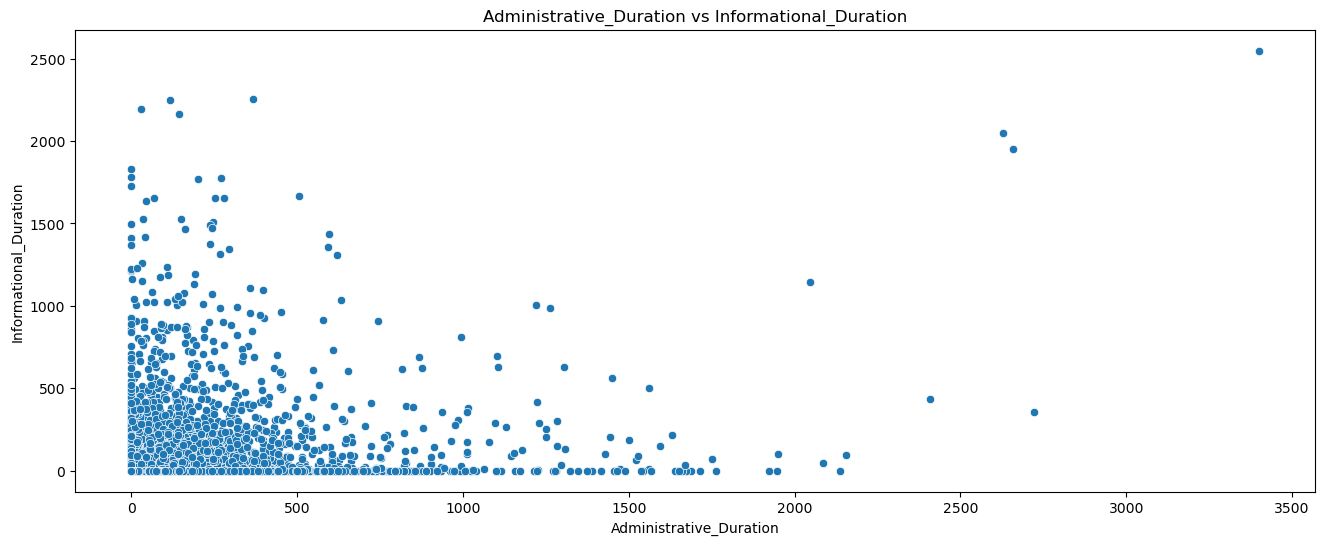

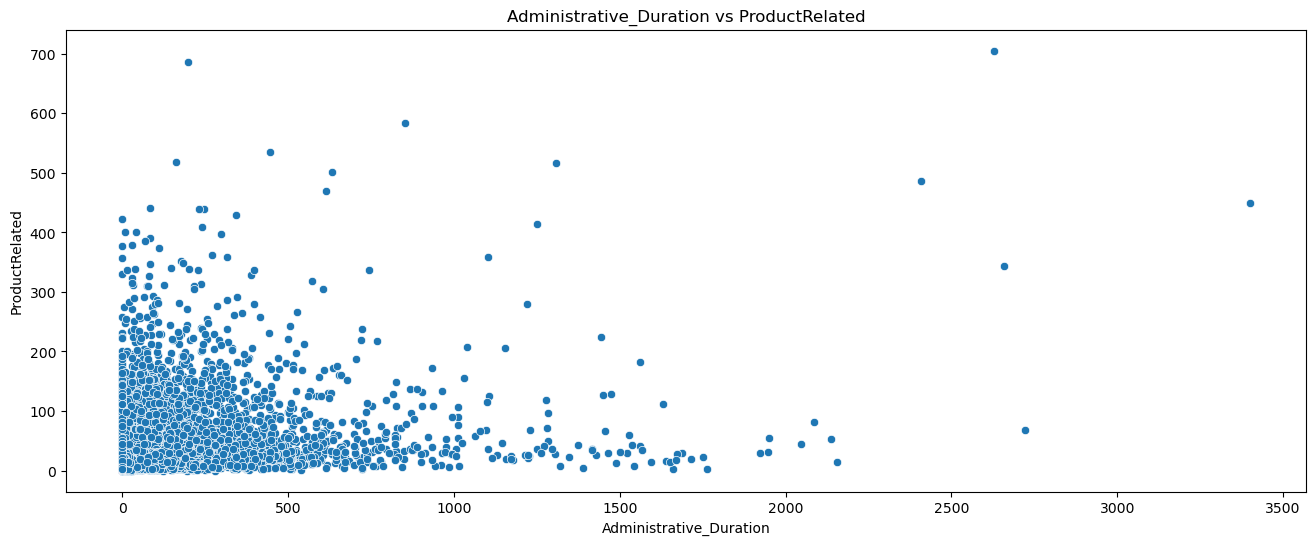

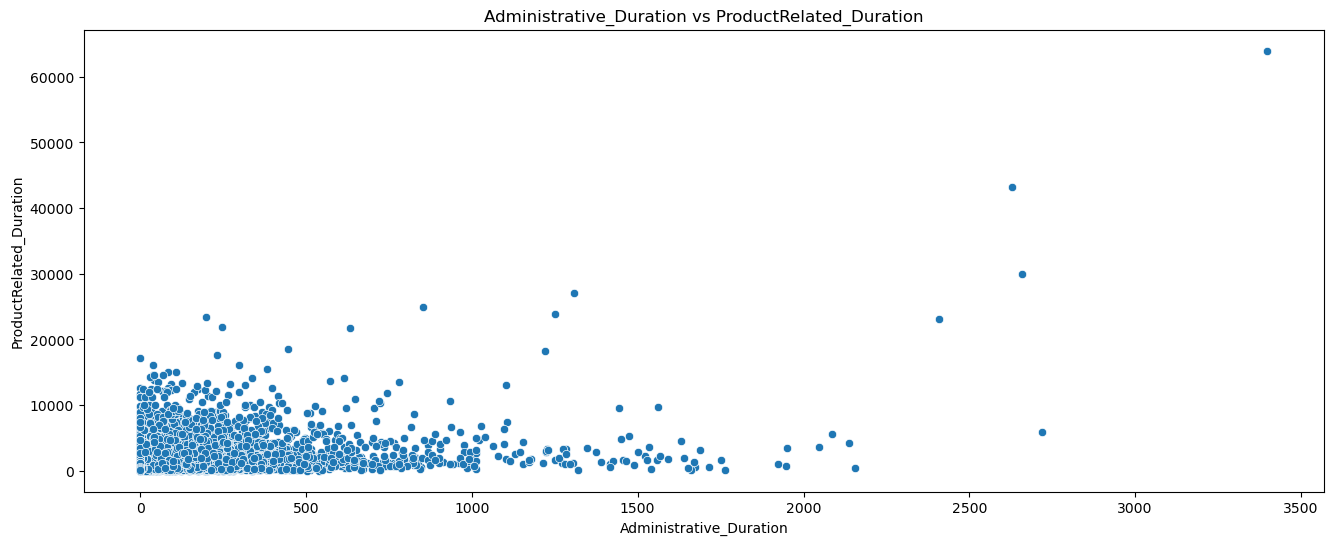

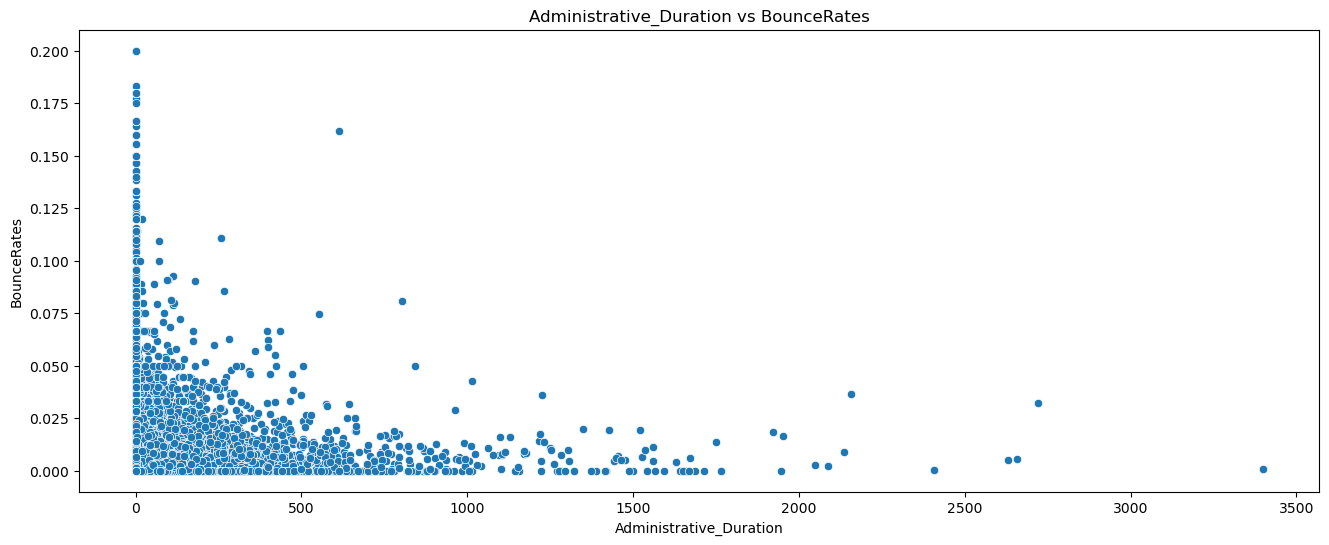

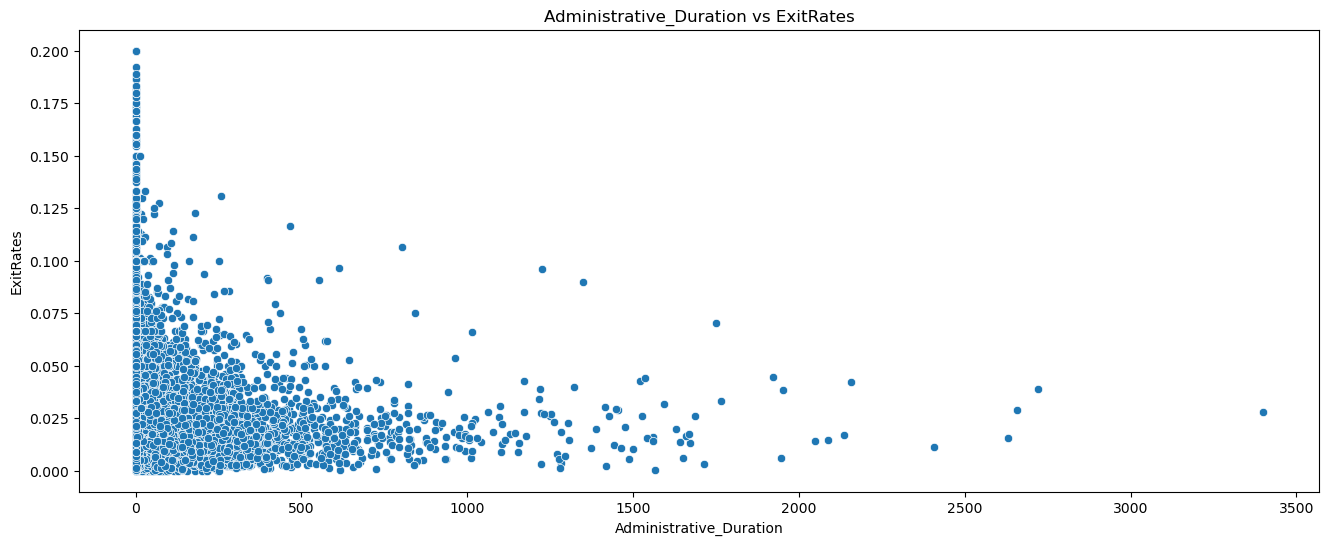

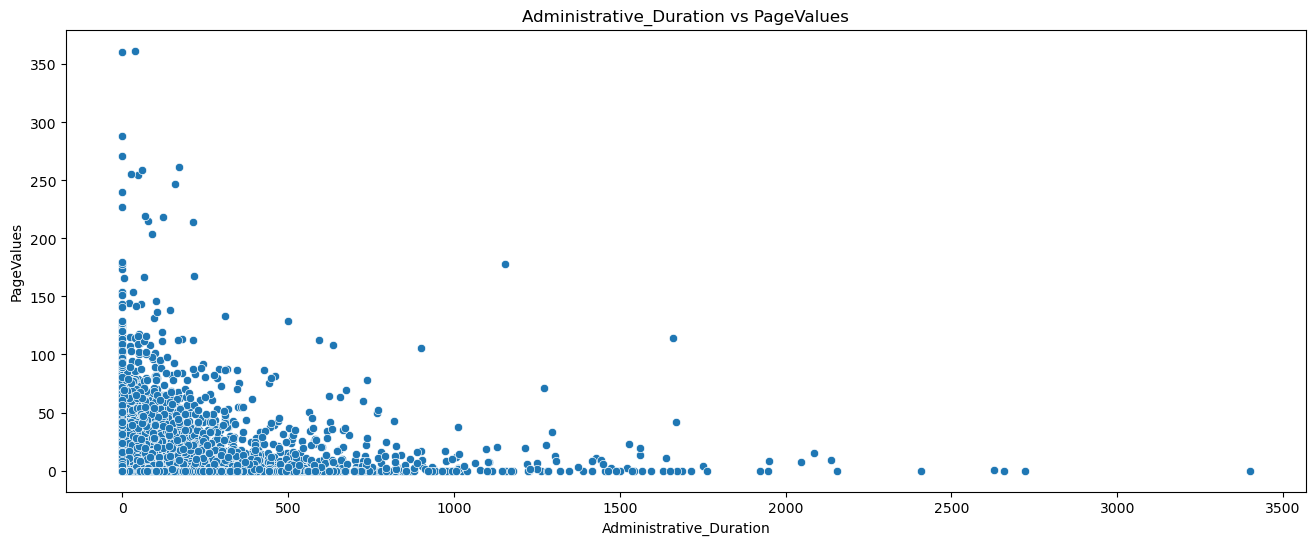

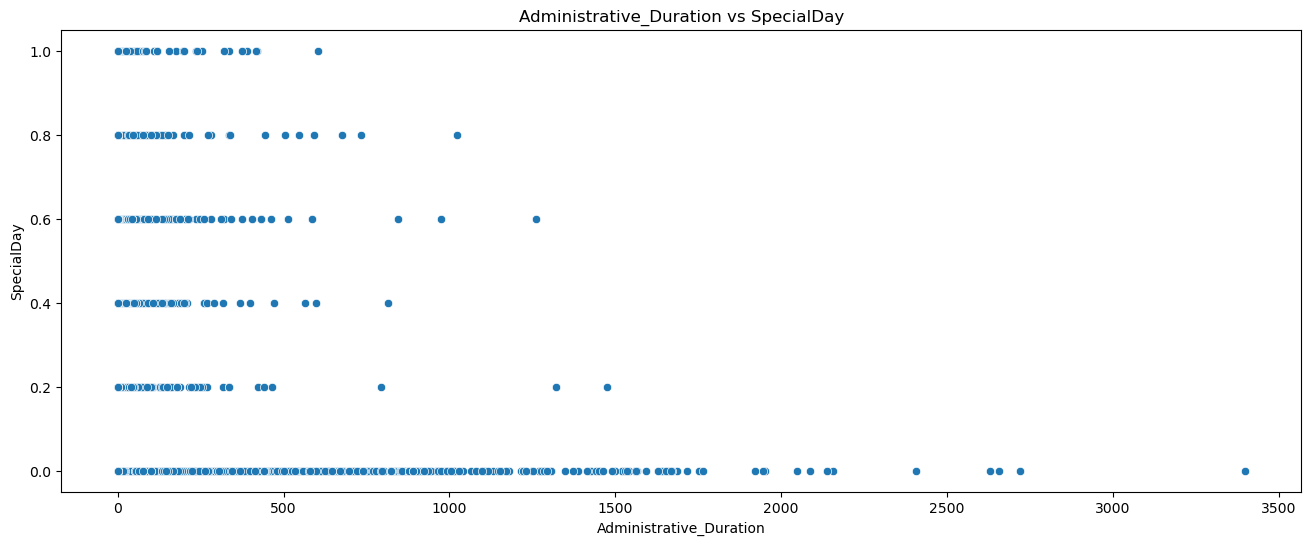

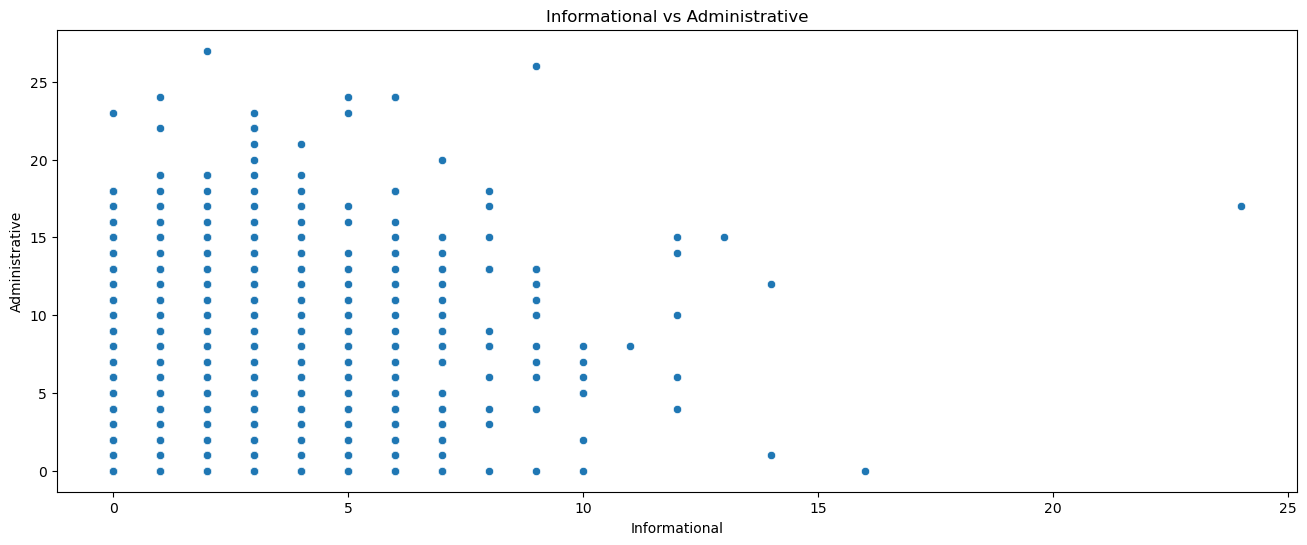

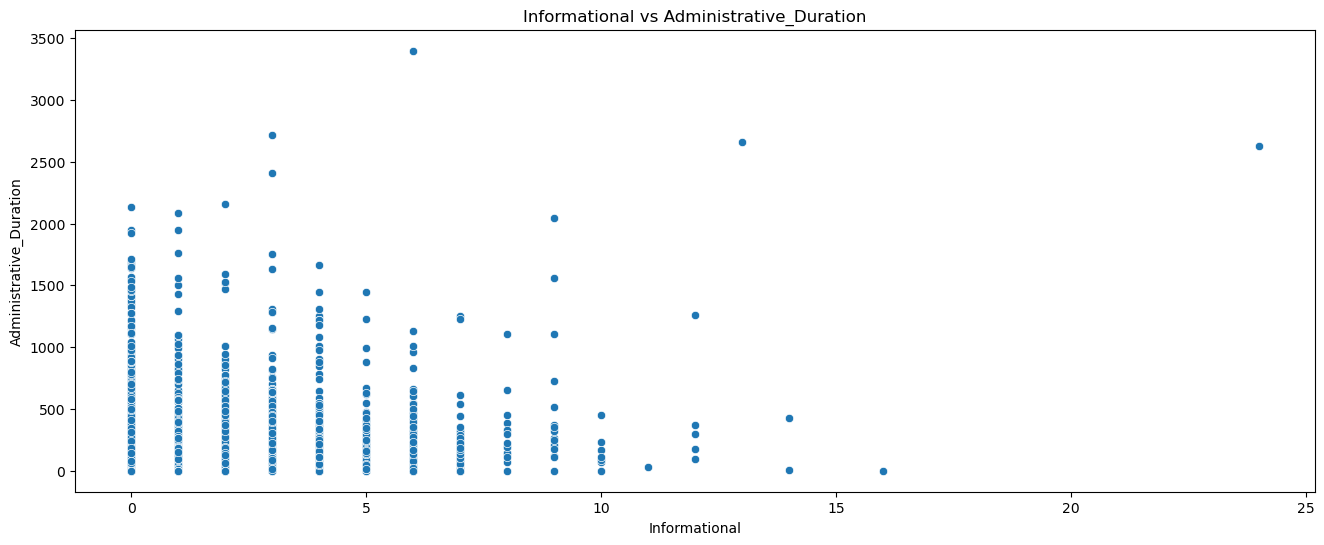

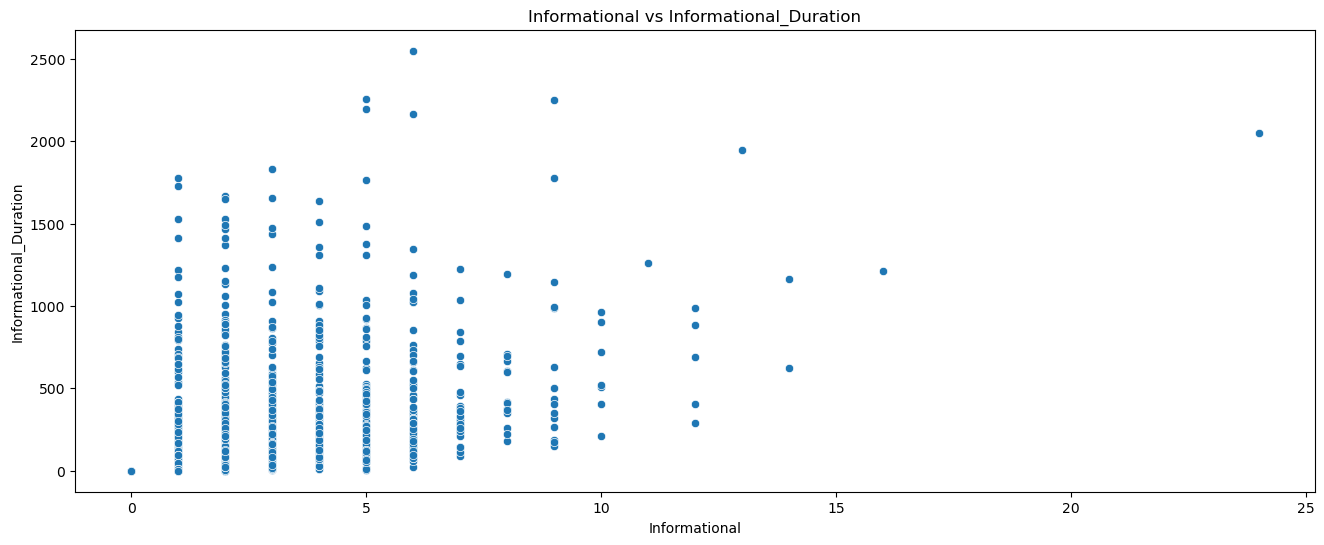

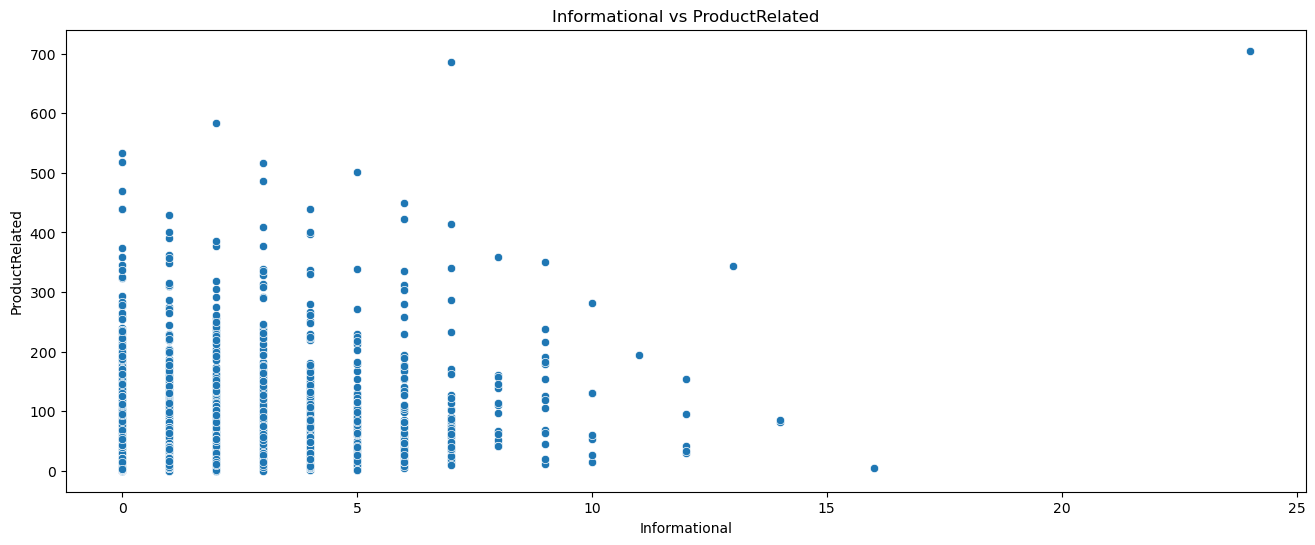

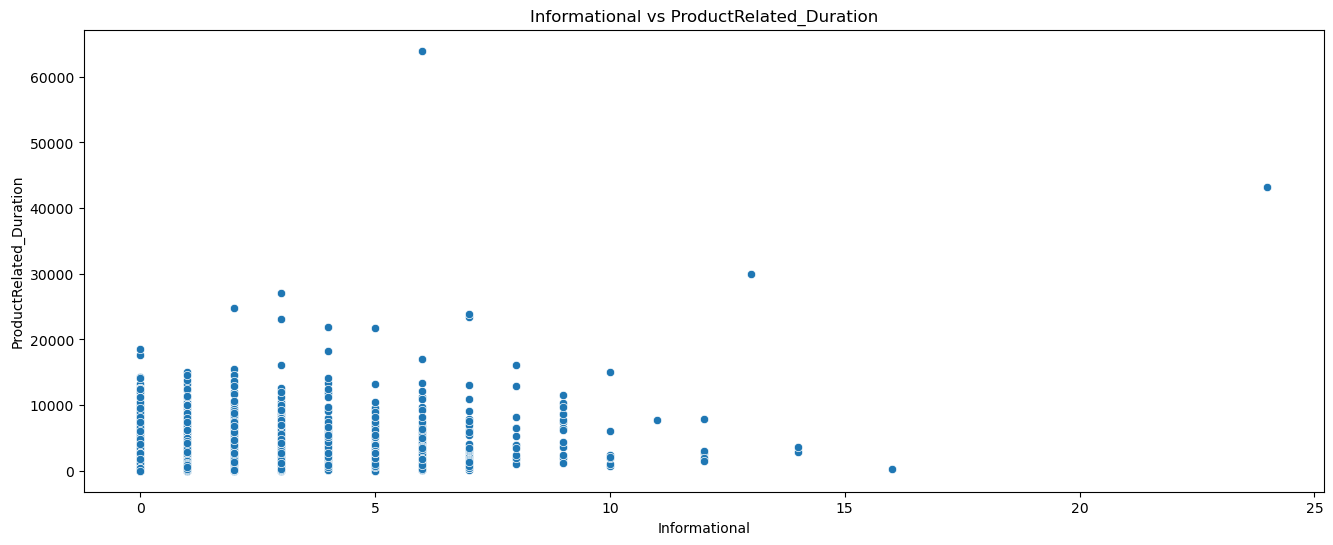

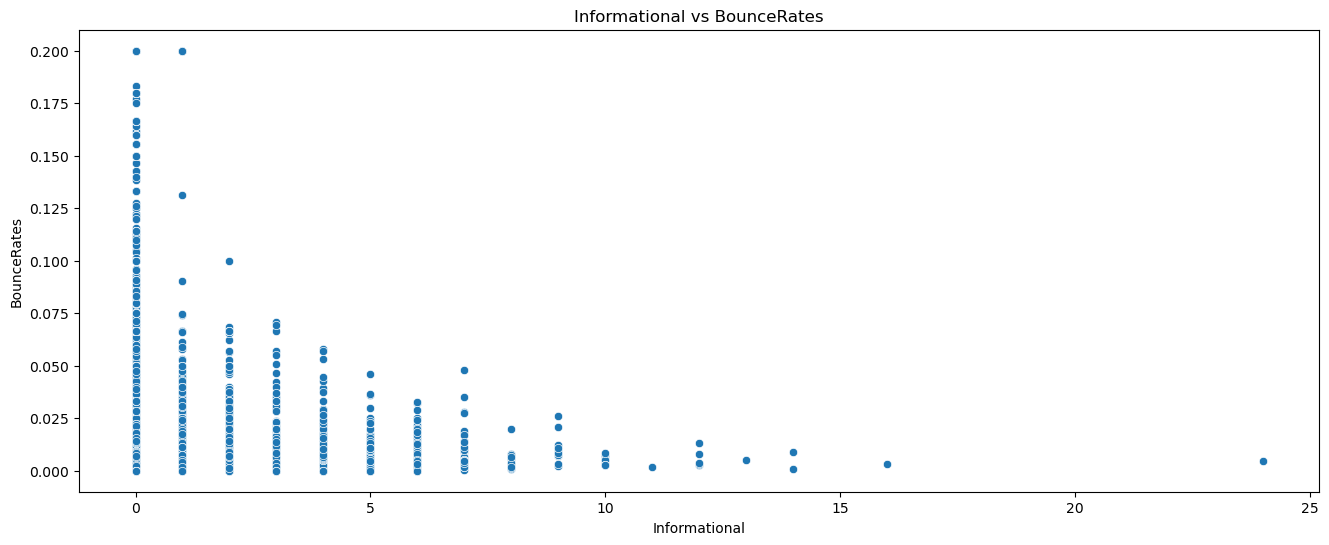

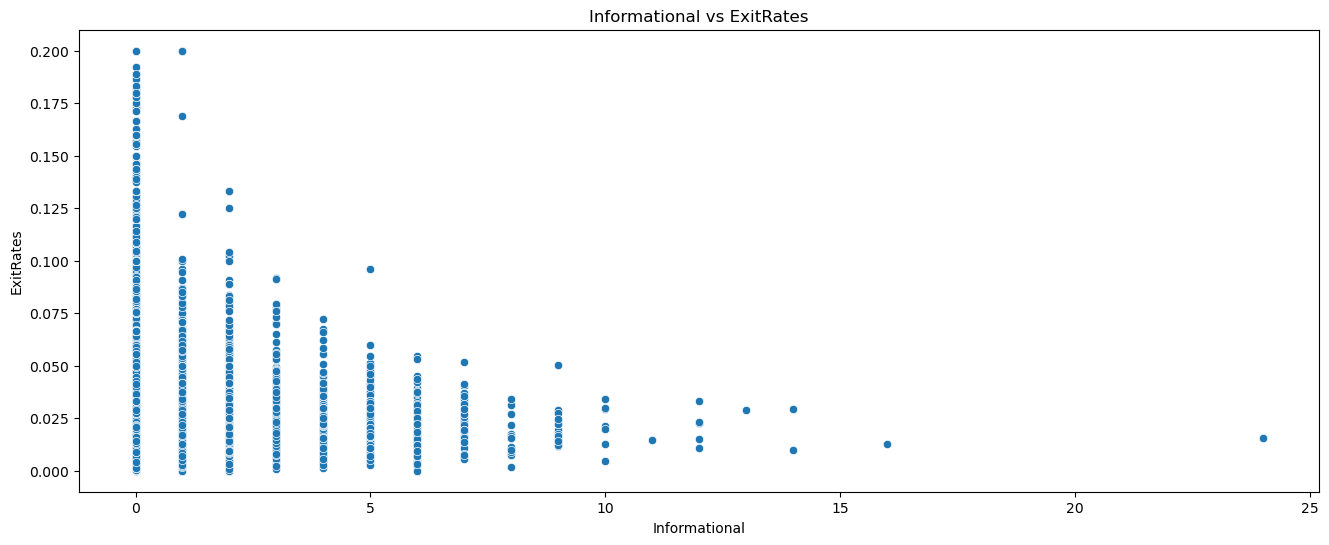

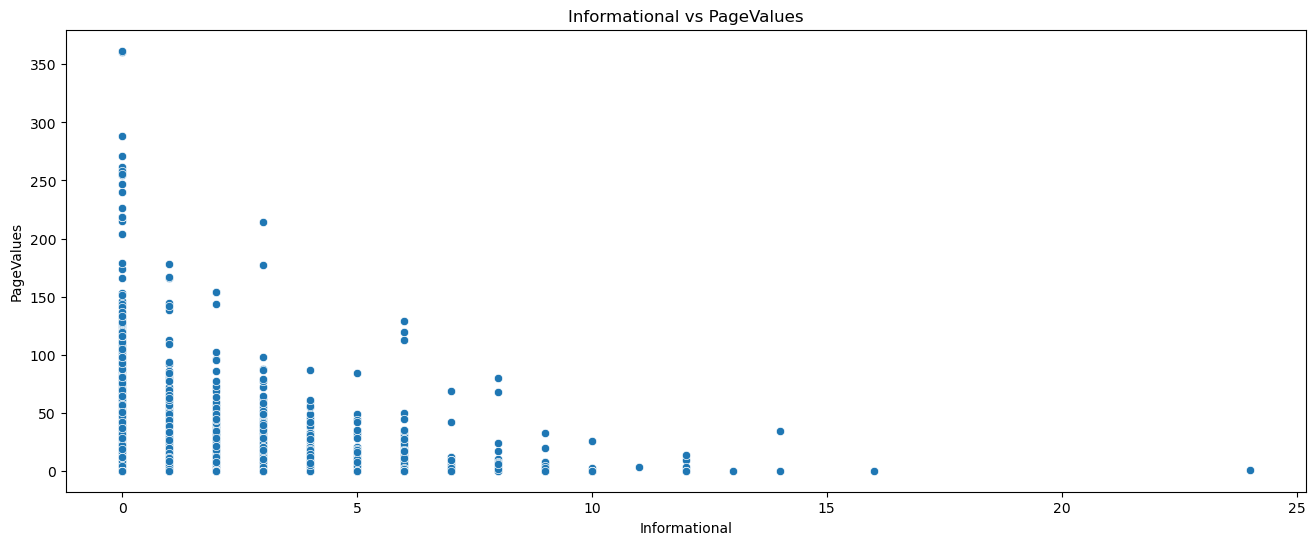

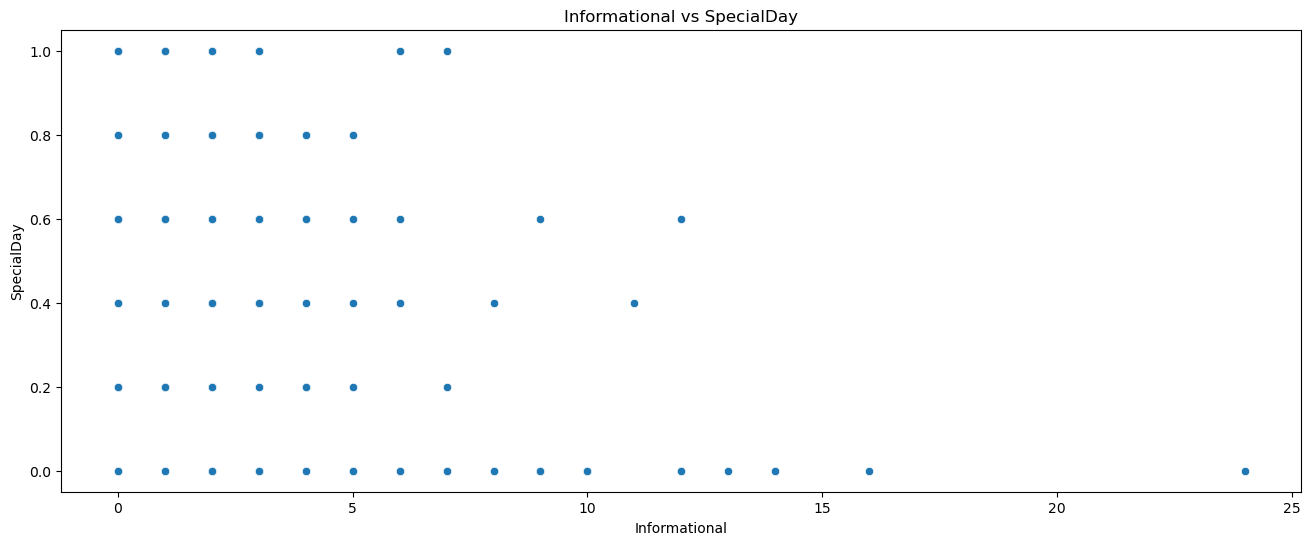

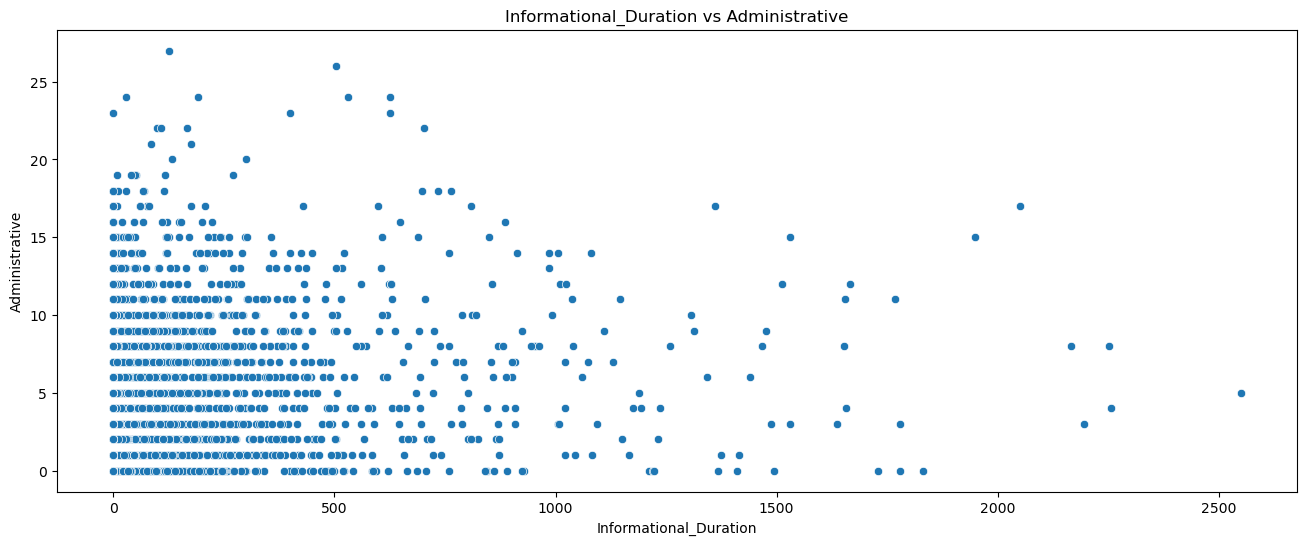

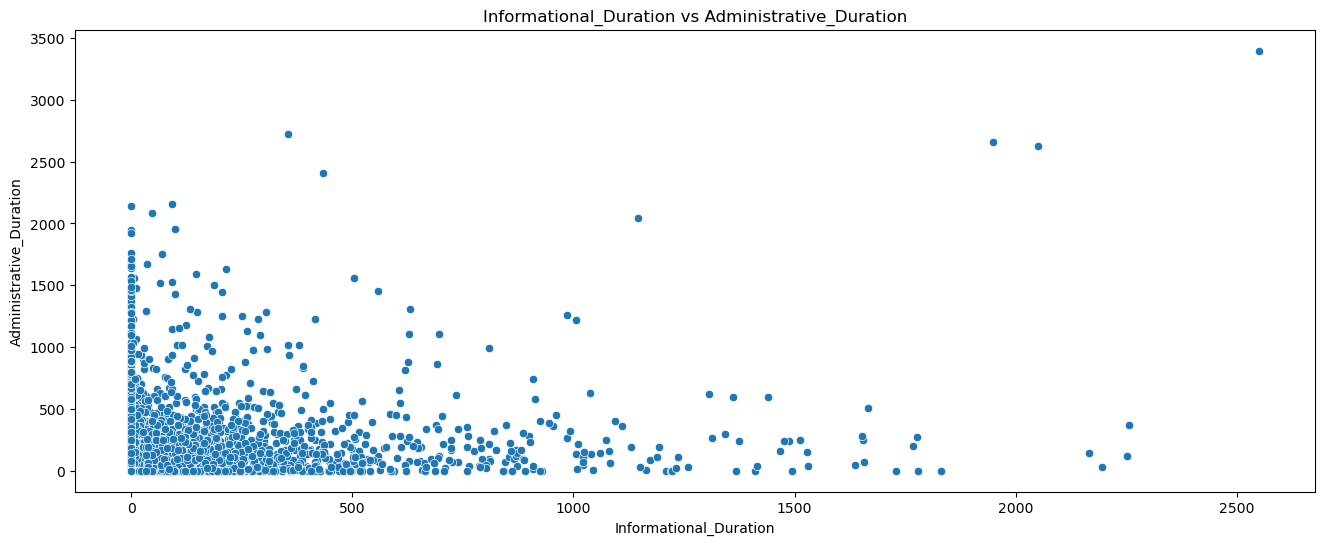

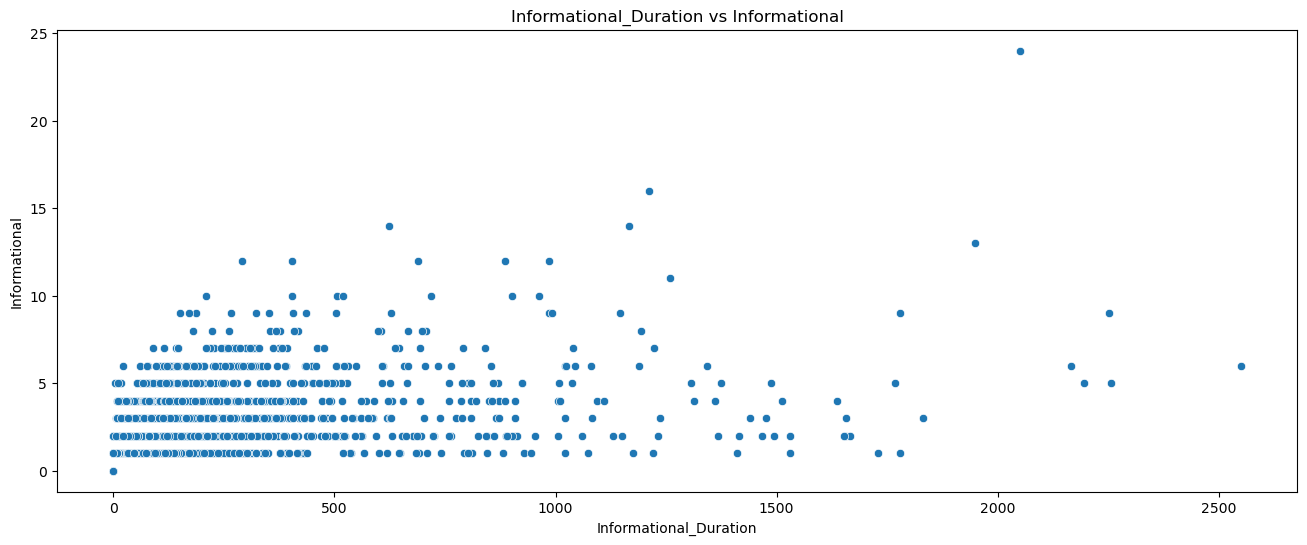

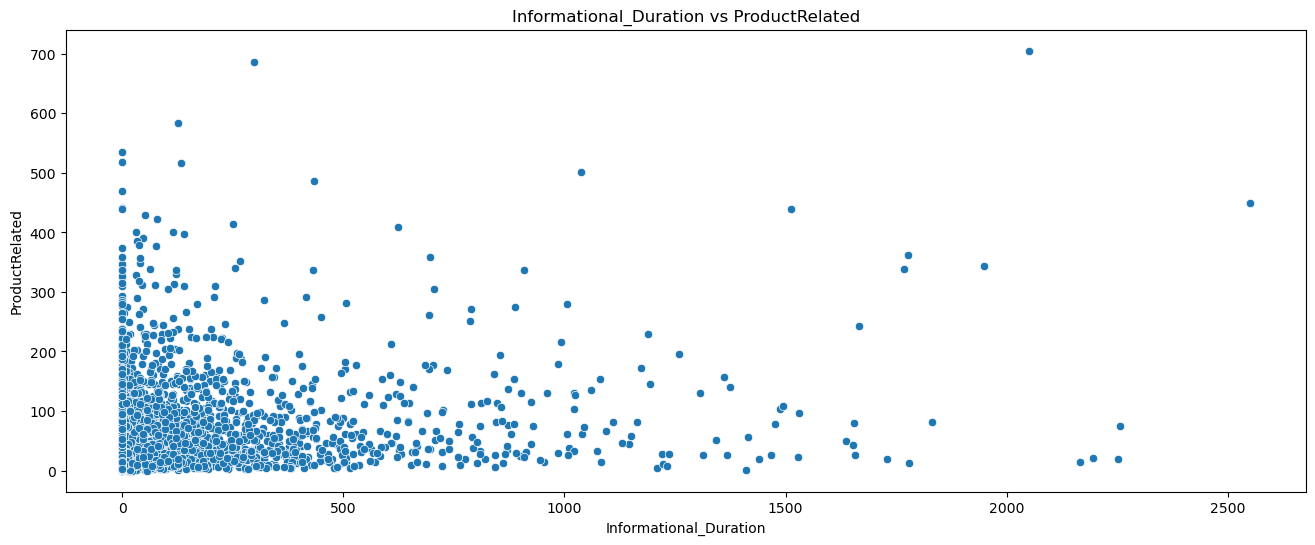

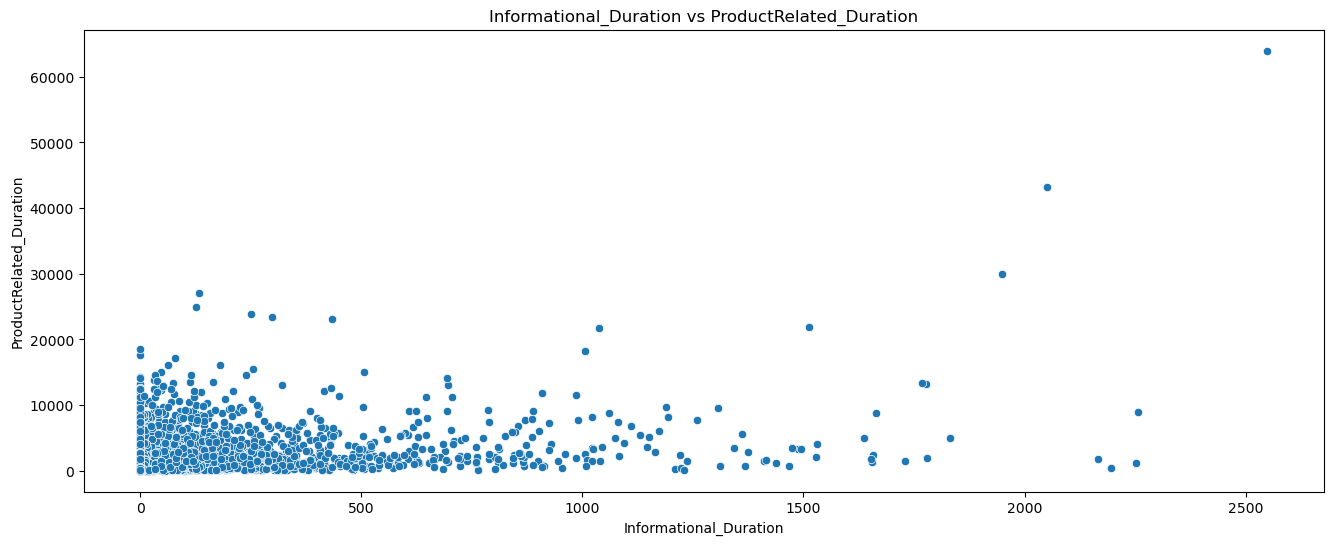

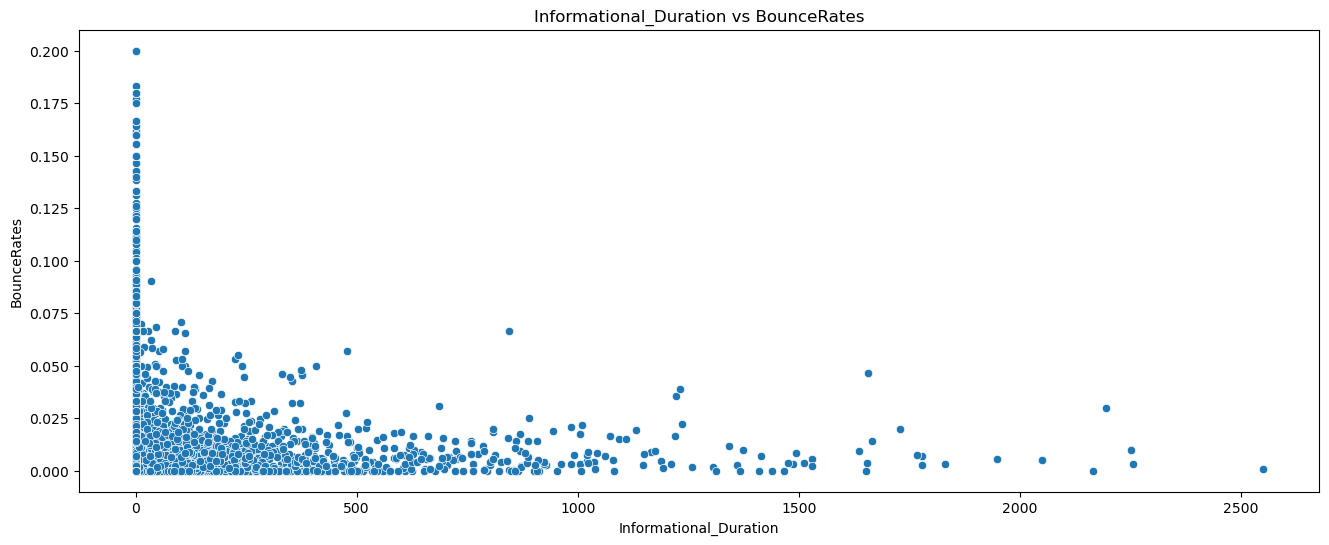

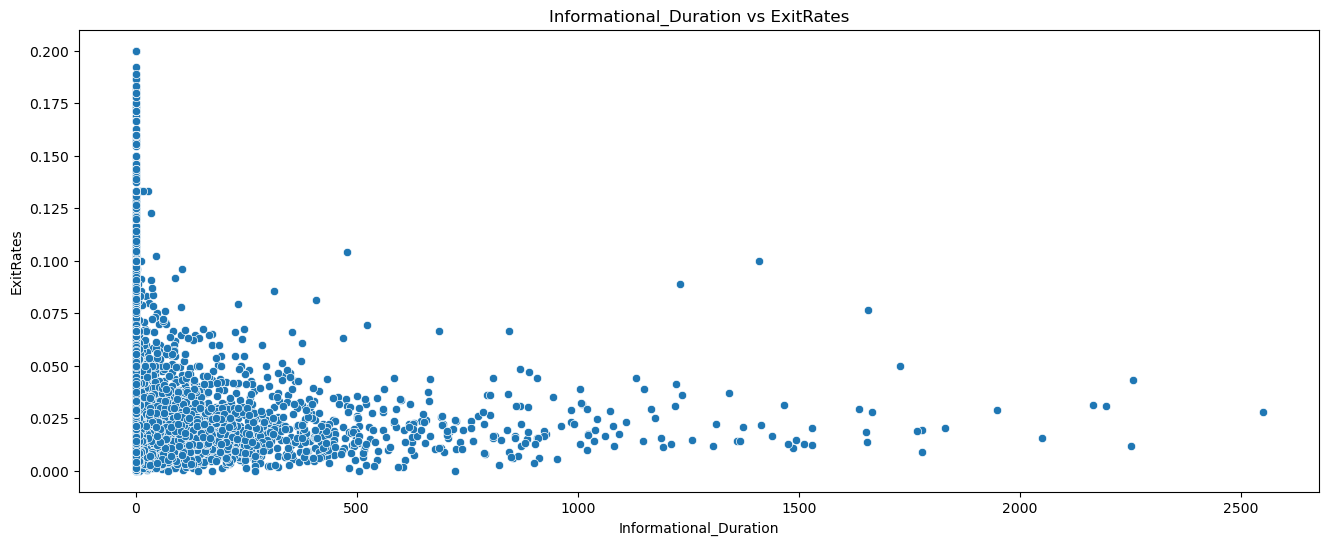

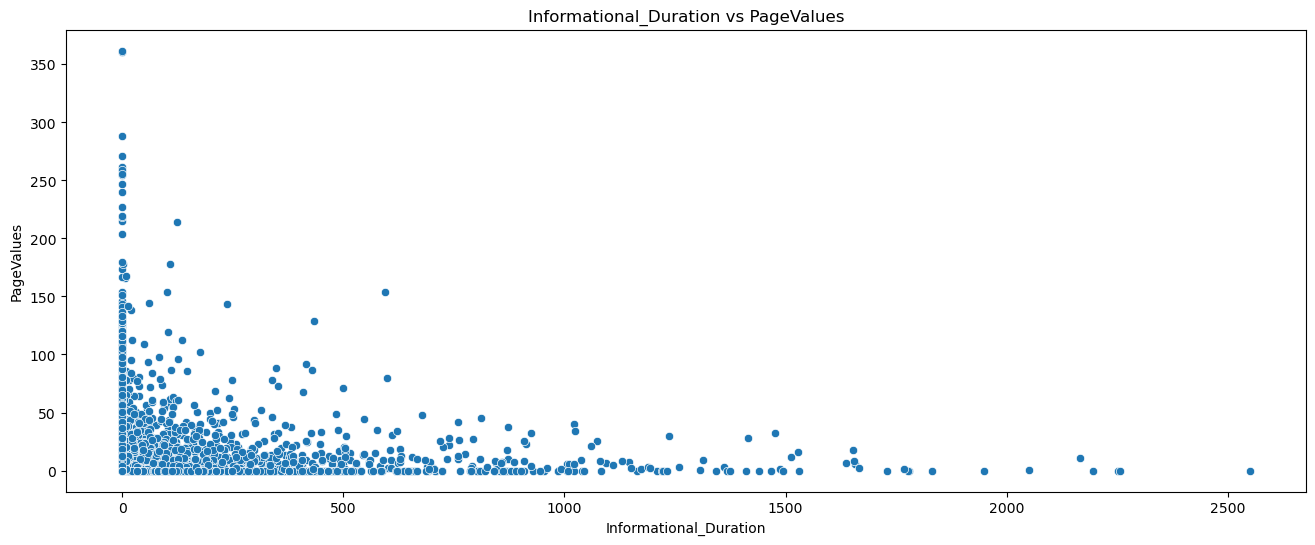

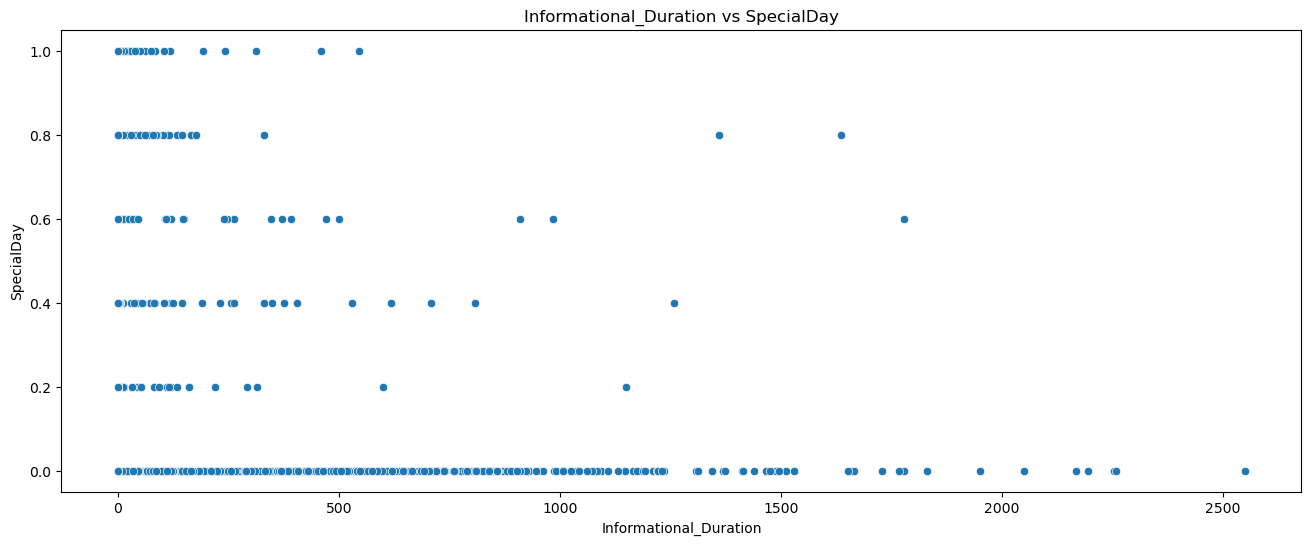

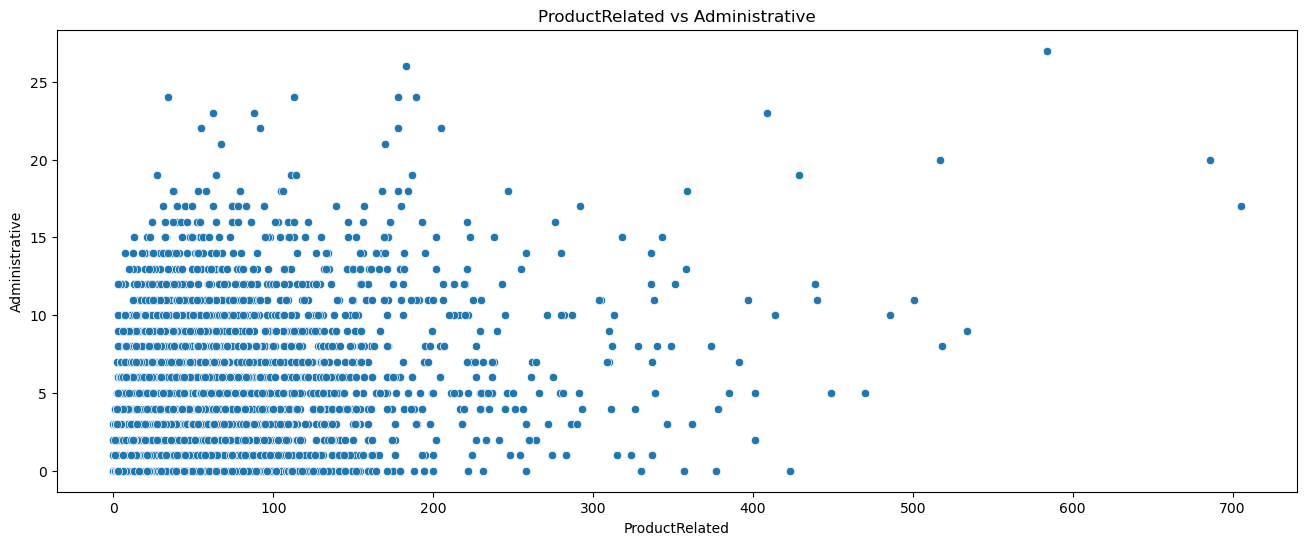

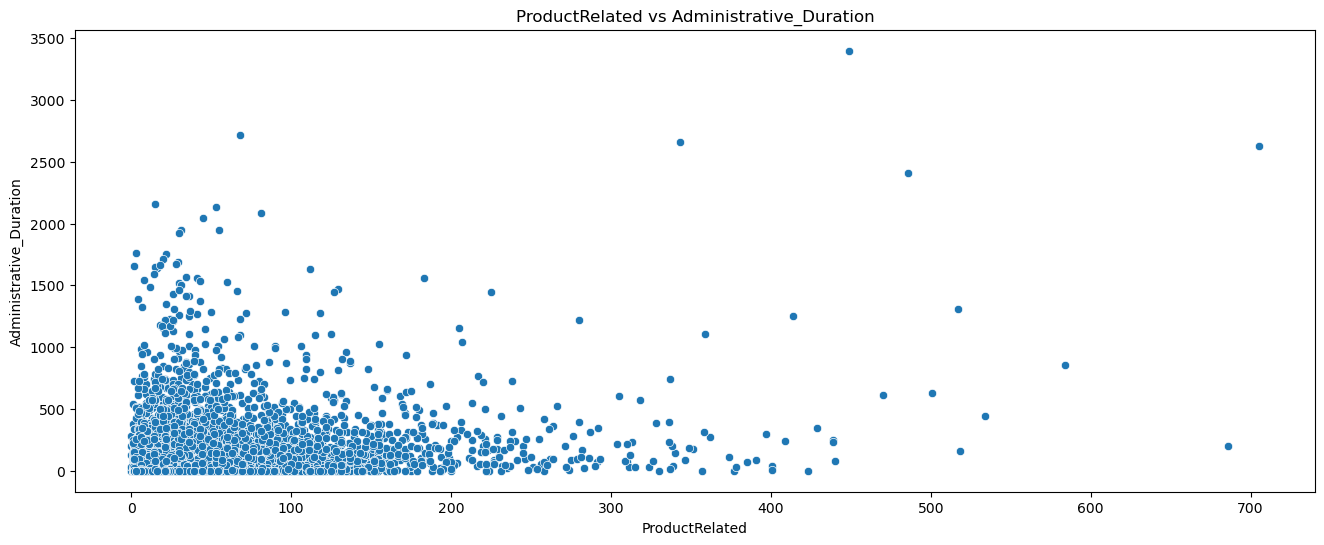

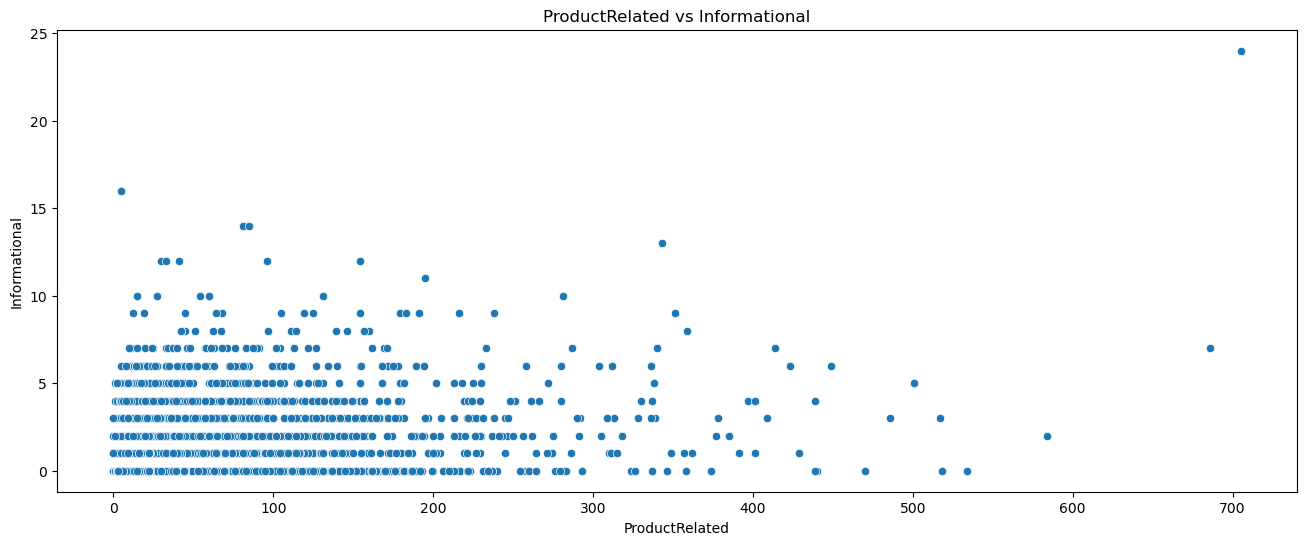

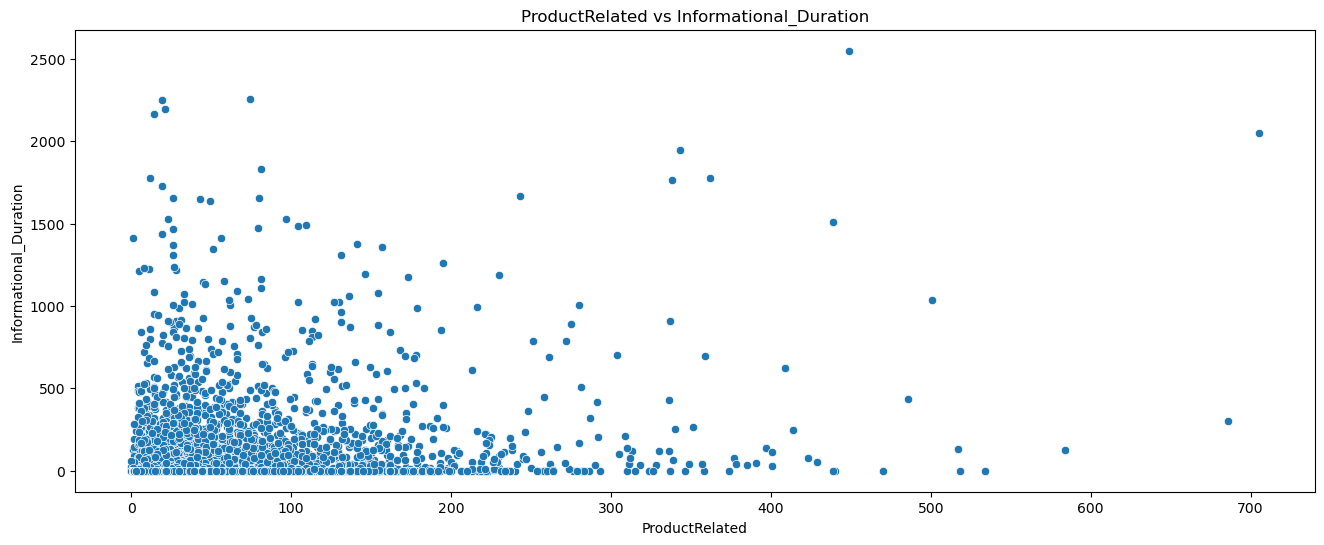

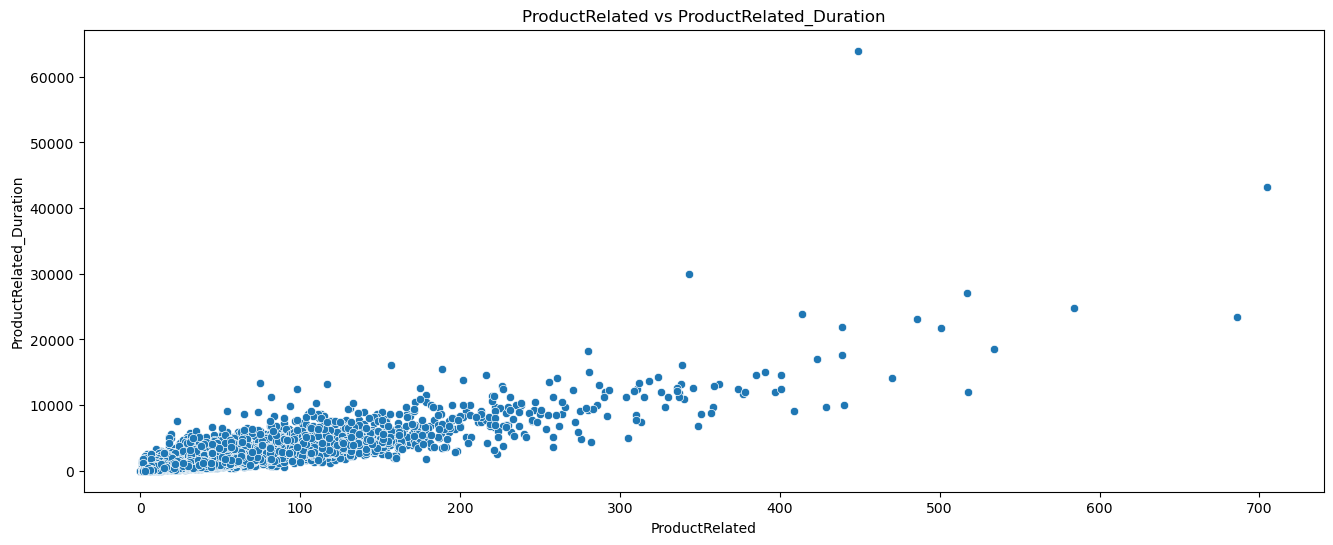

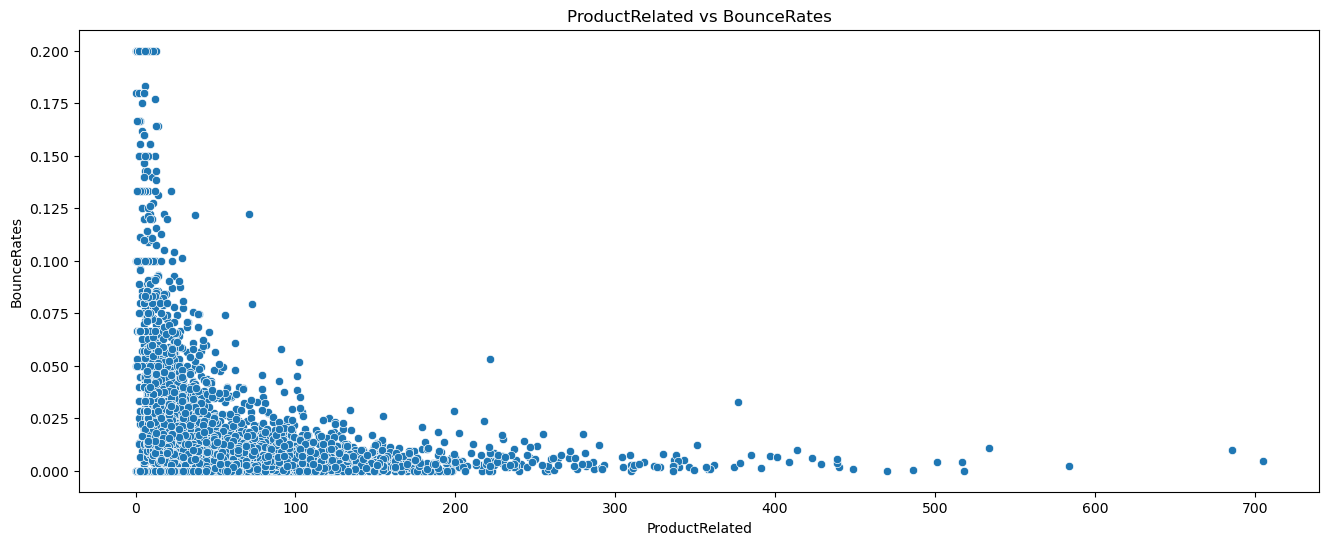

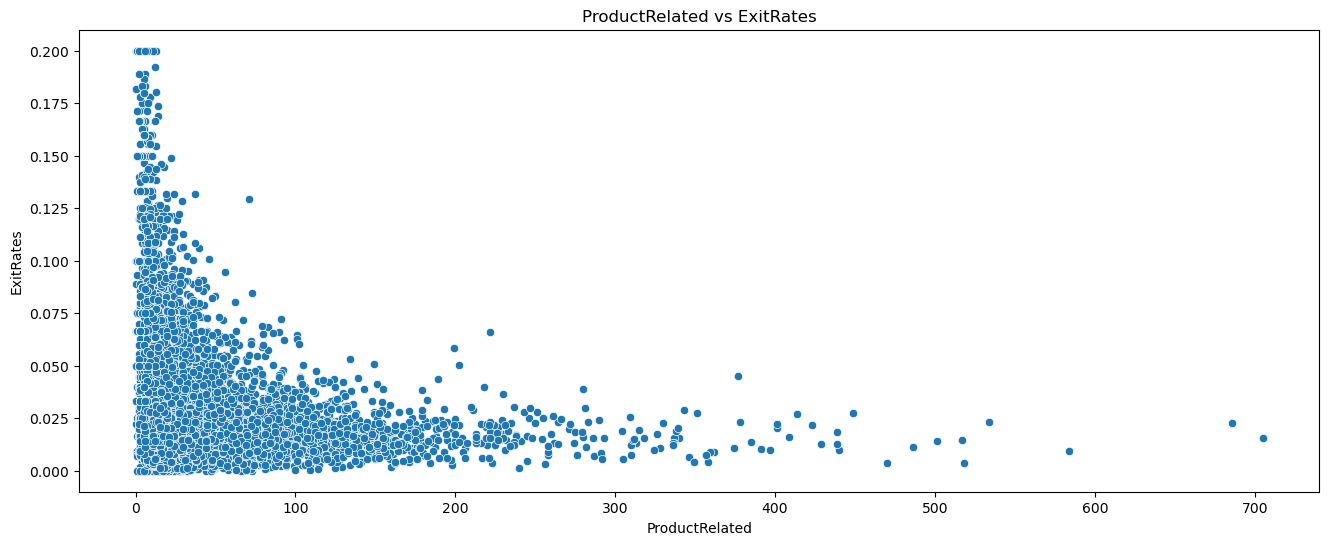

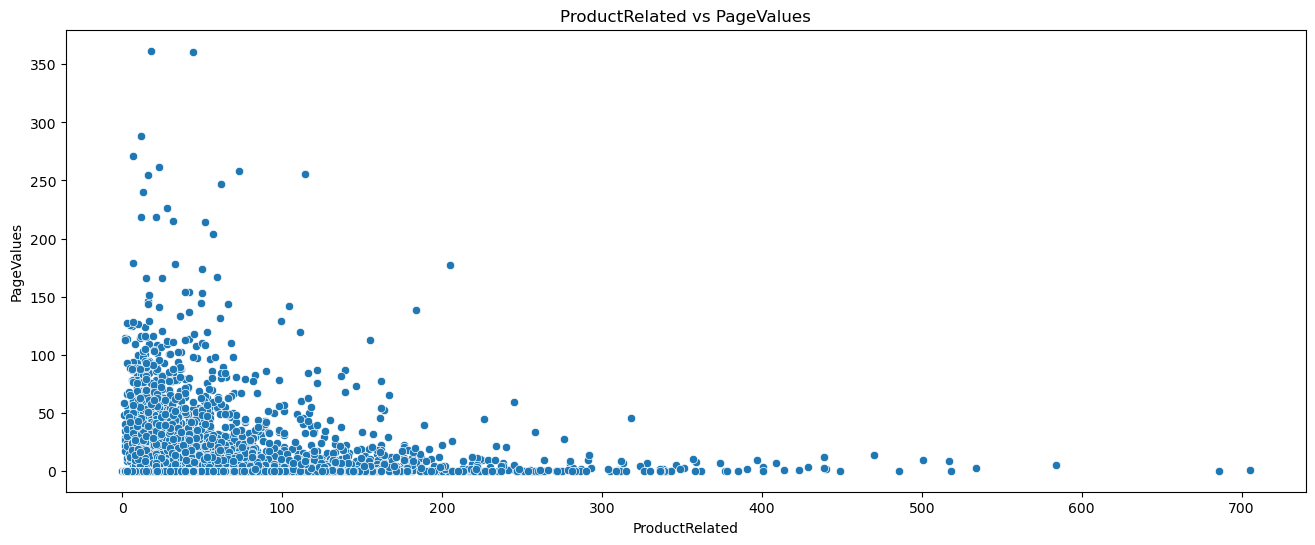

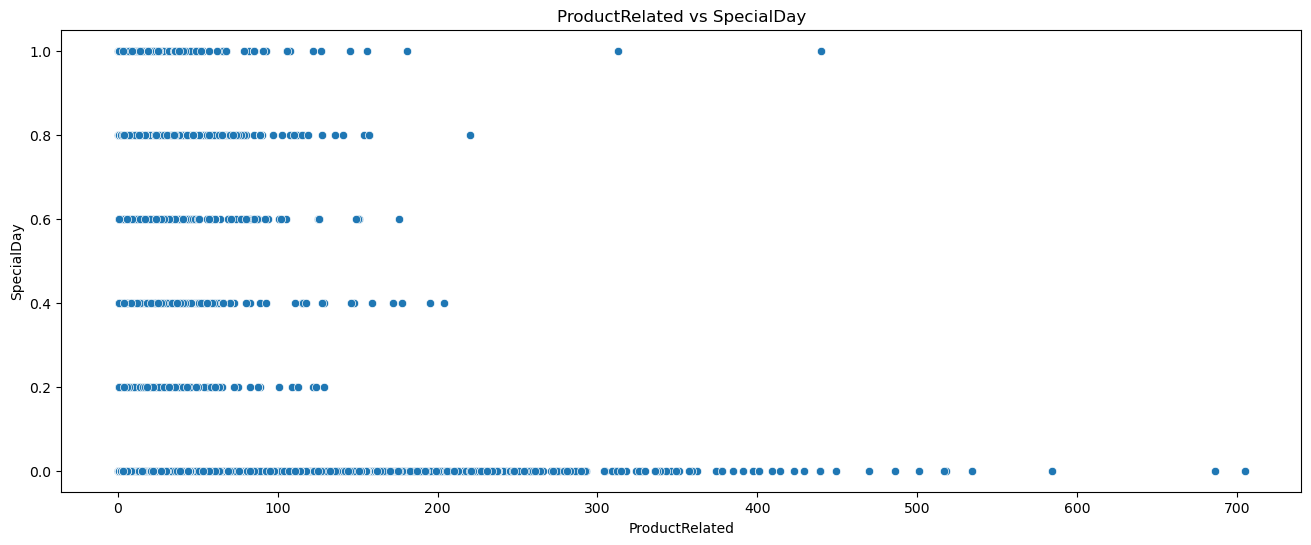

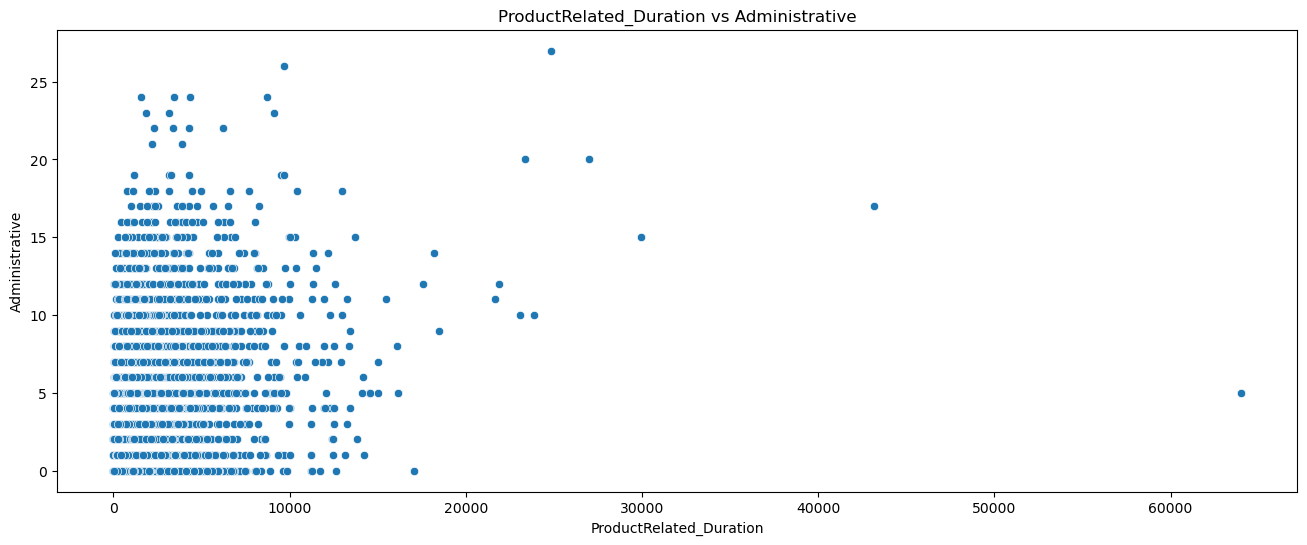

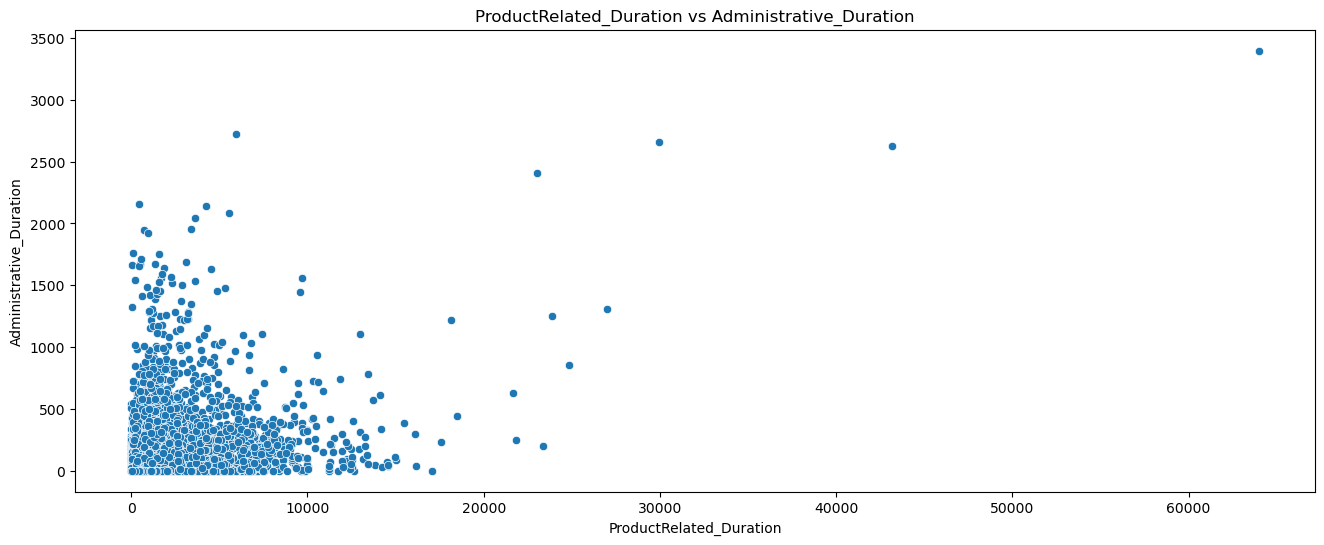

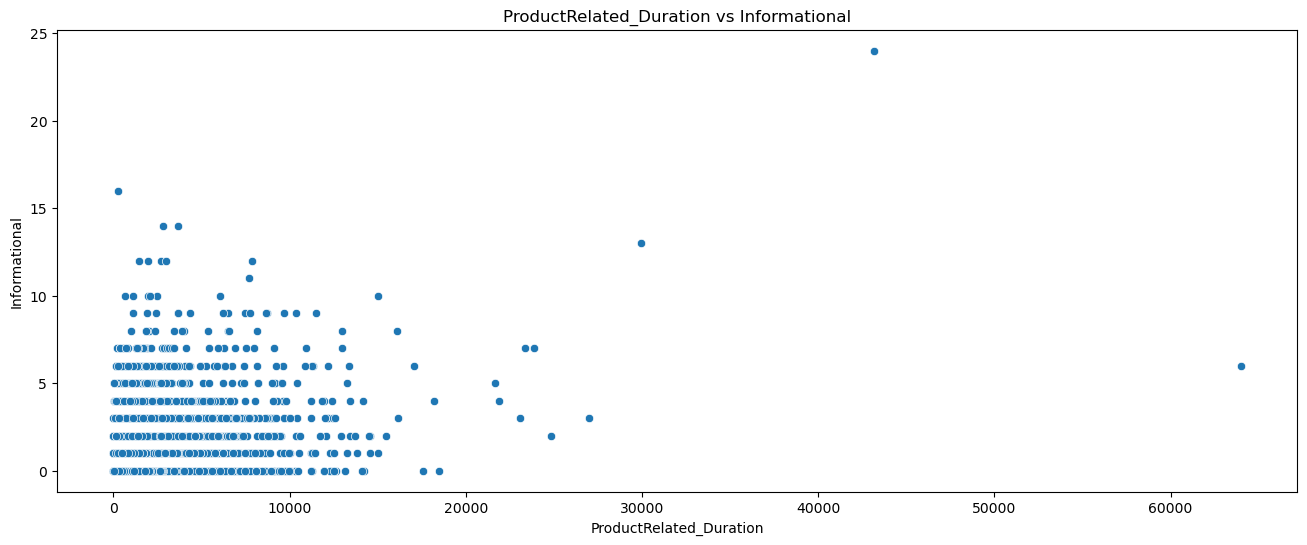

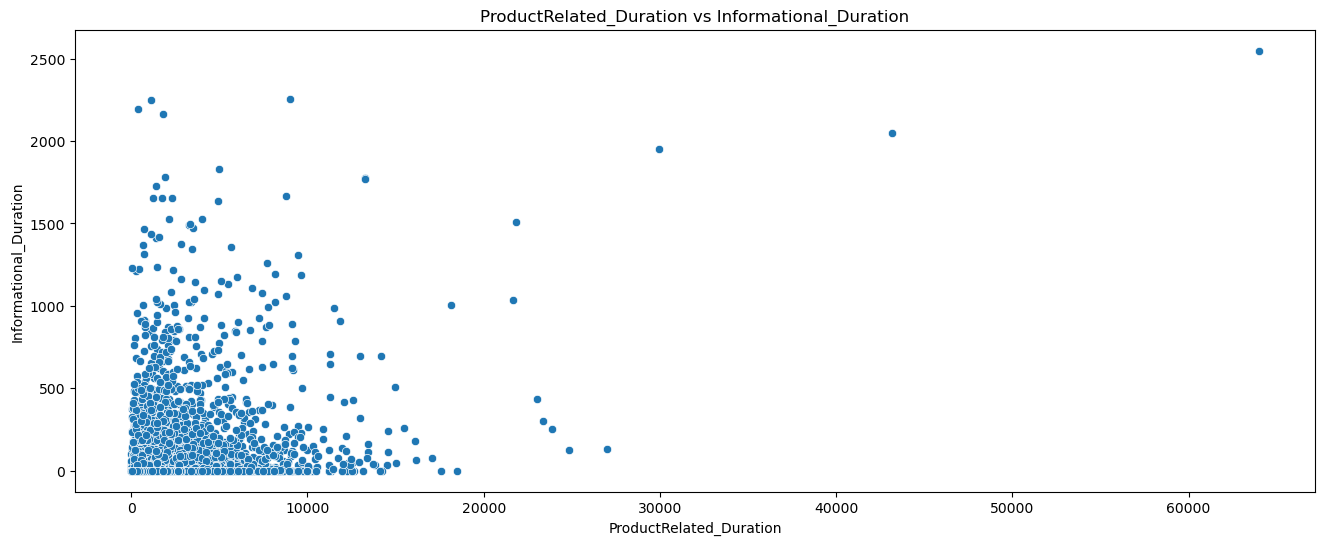

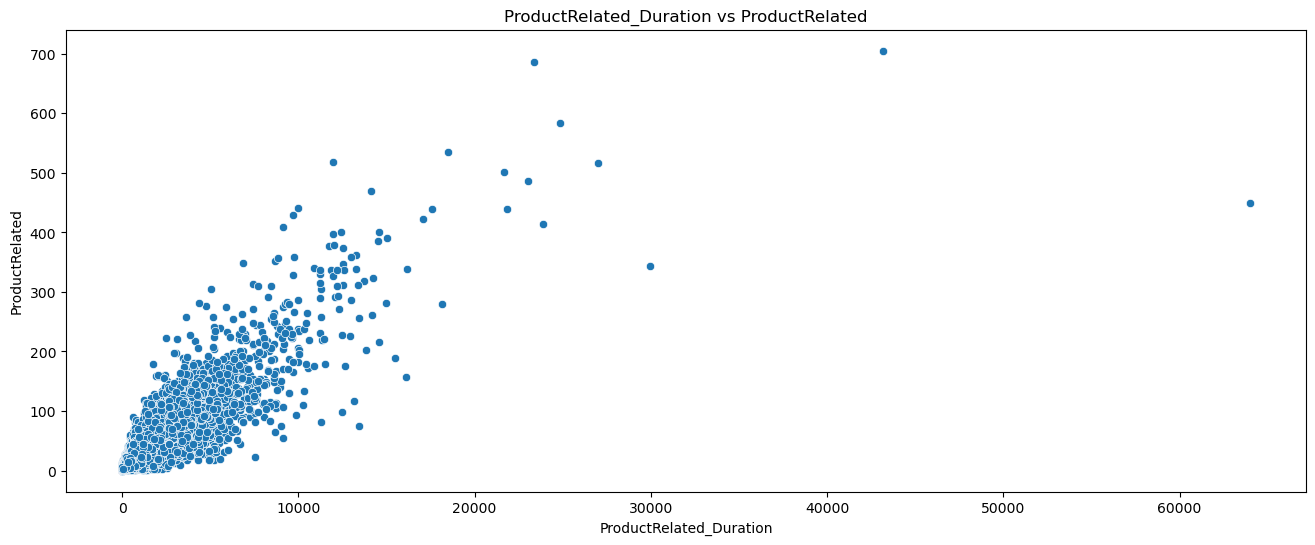

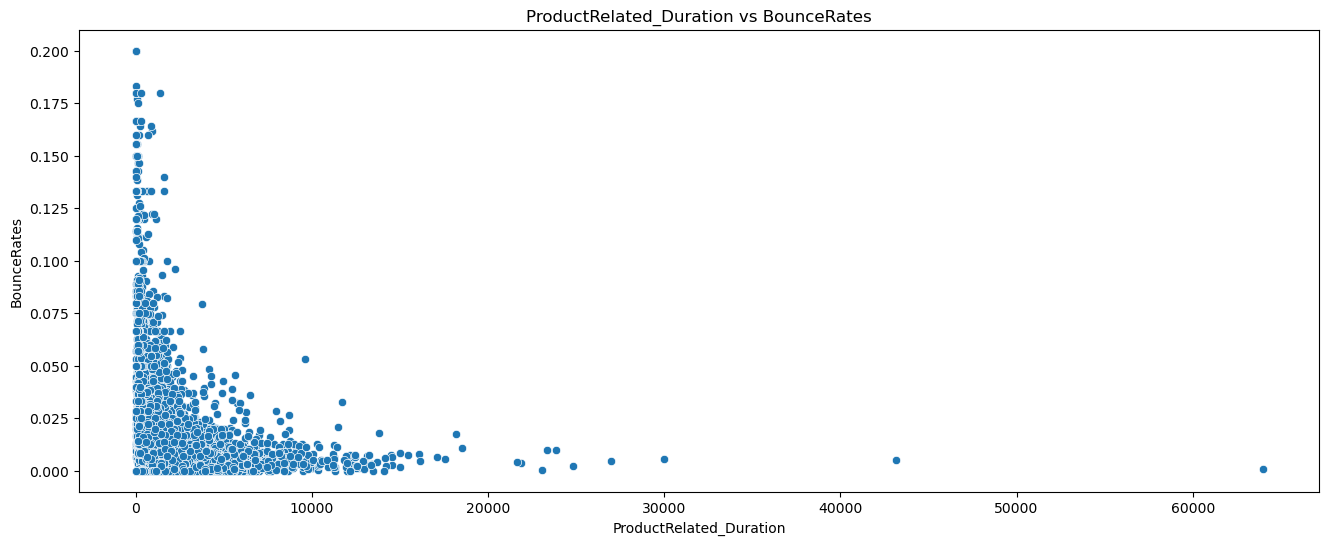

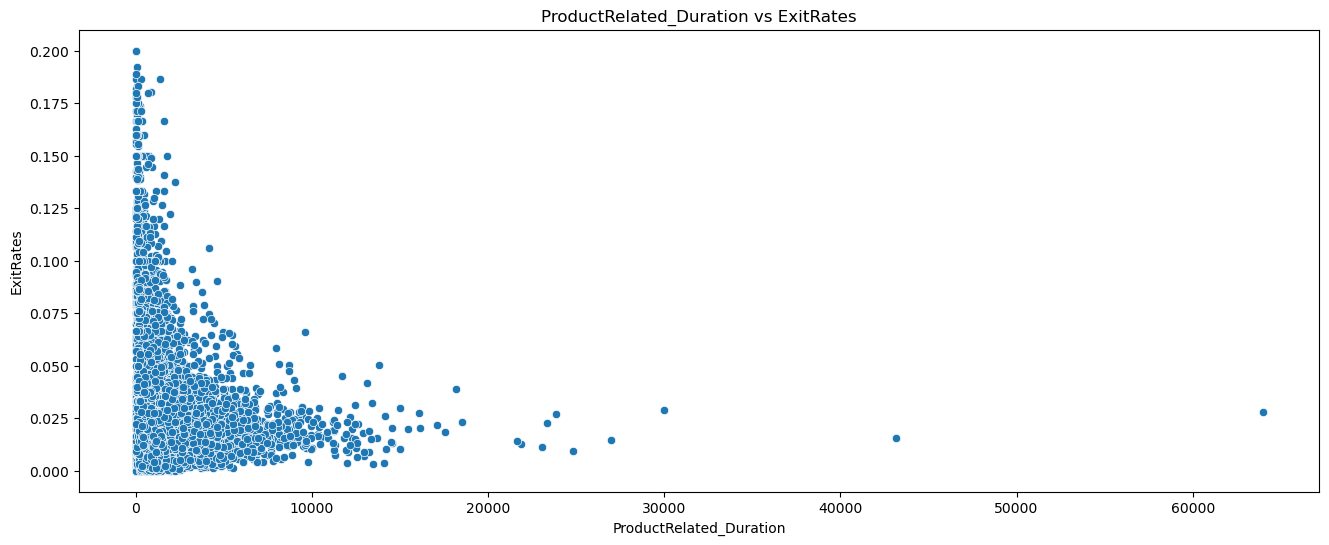

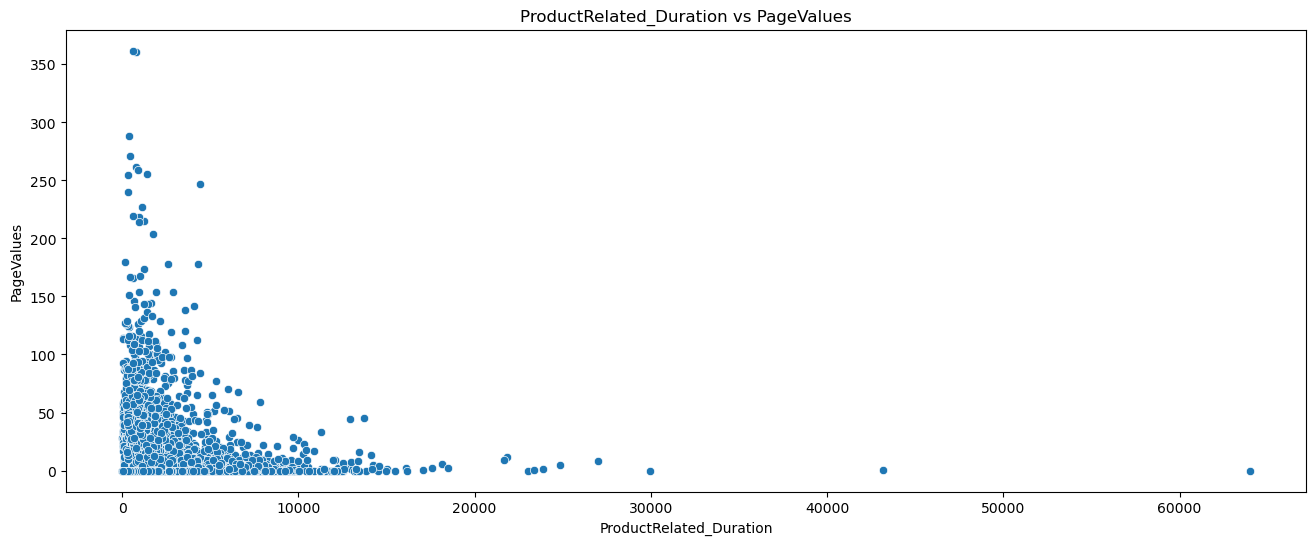

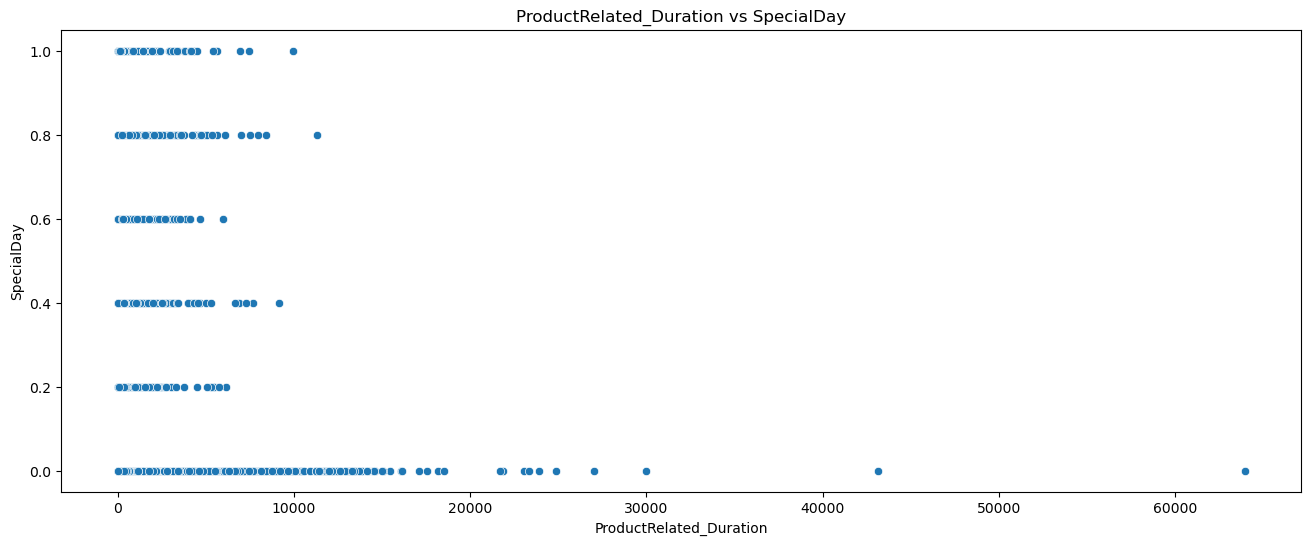

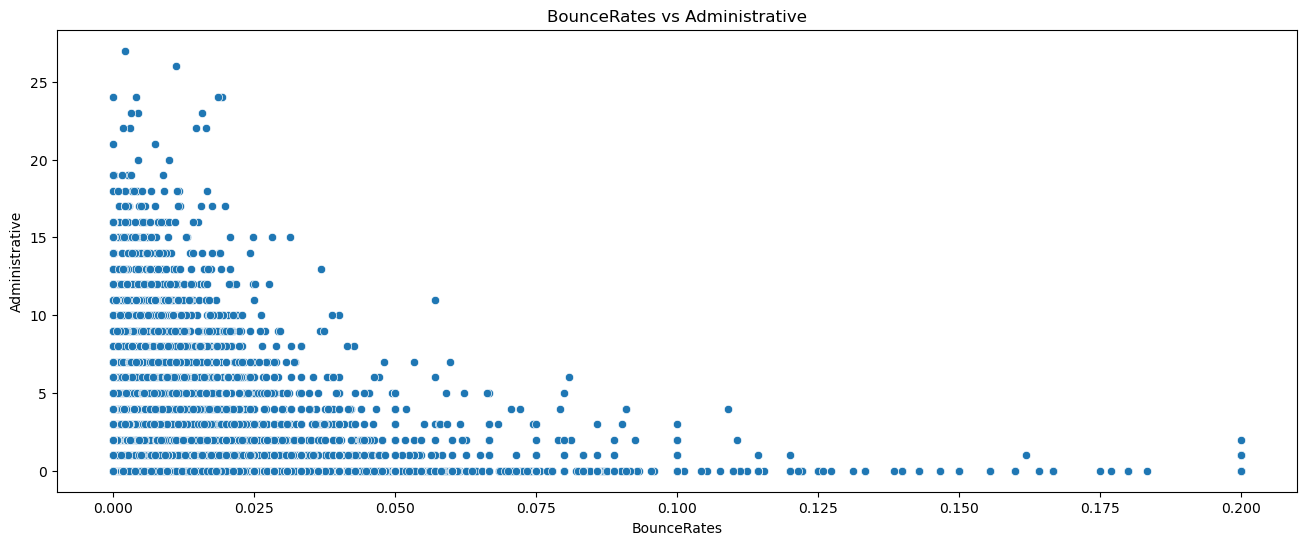

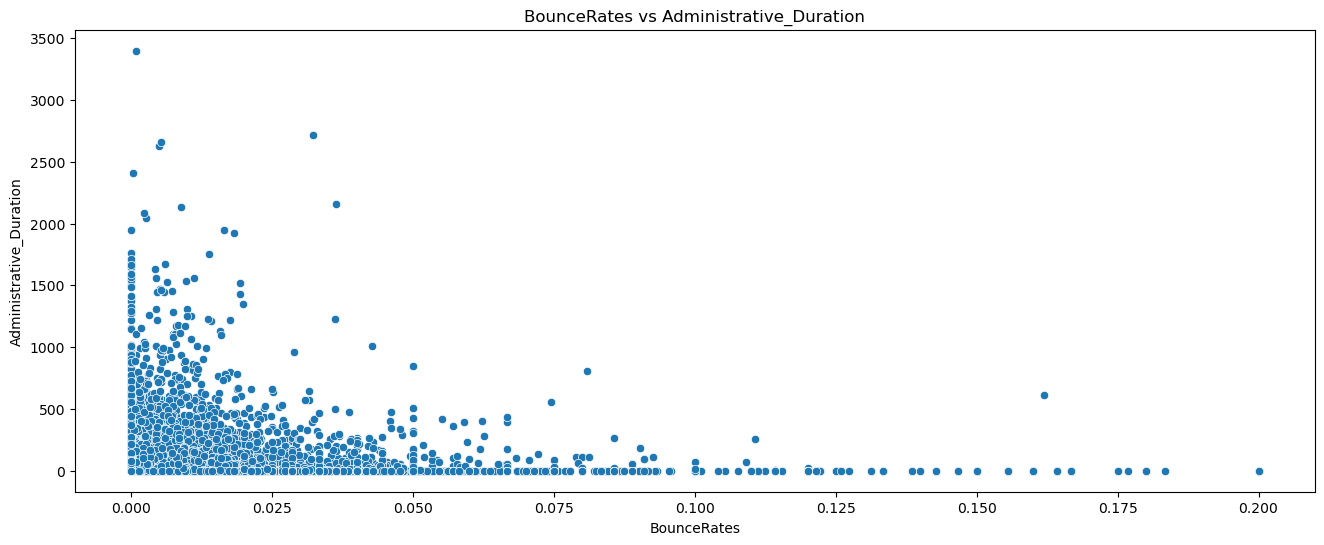

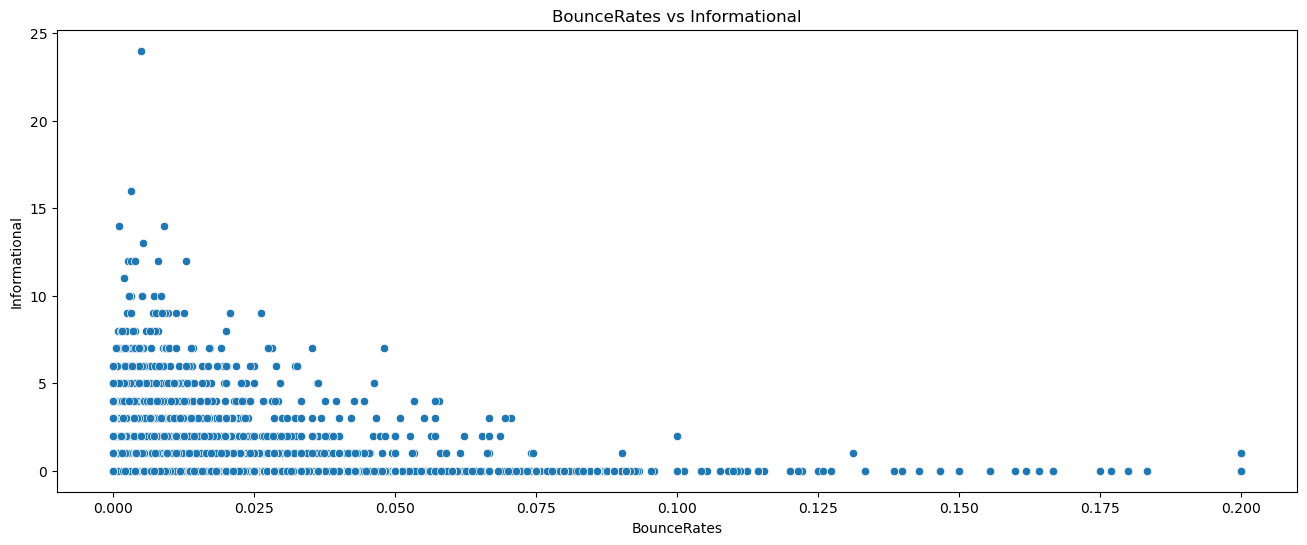

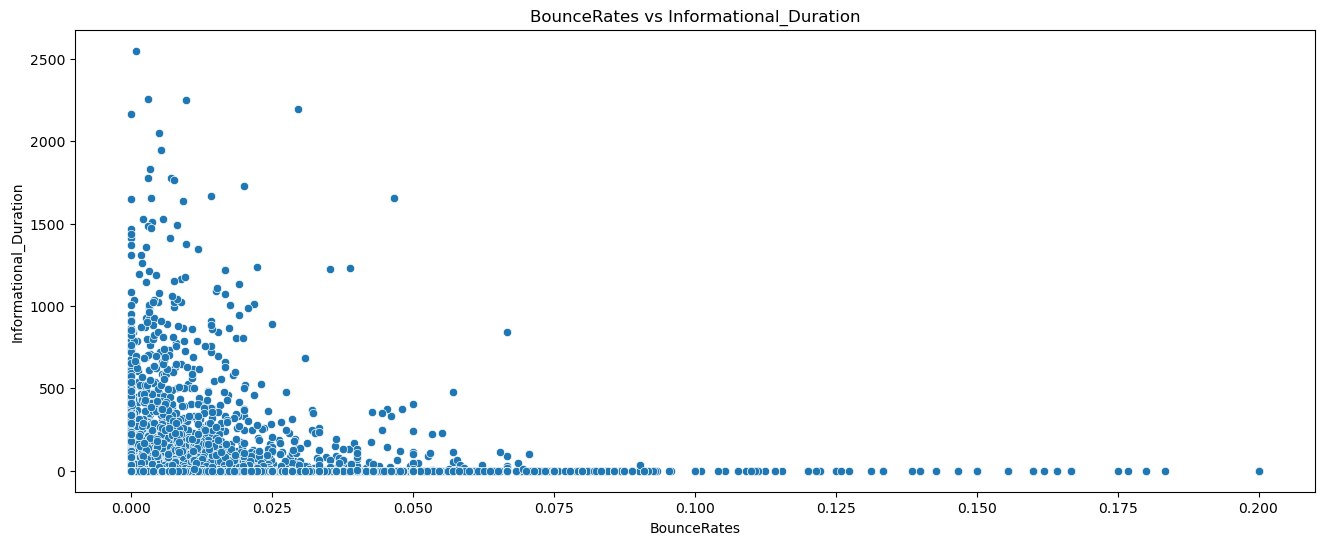

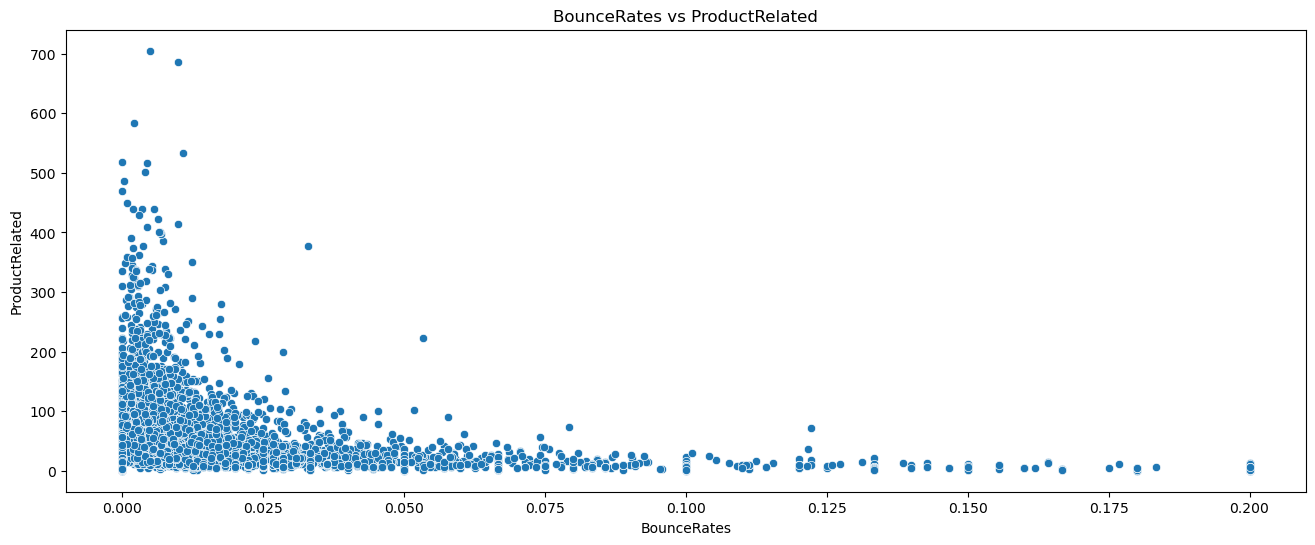

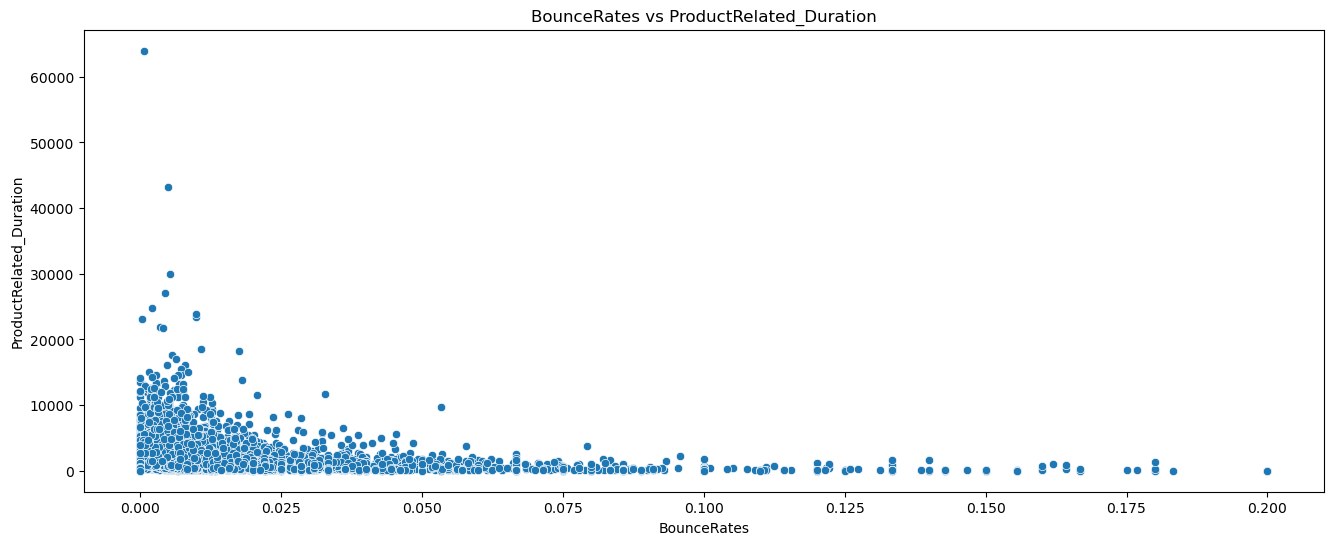

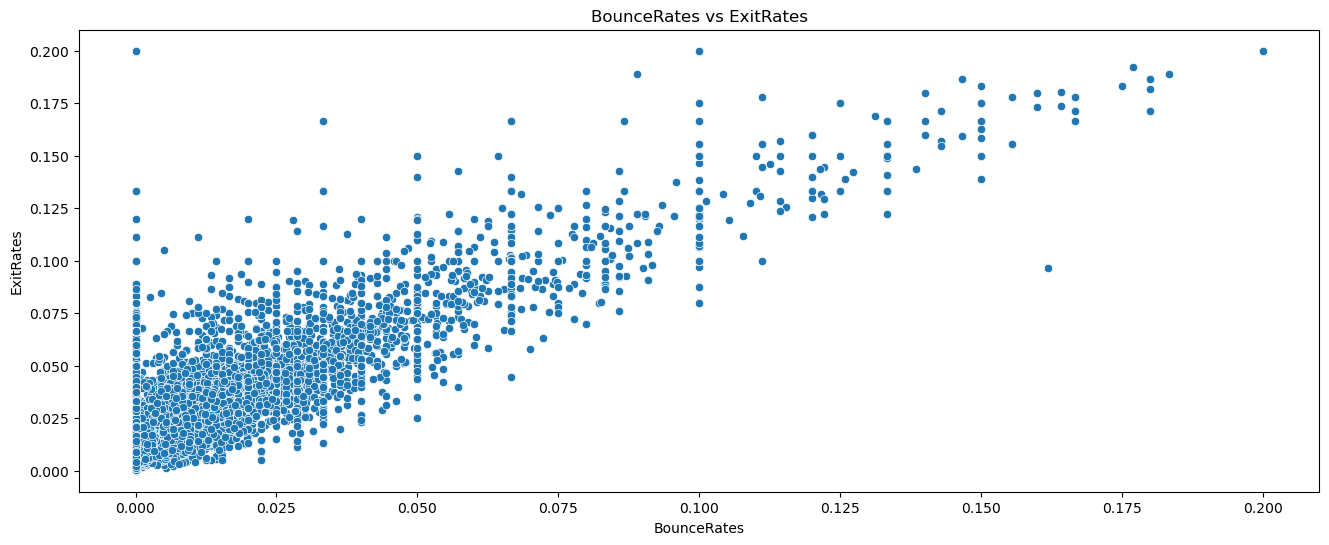

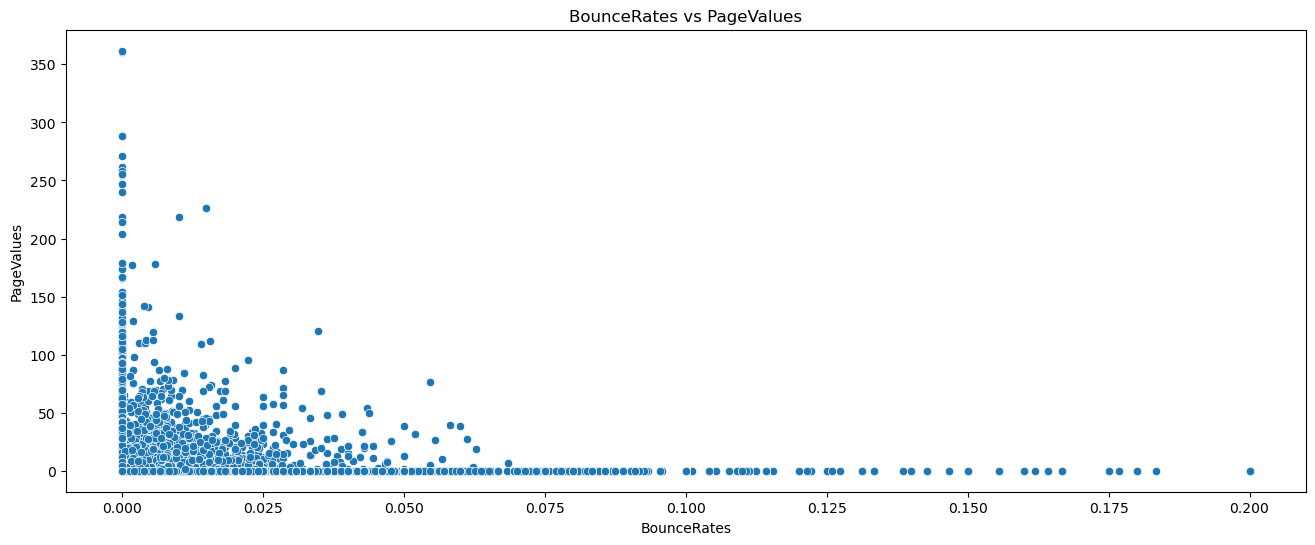

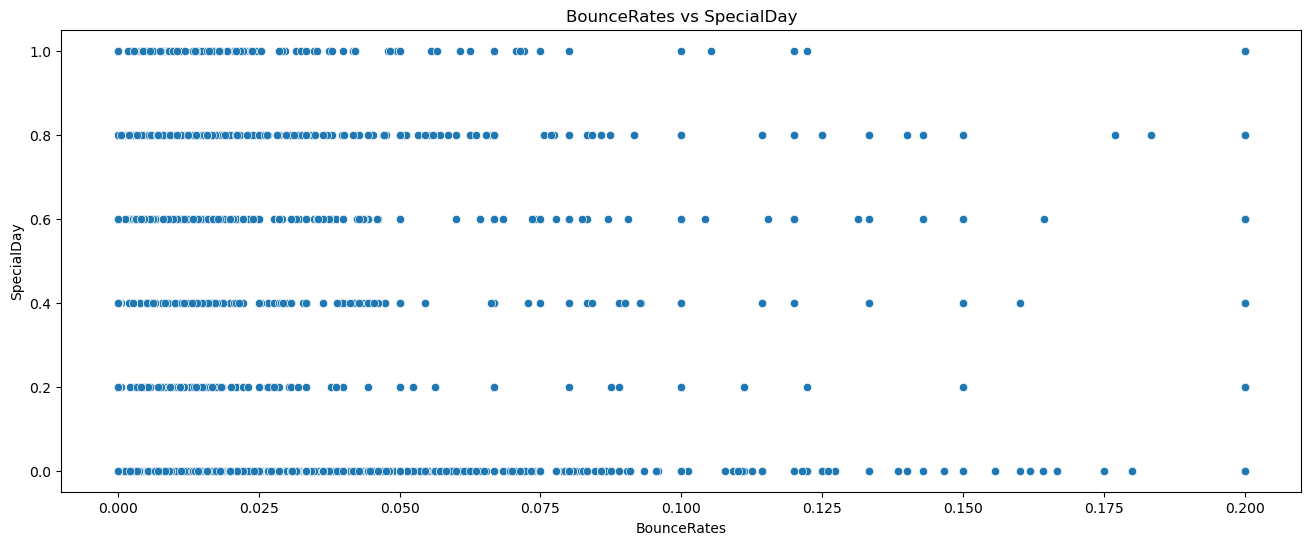

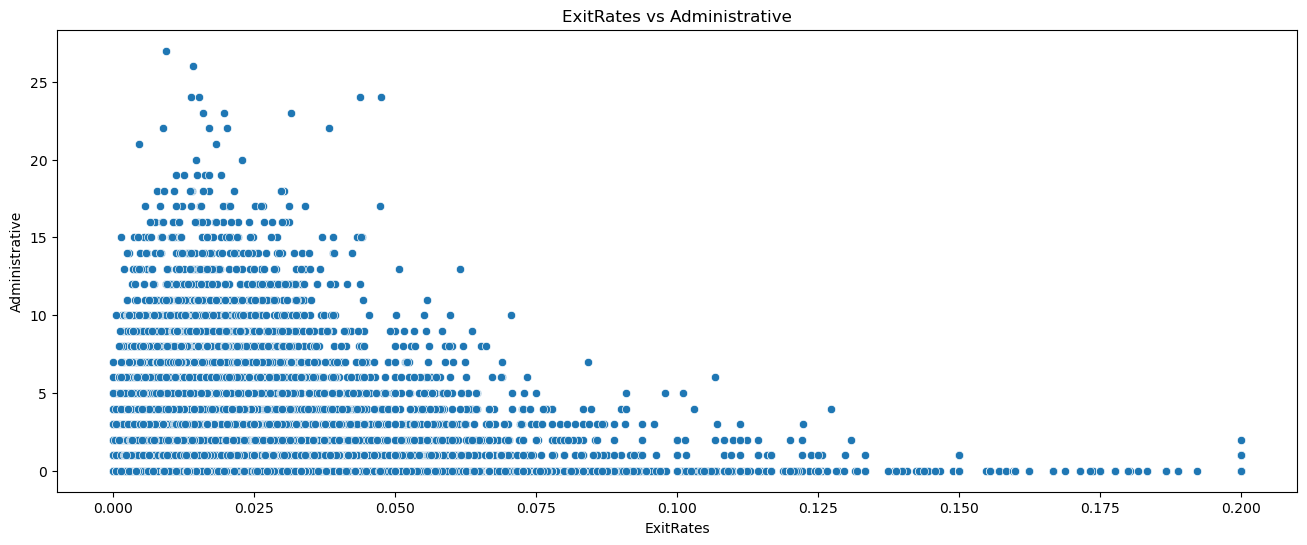

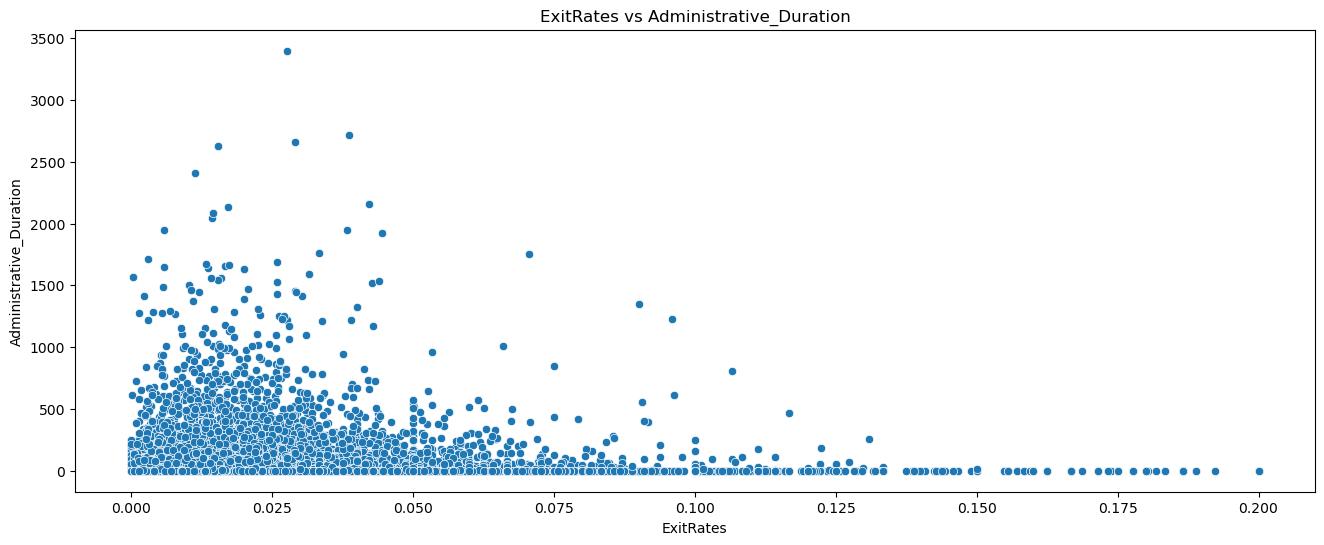

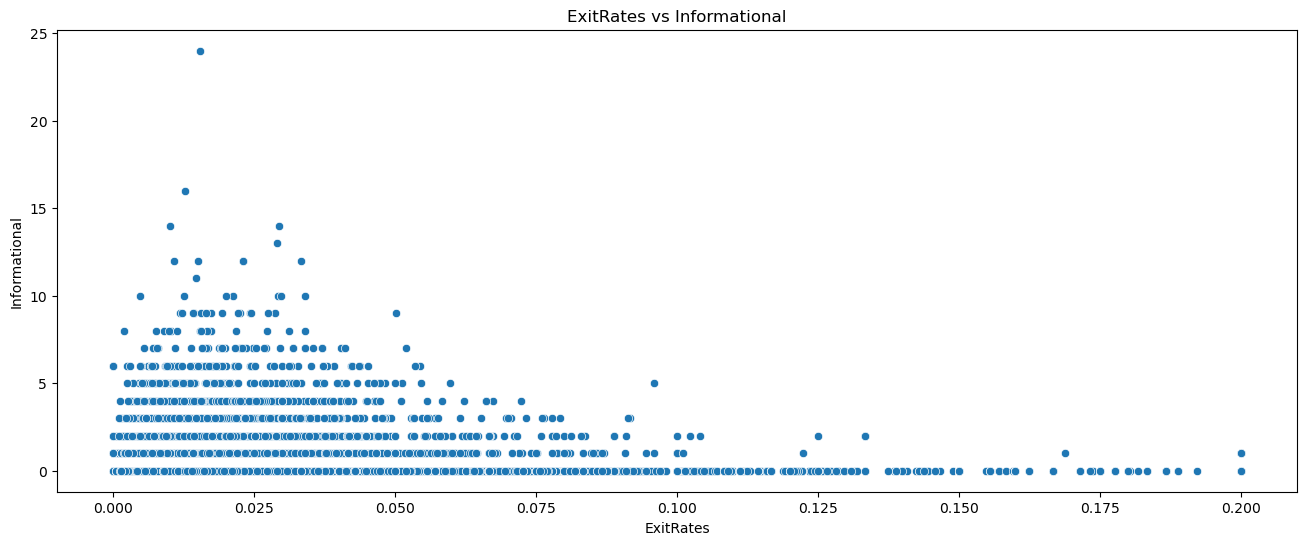

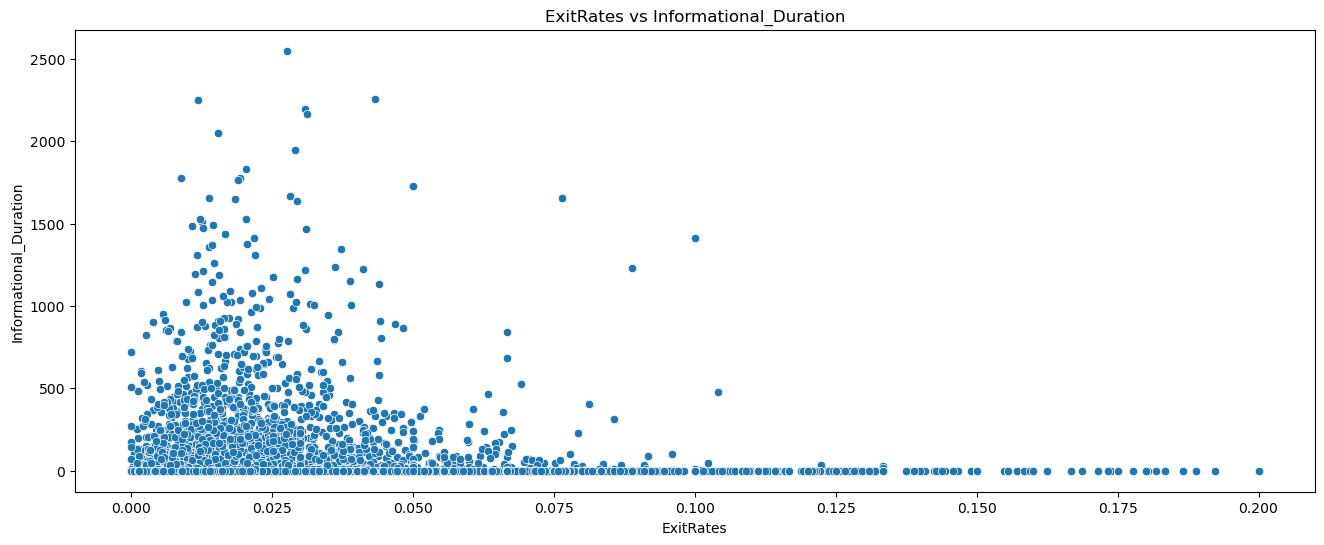

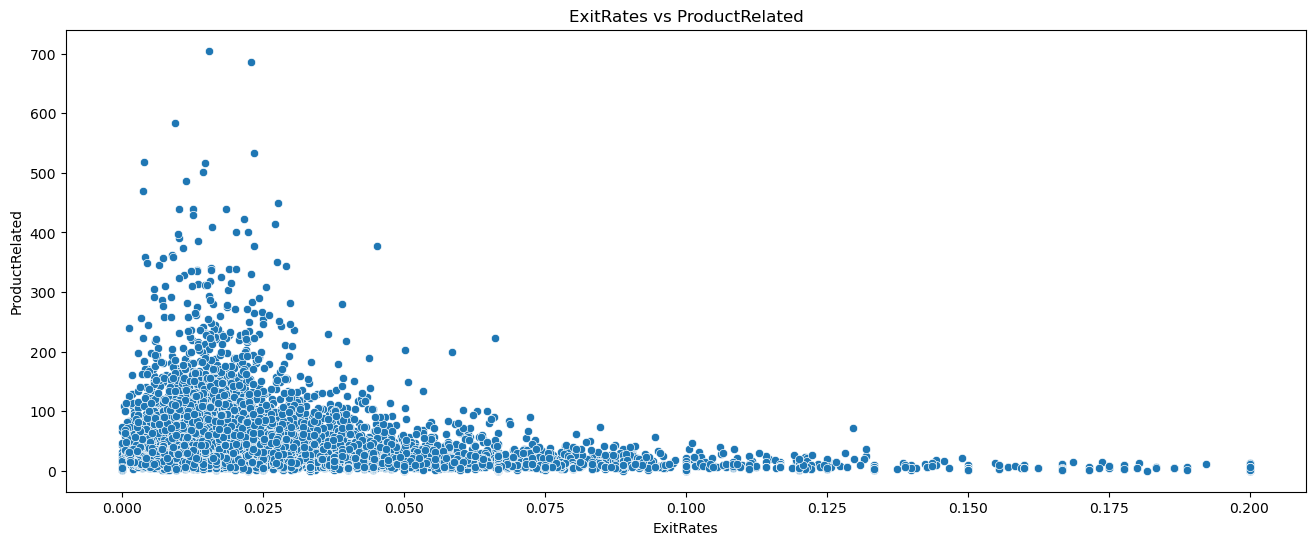

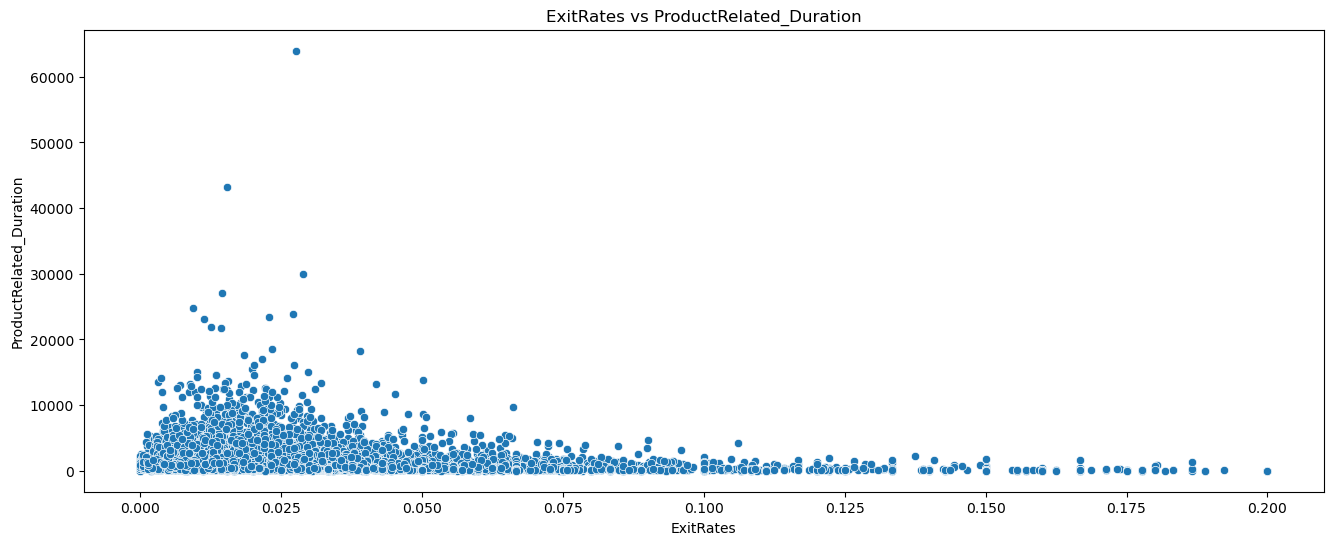

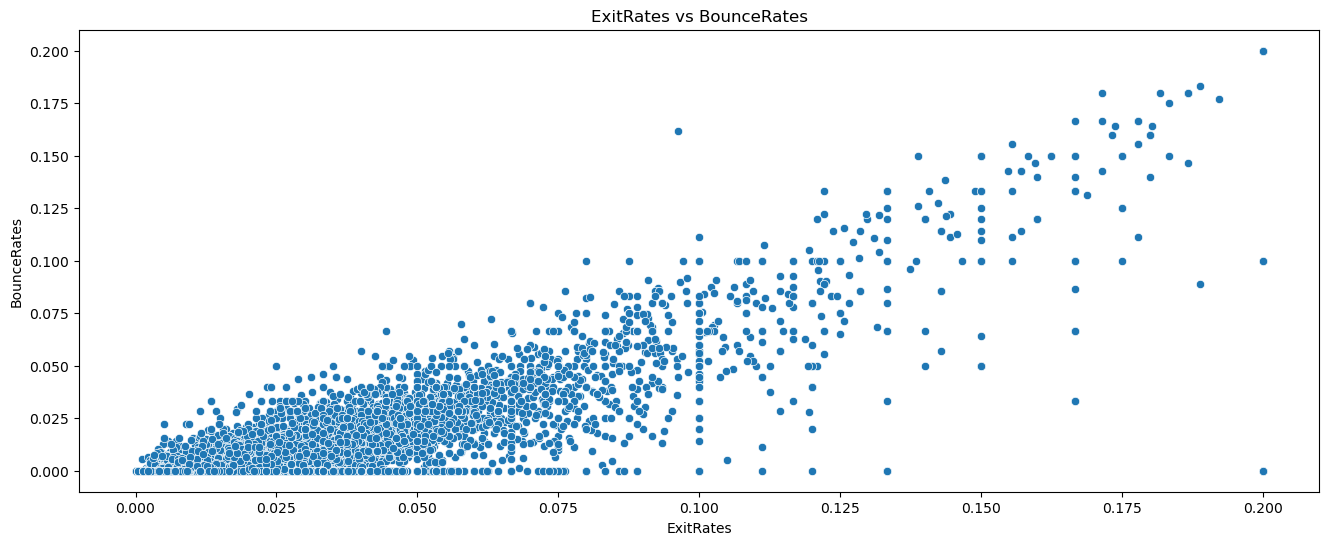

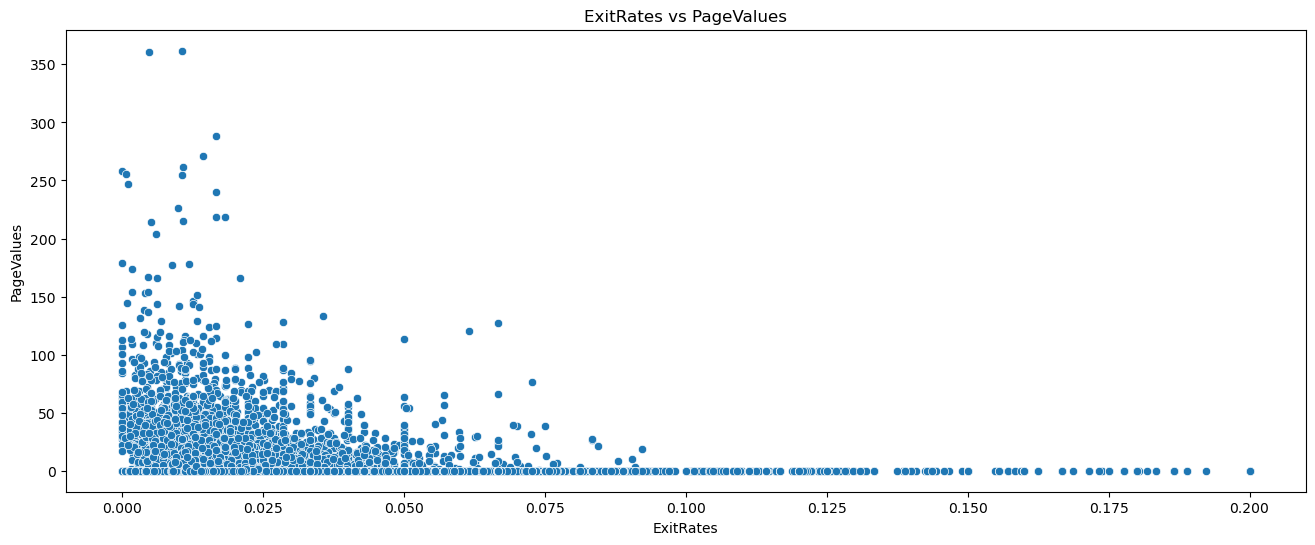

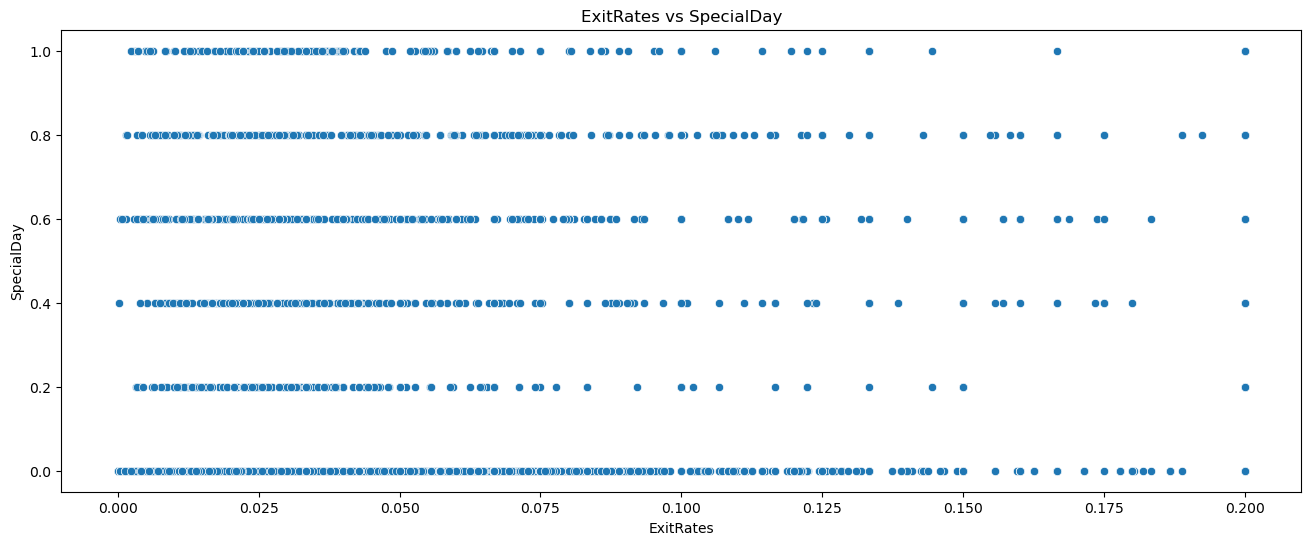

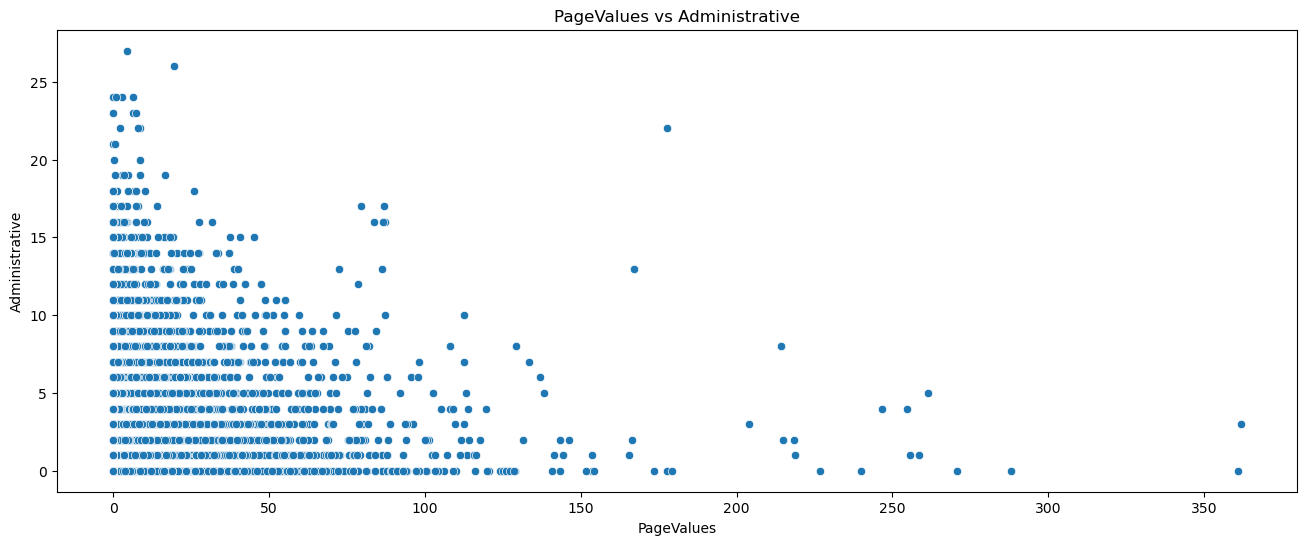

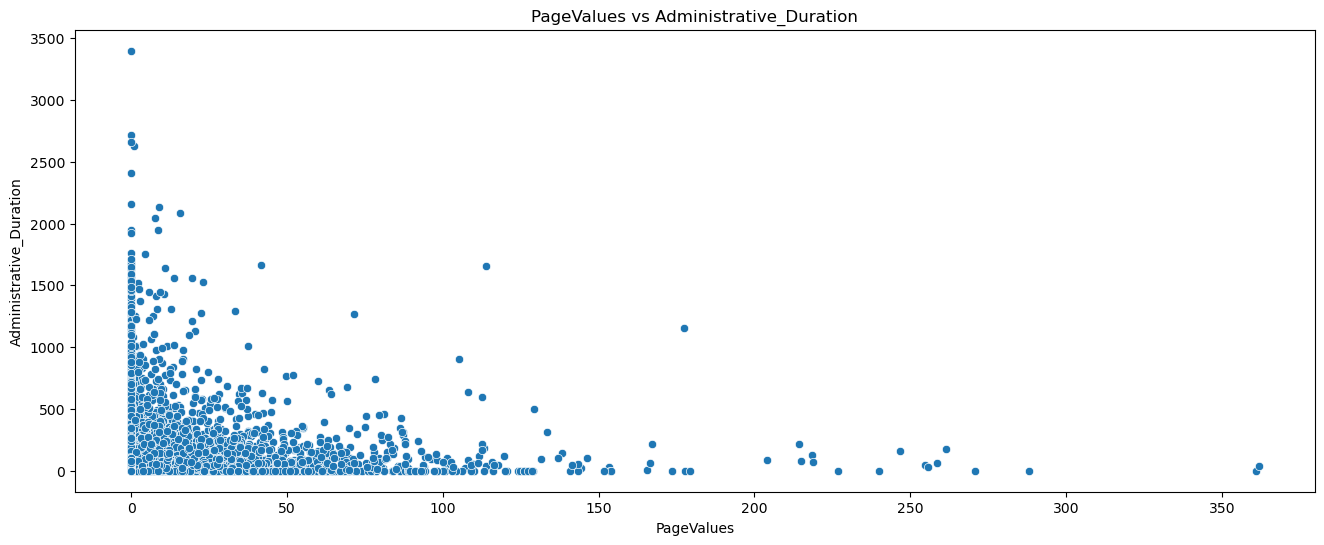

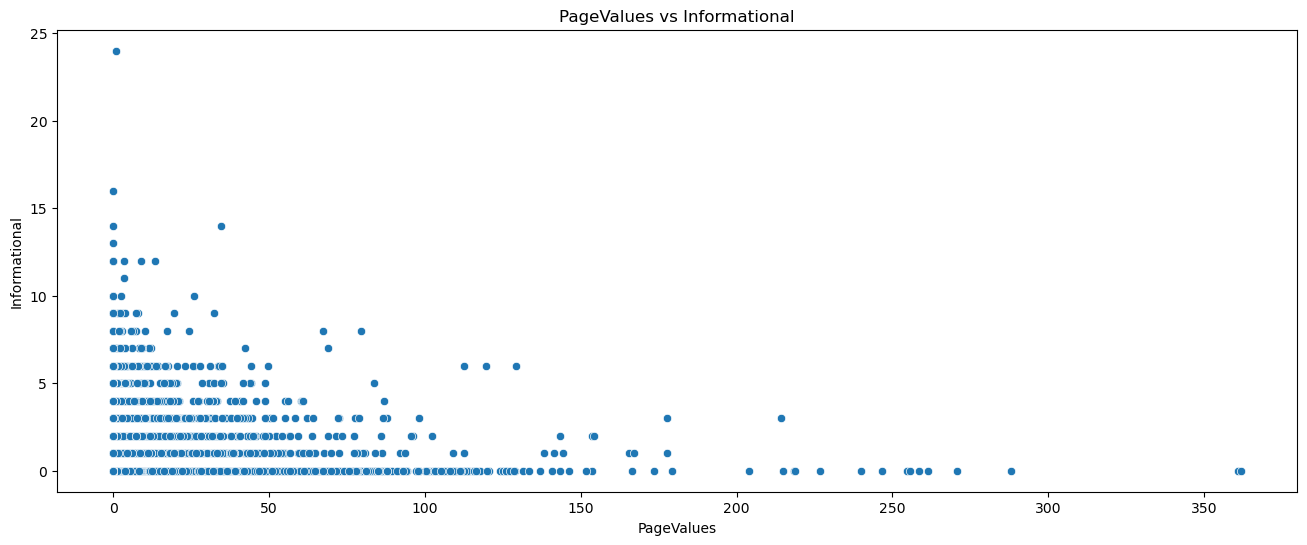

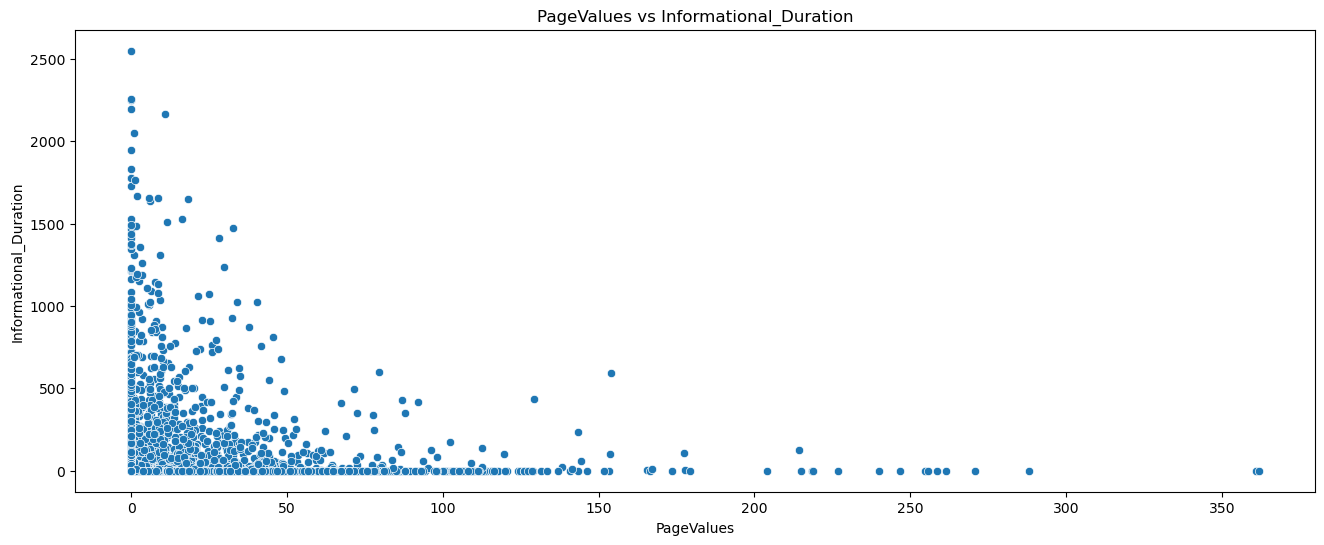

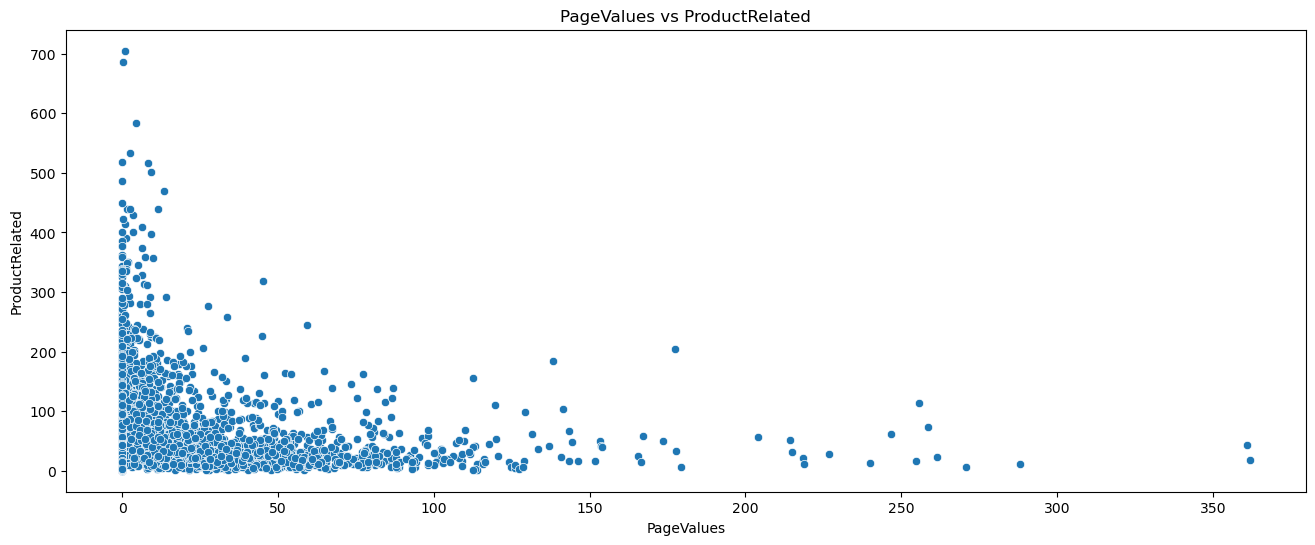

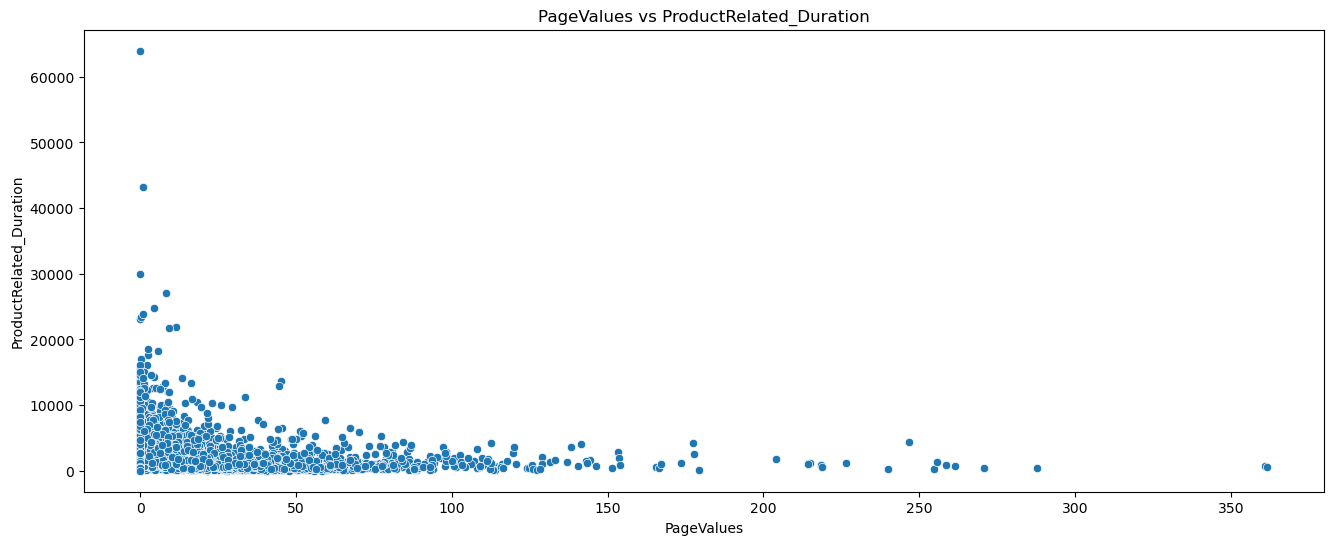

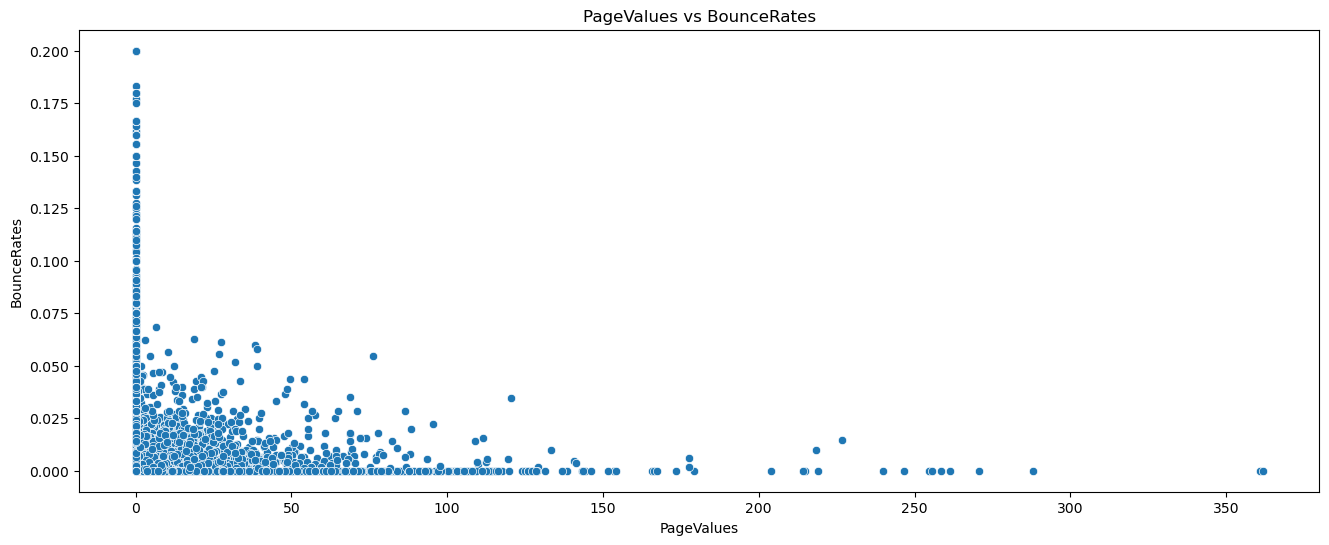

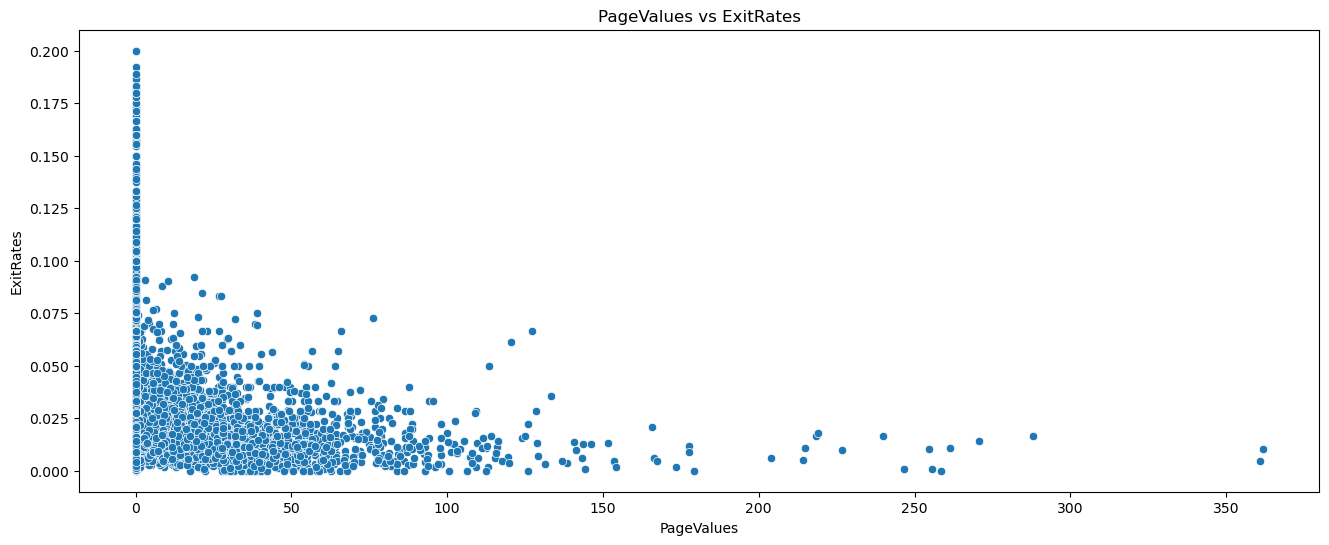

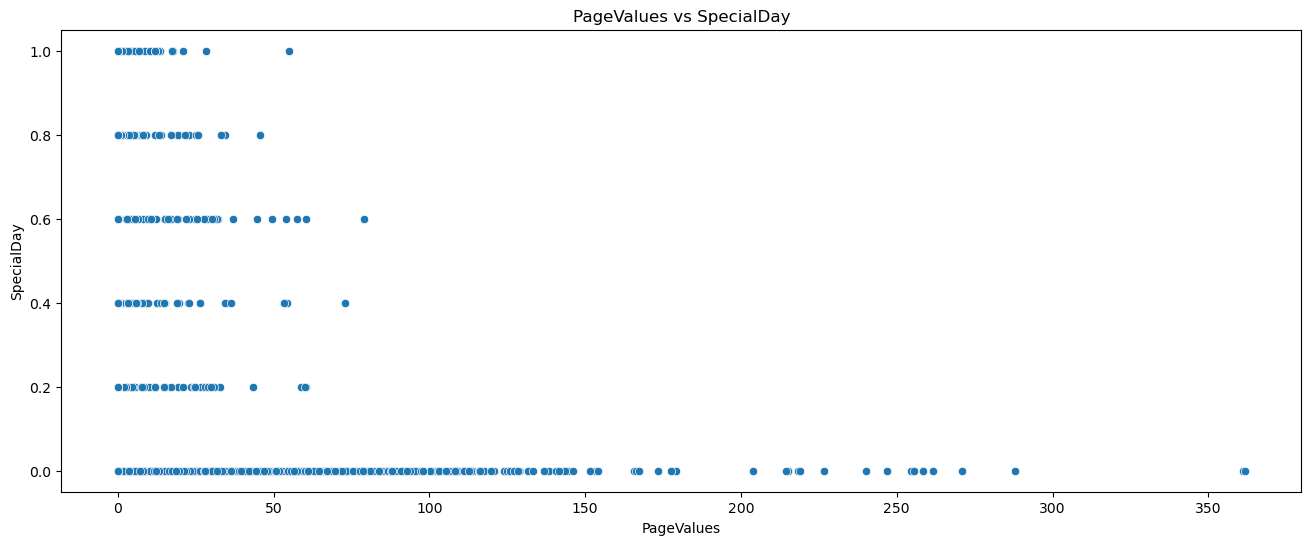

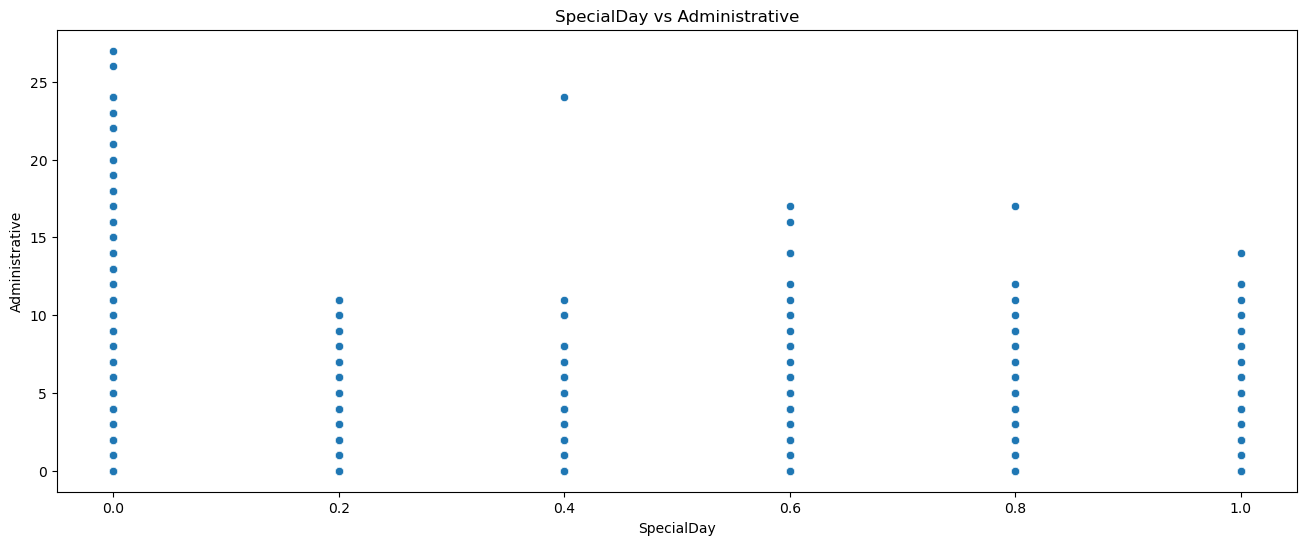

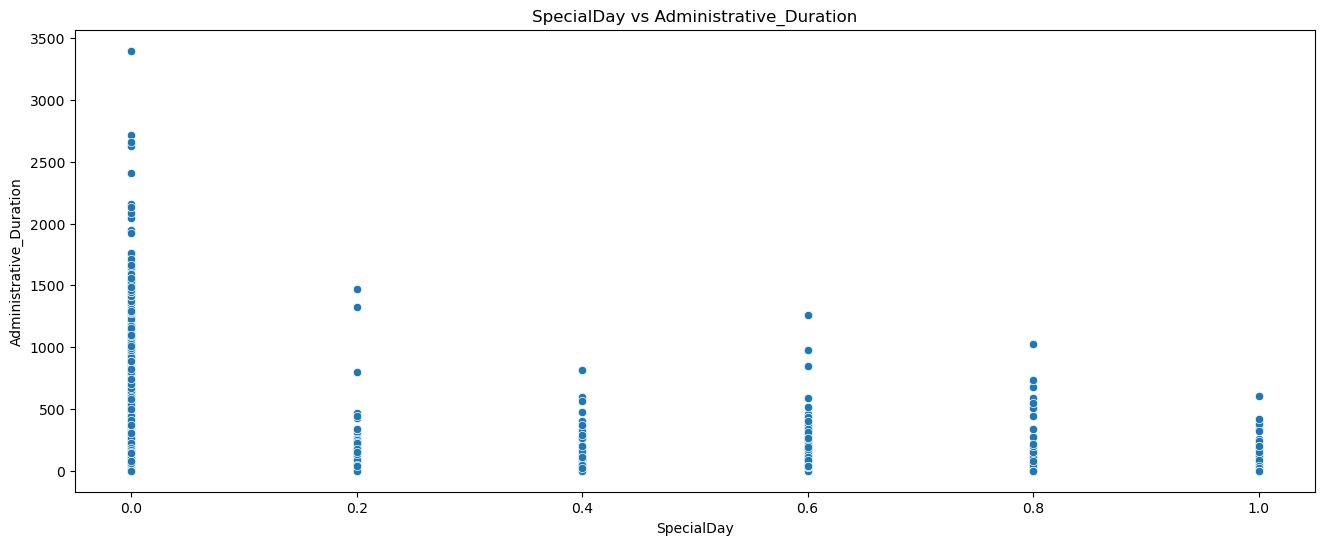

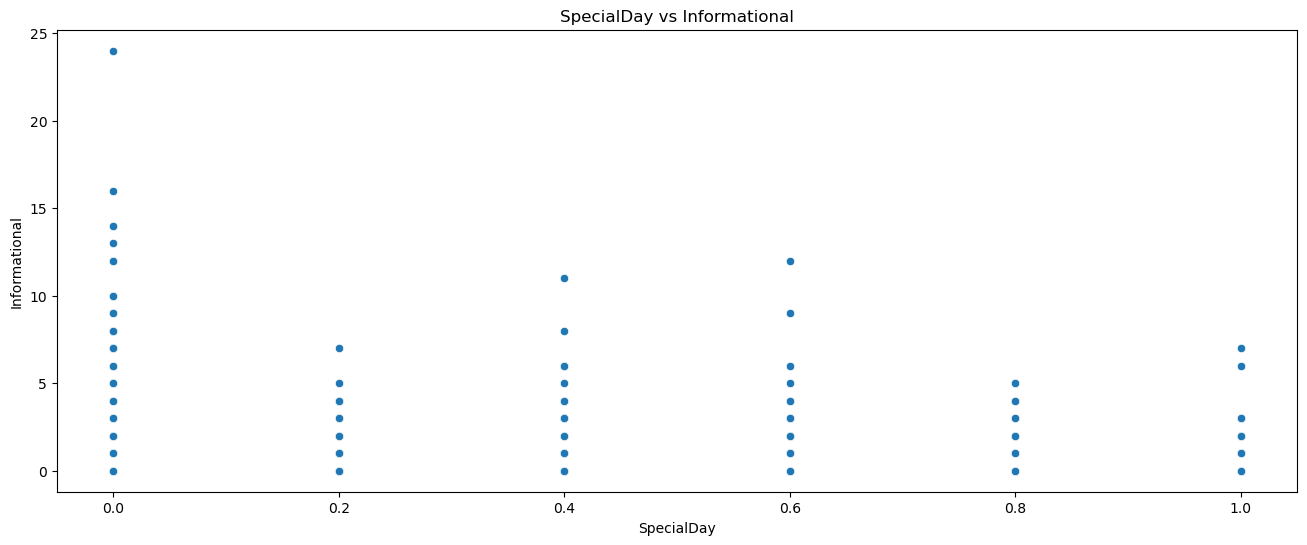

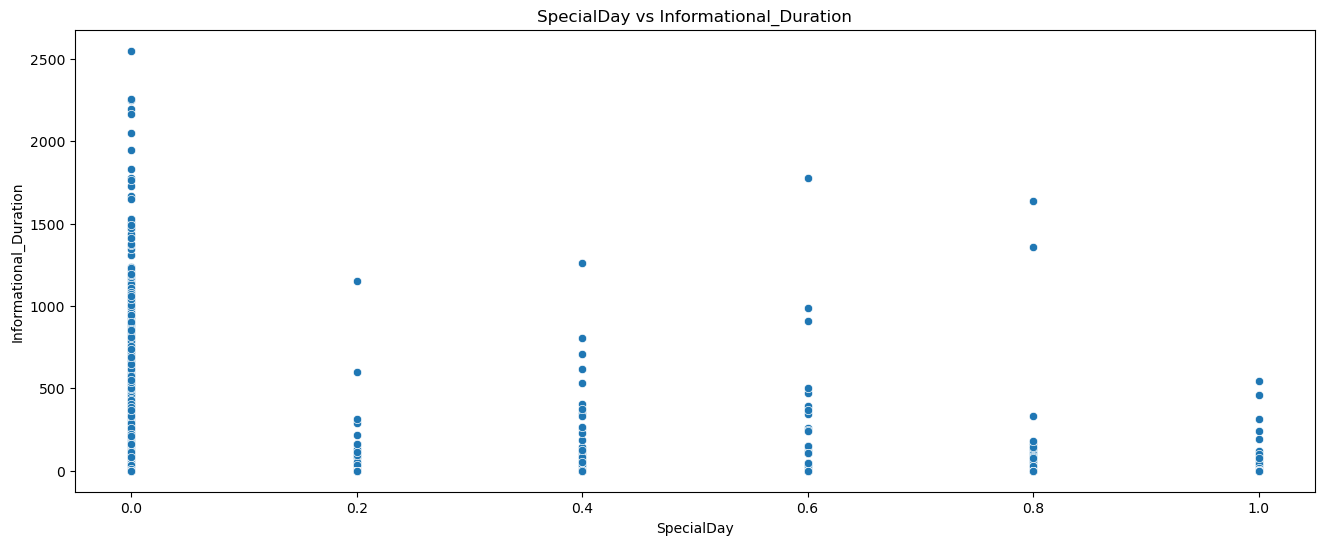

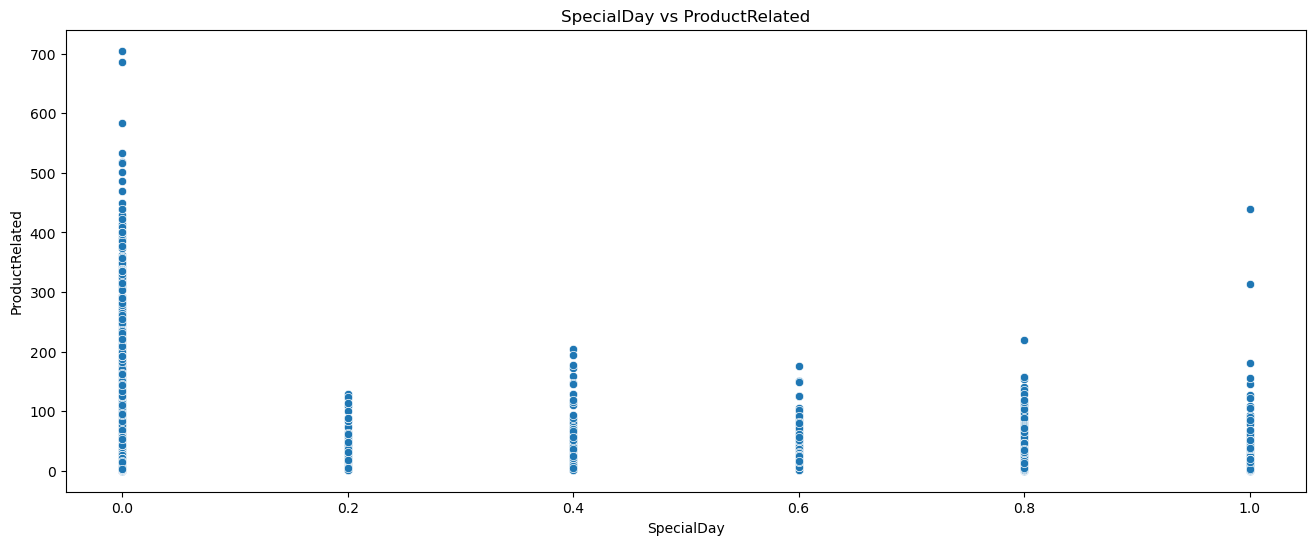

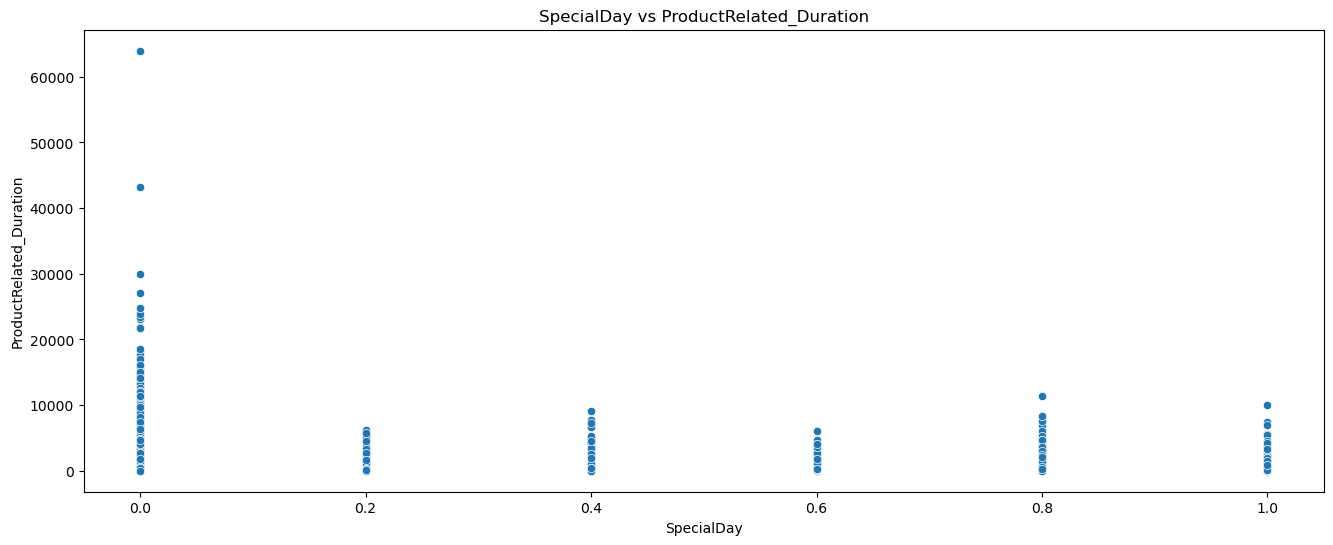

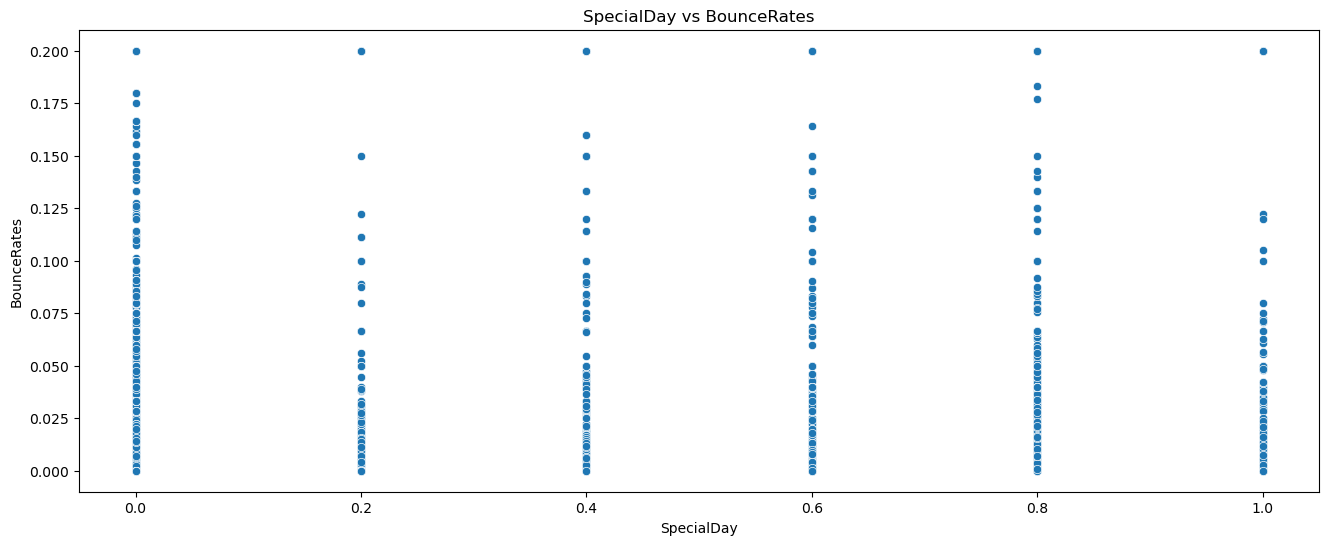

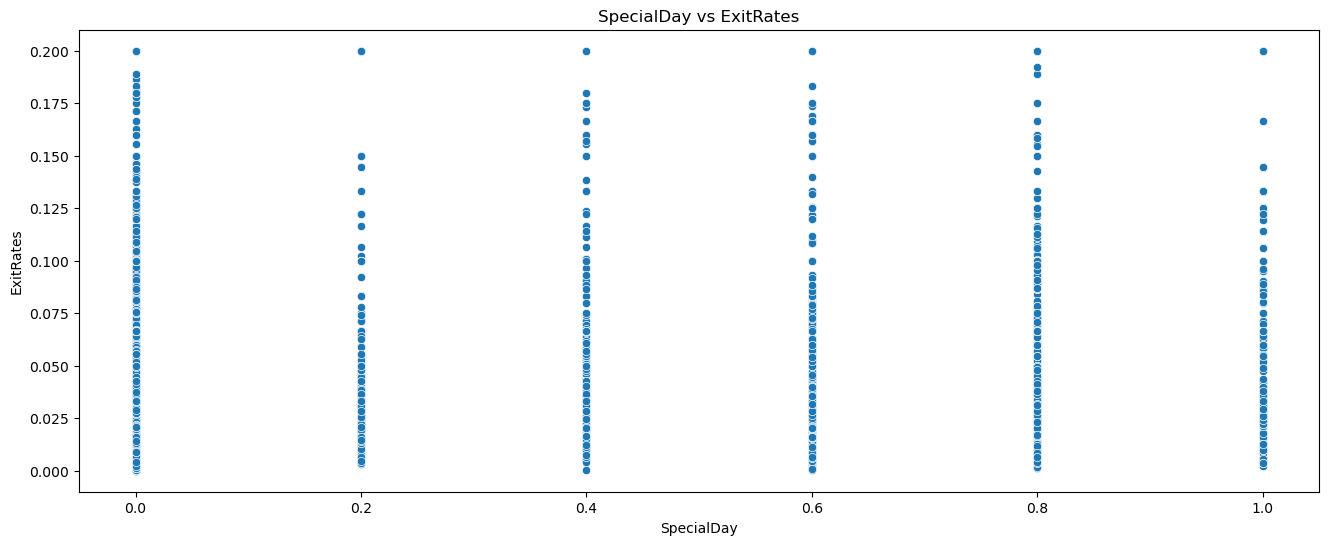

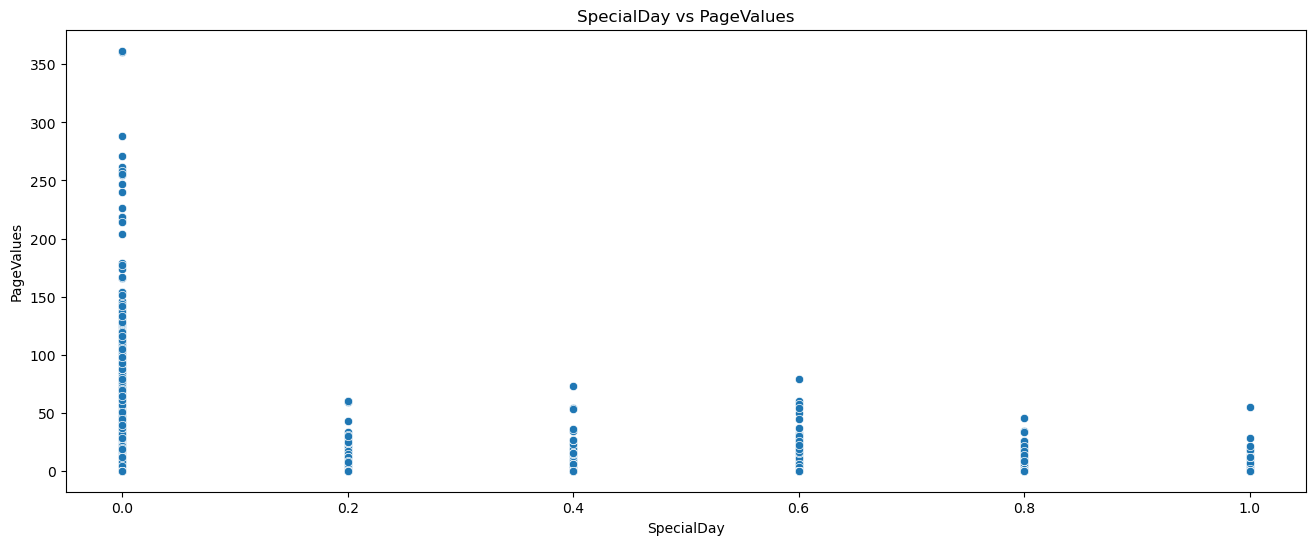

In [45]:
# Scatterplot (Numerical-Numerical)
for col1 in numerical_features:
    for col2 in numerical_features:
        if col1 != col2:
            plt.figure(figsize=(16,6))
            sns.scatterplot(x=df[col1], y=df[col2])
            plt.title(f'{col1} vs {col2}')
            plt.show()

e:\Anaconda\envs\Danger02-ML\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
e:\Anaconda\envs\Danger02-ML\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1600x600 with 0 Axes>

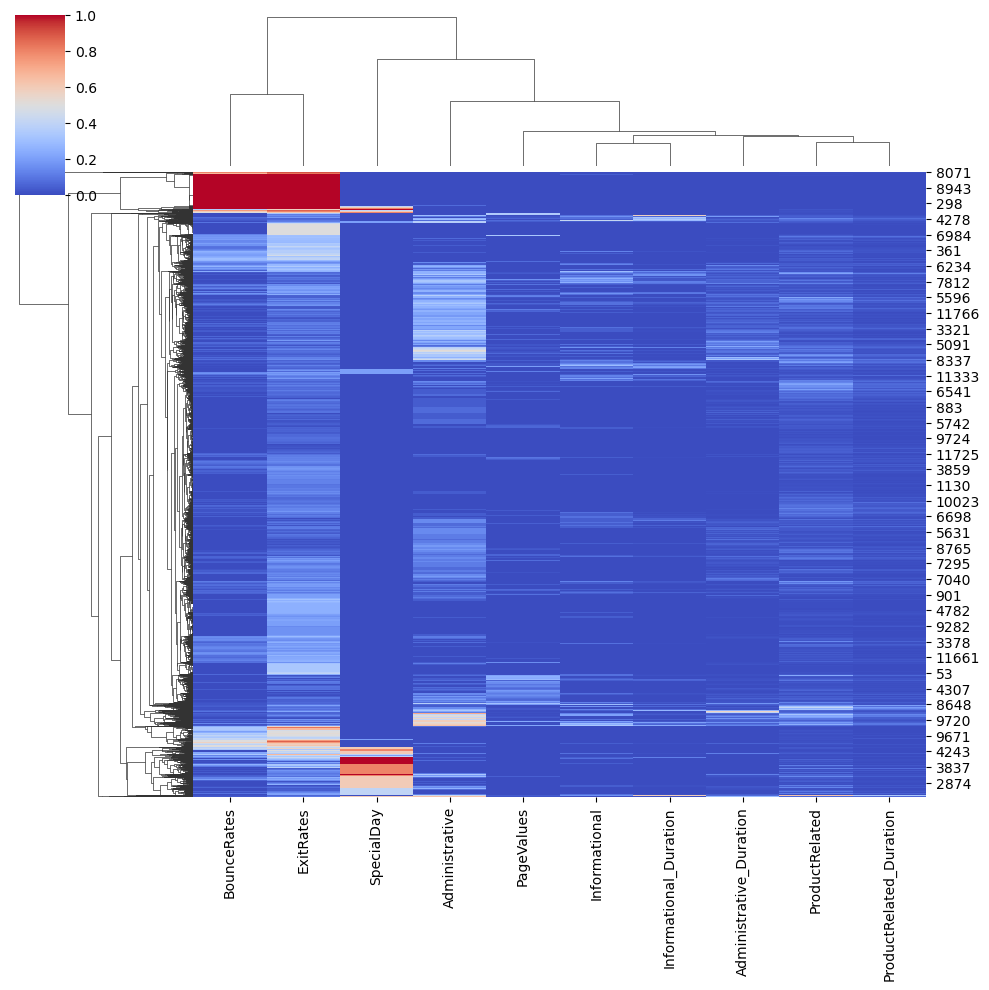

In [46]:
# Cluster Map :

plt.figure(figsize=(16,6))  
sns.clustermap(df[numerical_features], cmap='coolwarm', standard_scale=1)
plt.show()

### **ML MODEL DEPLOYMENT:**

In [51]:
# Convert all categorical based on heat map realtion into numerical  :
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

categorical_features = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Month']
for col in categorical_features:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

X = df.drop('Revenue', axis=1)
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8629359286293593


e:\Anaconda\envs\Danger02-ML\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Check our model on train and test data respectively :

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# This tells us that our model is performing well on both the train and test data.

Train Accuracy: 0.884022708840227
Test Accuracy: 0.8629359286293593


### **MODEL EVALUATION :**

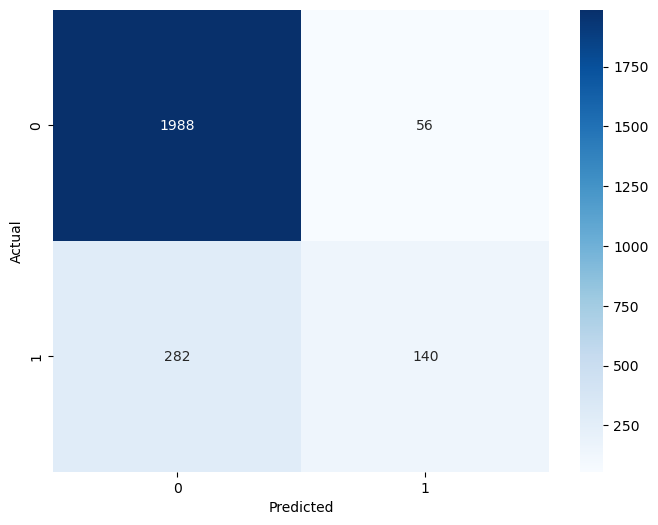

In [60]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()  





In [62]:
# Save Model and deploy on Streamlit :

import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)